In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
Exodo_1 = "Now these are the names of the children of Israel, which came into Egypt; every man and his household came with Jacob.Reuben, Simeon, Levi, and Judah,Issachar, Zebulun, and Benjamin,Dan, and Naphtali, Gad, and Asher.And all the souls that came out of the loins of Jacob were seventy souls: for Joseph was in Egypt already.And Joseph died, and all his brothers, and all that generation.And the children of Israel were fruitful, and increased abundantly, and multiplied, and waxed exceeding mighty; and the land was filled with them.Now there arose up a new king over Egypt, which knew not Joseph.And he said to his people, Behold, the people of the children of Israel are more and mightier than we:Come on, let us deal wisely with them; lest they multiply, and it come to pass, that, when there falls out any war, they join also to our enemies, and fight against us, and so get them up out of the land.Therefore they did set over them taskmasters to afflict them with their burdens. And they built for Pharaoh treasure cities, Pithom and Raamses.But the more they afflicted them, the more they multiplied and grew. And they were grieved because of the children of Israel.And the Egyptians made the children of Israel to serve with rigor:And they made their lives bitter with hard bondage, in mortar, and in brick, and in all manner of service in the field: all their service, wherein they made them serve, was with rigor.And the king of Egypt spoke to the Hebrew midwives, of which the name of the one was Shiphrah, and the name of the other Puah:And he said, When you do the office of a midwife to the Hebrew women, and see them on the stools; if it be a son, then you shall kill him: but if it be a daughter, then she shall live.But the midwives feared God, and did not as the king of Egypt commanded them, but saved the men children alive.And the king of Egypt called for the midwives, and said to them, Why have you done this thing, and have saved the men children alive?And the midwives said to Pharaoh, Because the Hebrew women are not as the Egyptian women; for they are lively, and are delivered ere the midwives come in to them.Therefore God dealt well with the midwives: and the people multiplied, and waxed very mighty.And it came to pass, because the midwives feared God, that he made them houses.And Pharaoh charged all his people, saying, Every son that is born you shall cast into the river, and every daughter you shall save alive.".lower()

In [6]:
Exodo_2 = "And there went a man of the house of Levi, and took to wife a daughter of Levi.And the woman conceived, and bore a son: and when she saw him that he was a goodly child, she hid him three months.And when she could not longer hide him, she took for him an ark of bulrushes, and daubed it with slime and with pitch, and put the child therein; and she laid it in the flags by the river' brink.And his sister stood afar off, to wit what would be done to him.And the daughter of Pharaoh came down to wash herself at the river; and her maidens walked along by the river' side; and when she saw the ark among the flags, she sent her maid to fetch it.And when she had opened it, she saw the child: and, behold, the babe wept. And she had compassion on him, and said, This is one of the Hebrews'children.Then said his sister to Pharaoh' daughter, Shall I go and call to you a nurse of the Hebrew women, that she may nurse the child for you?And Pharaoh' daughter said to her, Go. And the maid went and called the child' mother.And Pharaoh' daughter said to her, Take this child away, and nurse it for me, and I will give you your wages. And the women took the child, and nursed it.And the child grew, and she brought him to Pharaoh' daughter, and he became her son. And she called his name Moses: and she said, Because I drew him out of the water.And it came to pass in those days, when Moses was grown, that he went out to his brothers, and looked on their burdens: and he spied an Egyptian smiting an Hebrew, one of his brothers.And he looked this way and that way, and when he saw that there was no man, he slew the Egyptian, and hid him in the sand.And when he went out the second day, behold, two men of the Hebrews strove together: and he said to him that did the wrong, Why smite you your fellow?And he said, Who made you a prince and a judge over us? intend you to kill me, as you killed the Egyptian? And Moses feared, and said, Surely this thing is known.Now when Pharaoh heard this thing, he sought to slay Moses. But Moses fled from the face of Pharaoh, and dwelled in the land of Midian: and he sat down by a well.Now the priest of Midian had seven daughters: and they came and drew water, and filled the troughs to water their father' flock.And the shepherds came and drove them away: but Moses stood up and helped them, and watered their flock.And when they came to Reuel their father, he said, How is it that you are come so soon to day?And they said, An Egyptian delivered us out of the hand of the shepherds, and also drew water enough for us, and watered the flock.And he said to his daughters, And where is he? why is it that you have left the man? call him, that he may eat bread.And Moses was content to dwell with the man: and he gave Moses Zipporah his daughter.And she bore him a son, and he called his name Gershom: for he said, I have been a stranger in a strange land.And it came to pass in process of time, that the king of Egypt died: and the children of Israel sighed by reason of the bondage, and they cried, and their cry came up to God by reason of the bondage.And God heard their groaning, and God remembered his covenant with Abraham, with Isaac, and with Jacob.And God looked on the children of Israel, and God had respect to them.".lower()

In [7]:
Exodo_3 = "Now Moses kept the flock of Jethro his father in law, the priest of Midian: and he led the flock to the backside of the desert, and came to the mountain of God, even to Horeb.And the angel of the LORD appeared to him in a flame of fire out of the middle of a bush: and he looked, and, behold, the bush burned with fire, and the bush was not consumed.And Moses said, I will now turn aside, and see this great sight, why the bush is not burnt.And when the LORD saw that he turned aside to see, God called to him out of the middle of the bush, and said, Moses, Moses. And he said, Here am I.And he said, Draw not near here: put off your shoes from off your feet, for the place where on you stand is holy ground.Moreover he said, I am the God of your father, the God of Abraham, the God of Isaac, and the God of Jacob. And Moses hid his face; for he was afraid to look on God.And the LORD said, I have surely seen the affliction of my people which are in Egypt, and have heard their cry by reason of their taskmasters; for I know their sorrows;And I am come down to deliver them out of the hand of the Egyptians, and to bring them up out of that land to a good land and a large, to a land flowing with milk and honey; to the place of the Canaanites, and the Hittites, and the Amorites, and the Perizzites, and the Hivites, and the Jebusites.Now therefore, behold, the cry of the children of Israel is come to me: and I have also seen the oppression with which the Egyptians oppress them.Come now therefore, and I will send you to Pharaoh, that you may bring forth my people the children of Israel out of Egypt.And Moses said to God, Who am I, that I should go to Pharaoh, and that I should bring forth the children of Israel out of Egypt?And he said, Certainly I will be with you; and this shall be a token to you, that I have sent you: When you have brought forth the people out of Egypt, you shall serve God on this mountain.And Moses said to God, Behold, when I come to the children of Israel, and shall say to them, The God of your fathers has sent me to you; and they shall say to me, What is his name? what shall I say to them?And God said to Moses, I AM THAT I AM: and he said, Thus shall you say to the children of Israel, I AM has sent me to you.And God said moreover to Moses, Thus shall you say to the children of Israel, the LORD God of your fathers, the God of Abraham, the God of Isaac, and the God of Jacob, has sent me to you: this is my name for ever, and this is my memorial to all generations.Go, and gather the elders of Israel together, and say to them, The LORD God of your fathers, the God of Abraham, of Isaac, and of Jacob, appeared to me, saying, I have surely visited you, and seen that which is done to you in Egypt:And I have said, I will bring you up out of the affliction of Egypt to the land of the Canaanites, and the Hittites, and the Amorites, and the Perizzites, and the Hivites, and the Jebusites, to a land flowing with milk and honey.And they shall listen to your voice: and you shall come, you and the elders of Israel, to the king of Egypt, and you shall say to him, The LORD God of the Hebrews has met with us: and now let us go, we beseech you, three days'journey into the wilderness, that we may sacrifice to the LORD our God.And I am sure that the king of Egypt will not let you go, no, not by a mighty hand.And I will stretch out my hand, and smite Egypt with all my wonders which I will do in the middle thereof: and after that he will let you go.And I will give this people favor in the sight of the Egyptians: and it shall come to pass, that, when you go, you shall not go empty.But every woman shall borrow of her neighbor, and of her that sojournes in her house, jewels of silver, and jewels of gold, and raiment: and you shall put them on your sons, and on your daughters; and you shall spoil the Egyptians.".lower()

In [8]:
Exodo_4 = "And Moses answered and said, But, behold, they will not believe me, nor listen to my voice: for they will say, The LORD has not appeared to you.And the LORD said to him, What is that in your hand? And he said, A rod.And he said, Cast it on the ground. And he cast it on the ground, and it became a serpent; and Moses fled from before it.And the LORD said to Moses, Put forth your hand, and take it by the tail. And he put forth his hand, and caught it, and it became a rod in his hand:That they may believe that the LORD God of their fathers, the God of Abraham, the God of Isaac, and the God of Jacob, has appeared to you.And the LORD said furthermore to him, Put now your hand into your bosom. And he put his hand into his bosom: and when he took it out, behold, his hand was leprous as snow.And he said, Put your hand into your bosom again. And he put his hand into his bosom again; and plucked it out of his bosom, and, behold, it was turned again as his other flesh.And it shall come to pass, if they will not believe you, neither listen to the voice of the first sign, that they will believe the voice of the latter sign.And it shall come to pass, if they will not believe also these two signs, neither listen to your voice, that you shall take of the water of the river, and pour it on the dry land: and the water which you take out of the river shall become blood on the dry land.And Moses said to the LORD, O my LORD, I am not eloquent, neither heretofore, nor since you have spoken to your servant: but I am slow of speech, and of a slow tongue.And the LORD said to him, Who has made man' mouth? or who makes the dumb, or deaf, or the seeing, or the blind? have not I the LORD?Now therefore go, and I will be with your mouth, and teach you what you shall say.And he said, O my LORD, send, I pray you, by the hand of him whom you will send.And the anger of the LORD was kindled against Moses, and he said, Is not Aaron the Levite your brother? I know that he can speak well. And also, behold, he comes forth to meet you: and when he sees you, he will be glad in his heart.And you shall speak to him, and put words in his mouth: and I will be with your mouth, and with his mouth, and will teach you what you shall do.And he shall be your spokesman to the people: and he shall be, even he shall be to you instead of a mouth, and you shall be to him instead of God.And you shall take this rod in your hand, with which you shall do signs.And Moses went and returned to Jethro his father in law, and said to him, Let me go, I pray you, and return to my brothers which are in Egypt, and see whether they be yet alive. And Jethro said to Moses, Go in peace.And the LORD said to Moses in Midian, Go, return into Egypt: for all the men are dead which sought your life.And Moses took his wife and his sons, and set them on an ass, and he returned to the land of Egypt: and Moses took the rod of God in his hand.And the LORD said to Moses, When you go to return into Egypt, see that you do all those wonders before Pharaoh, which I have put in your hand: but I will harden his heart, that he shall not let the people go.And you shall say to Pharaoh, Thus said the LORD, Israel is my son, even my firstborn:And I say to you, Let my son go, that he may serve me: and if you refuse to let him go, behold, I will slay your son, even your firstborn.And it came to pass by the way in the inn, that the LORD met him, and sought to kill him.Then Zipporah took a sharp stone, and cut off the foreskin of her son, and cast it at his feet, and said, Surely a bloody husband are you to me.So he let him go: then she said, A bloody husband you are, because of the circumcision.And the LORD said to Aaron, Go into the wilderness to meet Moses. And he went, and met him in the mount of God, and kissed him.And Moses told Aaron all the words of the LORD who had sent him, and all the signs which he had commanded him.And Moses and Aaron went and gathered together all the elders of the children of Israel:And Aaron spoke all the words which the LORD had spoken to Moses, and did the signs in the sight of the people.And the people believed: and when they heard that the LORD had visited the children of Israel, and that he had looked on their affliction, then they bowed their heads and worshipped.".lower()

In [9]:
Exodo_5 = "And afterward Moses and Aaron went in, and told Pharaoh, Thus said the LORD God of Israel, Let my people go, that they may hold a feast to me in the wilderness.And Pharaoh said, Who is the LORD, that I should obey his voice to let Israel go? I know not the LORD, neither will I let Israel go.And they said, The God of the Hebrews has met with us: let us go, we pray you, three days'journey into the desert, and sacrifice to the LORD our God; lest he fall on us with pestilence, or with the sword.And the king of Egypt said to them, Why do you, Moses and Aaron, let the people from their works? get you to your burdens.And Pharaoh said, Behold, the people of the land now are many, and you make them rest from their burdens.And Pharaoh commanded the same day the taskmasters of the people, and their officers, saying,You shall no more give the people straw to make brick, as heretofore: let them go and gather straw for themselves.And the tale of the bricks, which they did make heretofore, you shall lay on them; you shall not diminish ought thereof: for they be idle; therefore they cry, saying, Let us go and sacrifice to our God.Let there more work be laid on the men, that they may labor therein; and let them not regard vain words.And the taskmasters of the people went out, and their officers, and they spoke to the people, saying, Thus said Pharaoh, I will not give you straw.Go you, get you straw where you can find it: yet not ought of your work shall be diminished.So the people were scattered abroad throughout all the land of Egypt to gather stubble instead of straw.And the taskmasters hurried them, saying, Fulfill your works, your daily tasks, as when there was straw.And the officers of the children of Israel, which Pharaoh' taskmasters had set over them, were beaten, and demanded, Why have you not fulfilled your task in making brick both yesterday and to day, as heretofore?Then the officers of the children of Israel came and cried to Pharaoh, saying, Why deal you thus with your servants?There is no straw given to your servants, and they say to us, Make brick: and, behold, your servants are beaten; but the fault is in your own people.But he said, You are idle, you are idle: therefore you say, Let us go and do sacrifice to the LORD.Go therefore now, and work; for there shall no straw be given you, yet shall you deliver the tale of bricks.And the officers of the children of Israel did see that they were in evil case, after it was said, You shall not minish ought from your bricks of your daily task.And they met Moses and Aaron, who stood in the way, as they came forth from Pharaoh:And they said to them, The LORD look on you, and judge; because you have made our smell to be abhorred in the eyes of Pharaoh, and in the eyes of his servants, to put a sword in their hand to slay us.And Moses returned to the LORD, and said, LORD, why have you so evil entreated this people? why is it that you have sent me?For since I came to Pharaoh to speak in your name, he has done evil to this people; neither have you delivered your people at all.".lower()

In [10]:
Exodo_6 = "Then the LORD said to Moses, Now shall you see what I will do to Pharaoh: for with a strong hand shall he let them go, and with a strong hand shall he drive them out of his land.And God spoke to Moses, and said to him, I am the LORD:And I appeared to Abraham, to Isaac, and to Jacob, by the name of God Almighty, but by my name JEHOVAH was I not known to them.And I have also established my covenant with them, to give them the land of Canaan, the land of their pilgrimage, wherein they were strangers.And I have also heard the groaning of the children of Israel, whom the Egyptians keep in bondage; and I have remembered my covenant.Why say to the children of Israel, I am the LORD, and I will bring you out from under the burdens of the Egyptians, and I will rid you out of their bondage, and I will redeem you with a stretched out arm, and with great judgments:And I will take you to me for a people, and I will be to you a God: and you shall know that I am the LORD your God, which brings you out from under the burdens of the Egyptians.And I will bring you in to the land, concerning the which I did swear to give it to Abraham, to Isaac, and to Jacob; and I will give it you for an heritage: I am the LORD.And Moses spoke so to the children of Israel: but they listened not to Moses for anguish of spirit, and for cruel bondage.And the LORD spoke to Moses, saying,Go in, speak to Pharaoh king of Egypt, that he let the children of Israel go out of his land.And Moses spoke before the LORD, saying, Behold, the children of Israel have not listened to me; how then shall Pharaoh hear me, who am of uncircumcised lips?And the LORD spoke to Moses and to Aaron, and gave them a charge to the children of Israel, and to Pharaoh king of Egypt, to bring the children of Israel out of the land of Egypt.These be the heads of their fathers'houses: The sons of Reuben the firstborn of Israel; Hanoch, and Pallu, Hezron, and Carmi: these be the families of Reuben.And the sons of Simeon; Jemuel, and Jamin, and Ohad, and Jachin, and Zohar, and Shaul the son of a Canaanitish woman: these are the families of Simeon.And these are the names of the sons of Levi according to their generations; Gershon, and Kohath, and Merari: and the years of the life of Levi were an hundred thirty and seven years.The sons of Gershon; Libni, and Shimi, according to their families.And the sons of Kohath; Amram, and Izhar, and Hebron, and Uzziel: and the years of the life of Kohath were an hundred thirty and three years.And the sons of Merari; Mahali and Mushi: these are the families of Levi according to their generations.And Amram took him Jochebed his father' sister to wife; and she bore him Aaron and Moses: and the years of the life of Amram were an hundred and thirty and seven years.And the sons of Izhar; Korah, and Nepheg, and Zichri.And the sons of Uzziel; Mishael, and Elzaphan, and Zithri.And Aaron took him Elisheba, daughter of Amminadab, sister of Naashon, to wife; and she bore him Nadab, and Abihu, Eleazar, and Ithamar.And the sons of Korah; Assir, and Elkanah, and Abiasaph: these are the families of the Korhites.And Eleazar Aaron' son took him one of the daughters of Putiel to wife; and she bore him Phinehas: these are the heads of the fathers of the Levites according to their families.These are that Aaron and Moses, to whom the LORD said, Bring out the children of Israel from the land of Egypt according to their armies.These are they which spoke to Pharaoh king of Egypt, to bring out the children of Israel from Egypt: these are that Moses and Aaron.And it came to pass on the day when the LORD spoke to Moses in the land of Egypt,That the LORD spoke to Moses, saying, I am the LORD: speak you to Pharaoh king of Egypt all that I say to you.And Moses said before the LORD, Behold, I am of uncircumcised lips, and how shall Pharaoh listen to me?".lower()

In [11]:
Exodo_7 = "And the LORD said to Moses, See, I have made you a god to Pharaoh: and Aaron your brother shall be your prophet.You shall speak all that I command you: and Aaron your brother shall speak to Pharaoh, that he send the children of Israel out of his land.And I will harden Pharaoh' heart, and multiply my signs and my wonders in the land of Egypt.But Pharaoh shall not listen to you, that I may lay my hand on Egypt, and bring forth my armies, and my people the children of Israel, out of the land of Egypt by great judgments.And the Egyptians shall know that I am the LORD, when I stretch forth my hand on Egypt, and bring out the children of Israel from among them.And Moses and Aaron did as the LORD commanded them, so did they.And Moses was fourscore years old, and Aaron fourscore and three years old, when they spoke to Pharaoh.And the LORD spoke to Moses and to Aaron, saying,When Pharaoh shall speak to you, saying, Show a miracle for you: then you shall say to Aaron, Take your rod, and cast it before Pharaoh, and it shall become a serpent.And Moses and Aaron went in to Pharaoh, and they did so as the LORD had commanded: and Aaron cast down his rod before Pharaoh, and before his servants, and it became a serpent.Then Pharaoh also called the wise men and the sorcerers: now the magicians of Egypt, they also did in like manner with their enchantments.For they cast down every man his rod, and they became serpents: but Aaron' rod swallowed up their rods.And he hardened Pharaoh' heart, that he listened not to them; as the LORD had said.And the LORD said to Moses, Pharaoh' heart is hardened, he refuses to let the people go.Get you to Pharaoh in the morning; see, he goes out to the water; and you shall stand by the river' brink against he come; and the rod which was turned to a serpent shall you take in your hand.And you shall say to him, The LORD God of the Hebrews has sent me to you, saying, Let my people go, that they may serve me in the wilderness: and, behold, till now you would not hear.Thus said the LORD, In this you shall know that I am the LORD: behold, I will smite with the rod that is in my hand on the waters which are in the river, and they shall be turned to blood.And the fish that is in the river shall die, and the river shall stink; and the Egyptians shall loathe to drink of the water of the river.And the LORD spoke to Moses, Say to Aaron, Take your rod, and stretch out your hand on the waters of Egypt, on their streams, on their rivers, and on their ponds, and on all their pools of water, that they may become blood; and that there may be blood throughout all the land of Egypt, both in vessels of wood, and in vessels of stone.And Moses and Aaron did so, as the LORD commanded; and he lifted up the rod, and smote the waters that were in the river, in the sight of Pharaoh, and in the sight of his servants; and all the waters that were in the river were turned to blood.And the fish that was in the river died; and the river stank, and the Egyptians could not drink of the water of the river; and there was blood throughout all the land of Egypt.And the magicians of Egypt did so with their enchantments: and Pharaoh' heart was hardened, neither did he listen to them; as the LORD had said.And Pharaoh turned and went into his house, neither did he set his heart to this also.And all the Egyptians dig round about the river for water to drink; for they could not drink of the water of the river.And seven days were fulfilled, after that the LORD had smitten the river.".lower()

In [12]:
Exodo_8 = "And the LORD spoke to Moses, Go to Pharaoh, and say to him, Thus said the LORD, Let my people go, that they may serve me.And if you refuse to let them go, behold, I will smite all your borders with frogs:And the river shall bring forth frogs abundantly, which shall go up and come into your house, and into your bedchamber, and on your bed, and into the house of your servants, and on your people, and into your ovens, and into your kneading troughs:And the frogs shall come up both on you, and on your people, and on all your servants.And the LORD spoke to Moses, Say to Aaron, Stretch forth your hand with your rod over the streams, over the rivers, and over the ponds, and cause frogs to come up on the land of Egypt.And Aaron stretched out his hand over the waters of Egypt; and the frogs came up, and covered the land of Egypt.And the magicians did so with their enchantments, and brought up frogs on the land of Egypt.Then Pharaoh called for Moses and Aaron, and said, Entreat the LORD, that he may take away the frogs from me, and from my people; and I will let the people go, that they may do sacrifice to the LORD.And Moses said to Pharaoh, Glory over me: when shall I entreat for you, and for your servants, and for your people, to destroy the frogs from you and your houses, that they may remain in the river only?And he said, To morrow. And he said, Be it according to your word: that you may know that there is none like to the LORD our God.And the frogs shall depart from you, and from your houses, and from your servants, and from your people; they shall remain in the river only.And Moses and Aaron went out from Pharaoh: and Moses cried to the LORD because of the frogs which he had brought against Pharaoh.And the LORD did according to the word of Moses; and the frogs died out of the houses, out of the villages, and out of the fields.And they gathered them together on heaps: and the land stank.But when Pharaoh saw that there was respite, he hardened his heart, and listened not to them; as the LORD had said.And the LORD said to Moses, Say to Aaron, Stretch out your rod, and smite the dust of the land, that it may become lice throughout all the land of Egypt.And they did so; for Aaron stretched out his hand with his rod, and smote the dust of the earth, and it became lice in man, and in beast; all the dust of the land became lice throughout all the land of Egypt.And the magicians did so with their enchantments to bring forth lice, but they could not: so there were lice on man, and on beast.Then the magicians said to Pharaoh, This is the finger of God: and Pharaoh' heart was hardened, and he listened not to them; as the LORD had said.And the LORD said to Moses, Rise up early in the morning, and stand before Pharaoh; see, he comes forth to the water; and say to him, Thus said the LORD, Let my people go, that they may serve me.Else, if you will not let my people go, behold, I will send swarms of flies on you, and on your servants, and on your people, and into your houses: and the houses of the Egyptians shall be full of swarms of flies, and also the ground where on they are.And I will sever in that day the land of Goshen, in which my people dwell, that no swarms of flies shall be there; to the end you may know that I am the LORD in the middle of the earth.And I will put a division between my people and your people: to morrow shall this sign be.And the LORD did so; and there came a grievous swarm of flies into the house of Pharaoh, and into his servants'houses, and into all the land of Egypt: the land was corrupted by reason of the swarm of flies.And Pharaoh called for Moses and for Aaron, and said, Go you, sacrifice to your God in the land.And Moses said, It is not meet so to do; for we shall sacrifice the abomination of the Egyptians to the LORD our God: see, shall we sacrifice the abomination of the Egyptians before their eyes, and will they not stone us?We will go three days'journey into the wilderness, and sacrifice to the LORD our God, as he shall command us.And Pharaoh said, I will let you go, that you may sacrifice to the LORD your God in the wilderness; only you shall not go very far away: entreat for me.And Moses said, Behold, I go out from you, and I will entreat the LORD that the swarms of flies may depart from Pharaoh, from his servants, and from his people, to morrow: but let not Pharaoh deal deceitfully any more in not letting the people go to sacrifice to the LORD.And Moses went out from Pharaoh, and entreated the LORD.And the LORD did according to the word of Moses; and he removed the swarms of flies from Pharaoh, from his servants, and from his people; there remained not one.And Pharaoh hardened his heart at this time also, neither would he let the people go.".lower()

In [13]:
Exodo_9 = "Then the LORD said to Moses, Go in to Pharaoh, and tell him, Thus said the LORD God of the Hebrews, Let my people go, that they may serve me.For if you refuse to let them go, and will hold them still,Behold, the hand of the LORD is on your cattle which is in the field, on the horses, on the asses, on the camels, on the oxen, and on the sheep: there shall be a very grievous murrain.And the LORD shall sever between the cattle of Israel and the cattle of Egypt: and there shall nothing die of all that is the children' of Israel.And the LORD appointed a set time, saying, To morrow the LORD shall do this thing in the land.And the LORD did that thing on the morrow, and all the cattle of Egypt died: but of the cattle of the children of Israel died not one.And Pharaoh sent, and, behold, there was not one of the cattle of the Israelites dead. And the heart of Pharaoh was hardened, and he did not let the people go.And the LORD said to Moses and to Aaron, Take to you handfuls of ashes of the furnace, and let Moses sprinkle it toward the heaven in the sight of Pharaoh.And it shall become small dust in all the land of Egypt, and shall be a boil breaking forth with blains on man, and on beast, throughout all the land of Egypt.And they took ashes of the furnace, and stood before Pharaoh; and Moses sprinkled it up toward heaven; and it became a boil breaking forth with blains on man, and on beast.And the magicians could not stand before Moses because of the boils; for the boil was on the magicians, and on all the Egyptians.And the LORD hardened the heart of Pharaoh, and he listened not to them; as the LORD had spoken to Moses.And the LORD said to Moses, Rise up early in the morning, and stand before Pharaoh, and say to him, Thus said the LORD God of the Hebrews, Let my people go, that they may serve me.For I will at this time send all my plagues on your heart, and on your servants, and on your people; that you may know that there is none like me in all the earth.For now I will stretch out my hand, that I may smite you and your people with pestilence; and you shall be cut off from the earth.And in very deed for this cause have I raised you up, for to show in you my power; and that my name may be declared throughout all the earth.As yet exalt you yourself against my people, that you will not let them go?Behold, to morrow about this time I will cause it to rain a very grievous hail, such as has not been in Egypt since the foundation thereof even until now.Send therefore now, and gather your cattle, and all that you have in the field; for on every man and beast which shall be found in the field, and shall not be brought home, the hail shall come down on them, and they shall die.He that feared the word of the LORD among the servants of Pharaoh made his servants and his cattle flee into the houses:And he that regarded not the word of the LORD left his servants and his cattle in the field.And the LORD said to Moses, Stretch forth your hand toward heaven, that there may be hail in all the land of Egypt, on man, and on beast, and on every herb of the field, throughout the land of Egypt.And Moses stretched forth his rod toward heaven: and the LORD sent thunder and hail, and the fire ran along on the ground; and the LORD rained hail on the land of Egypt.So there was hail, and fire mingled with the hail, very grievous, such as there was none like it in all the land of Egypt since it became a nation.And the hail smote throughout all the land of Egypt all that was in the field, both man and beast; and the hail smote every herb of the field, and broke every tree of the field.Only in the land of Goshen, where the children of Israel were, was there no hail.And Pharaoh sent, and called for Moses and Aaron, and said to them, I have sinned this time: the LORD is righteous, and I and my people are wicked.Entreat the LORD (for it is enough) that there be no more mighty thunder and hail; and I will let you go, and you shall stay no longer.And Moses said to him, As soon as I am gone out of the city, I will spread abroad my hands to the LORD; and the thunder shall cease, neither shall there be any more hail; that you may know how that the earth is the LORD'.But as for you and your servants, I know that you will not yet fear the LORD God.And the flax and the barley was smitten: for the barley was in the ear, and the flax was in bloom.But the wheat and the rye were not smitten: for they were not grown up.And Moses went out of the city from Pharaoh, and spread abroad his hands to the LORD: and the thunders and hail ceased, and the rain was not poured on the earth.And when Pharaoh saw that the rain and the hail and the thunders were ceased, he sinned yet more, and hardened his heart, he and his servants.And the heart of Pharaoh was hardened, neither would he let the children of Israel go; as the LORD had spoken by Moses.".lower()

In [14]:
Exodo_10 = "And the LORD said to Moses, Go in to Pharaoh: for I have hardened his heart, and the heart of his servants, that I might show these my signs before him:And that you may tell in the ears of your son, and of your son' son, what things I have worked in Egypt, and my signs which I have done among them; that you may know how that I am the LORD.And Moses and Aaron came in to Pharaoh, and said to him, Thus said the LORD God of the Hebrews, How long will you refuse to humble yourself before me? let my people go, that they may serve me.Else, if you refuse to let my people go, behold, to morrow will I bring the locusts into your coast:And they shall cover the face of the earth, that one cannot be able to see the earth: and they shall eat the residue of that which is escaped, which remains to you from the hail, and shall eat every tree which grows for you out of the field:And they shall fill your houses, and the houses of all your servants, and the houses of all the Egyptians; which neither your fathers, nor your fathers'fathers have seen, since the day that they were on the earth to this day. And he turned himself, and went out from Pharaoh.And Pharaoh' servants said to him, How long shall this man be a snare to us? let the men go, that they may serve the LORD their God: know you not yet that Egypt is destroyed?And Moses and Aaron were brought again to Pharaoh: and he said to them, Go, serve the LORD your God: but who are they that shall go?And Moses said, We will go with our young and with our old, with our sons and with our daughters, with our flocks and with our herds will we go; for we must hold a feast to the LORD.And he said to them, Let the LORD be so with you, as I will let you go, and your little ones: look to it; for evil is before you.Not so: go now you that are men, and serve the LORD; for that you did desire. And they were driven out from Pharaoh' presence.And the LORD said to Moses, Stretch out your hand over the land of Egypt for the locusts, that they may come up on the land of Egypt, and eat every herb of the land, even all that the hail has left.And Moses stretched forth his rod over the land of Egypt, and the LORD brought an east wind on the land all that day, and all that night; and when it was morning, the east wind brought the locusts.And the locust went up over all the land of Egypt, and rested in all the coasts of Egypt: very grievous were they; before them there were no such locusts as they, neither after them shall be such.For they covered the face of the whole earth, so that the land was darkened; and they did eat every herb of the land, and all the fruit of the trees which the hail had left: and there remained not any green thing in the trees, or in the herbs of the field, through all the land of Egypt.Then Pharaoh called for Moses and Aaron in haste; and he said, I have sinned against the LORD your God, and against you.Now therefore forgive, I pray you, my sin only this once, and entreat the LORD your God, that he may take away from me this death only.And he went out from Pharaoh, and entreated the LORD.And the LORD turned a mighty strong west wind, which took away the locusts, and cast them into the Red sea; there remained not one locust in all the coasts of Egypt.But the LORD hardened Pharaoh' heart, so that he would not let the children of Israel go.And the LORD said to Moses, Stretch out your hand toward heaven, that there may be darkness over the land of Egypt, even darkness which may be felt.And Moses stretched forth his hand toward heaven; and there was a thick darkness in all the land of Egypt three days:They saw not one another, neither rose any from his place for three days: but all the children of Israel had light in their dwellings.And Pharaoh called to Moses, and said, Go you, serve the LORD; only let your flocks and your herds be stayed: let your little ones also go with you.And Moses said, You must give us also sacrifices and burnt offerings, that we may sacrifice to the LORD our God.Our cattle also shall go with us; there shall not an hoof be left behind; for thereof must we take to serve the LORD our God; and we know not with what we must serve the LORD, until we come thither.But the LORD hardened Pharaoh' heart, and he would not let them go.And Pharaoh said to him, Get you from me, take heed to yourself, see my face no more; for in that day you see my face you shall die.And Moses said, You have spoken well, I will see your face again no more.".lower()

In [15]:
Exodo_11 = "And the LORD said to Moses, Yet will I bring one plague more on Pharaoh, and on Egypt; afterwards he will let you go hence: when he shall let you go, he shall surely thrust you out hence altogether.Speak now in the ears of the people, and let every man borrow of his neighbor, and every woman of her neighbor, jewels of silver and jewels of gold.And the LORD gave the people favor in the sight of the Egyptians. Moreover the man Moses was very great in the land of Egypt, in the sight of Pharaoh' servants, and in the sight of the people.And Moses said, Thus said the LORD, About midnight will I go out into the middle of Egypt:And all the firstborn in the land of Egypt shall die, from the first born of Pharaoh that sits on his throne, even to the firstborn of the maidservant that is behind the mill; and all the firstborn of beasts.And there shall be a great cry throughout all the land of Egypt, such as there was none like it, nor shall be like it any more.But against any of the children of Israel shall not a dog move his tongue, against man or beast: that you may know how that the LORD does put a difference between the Egyptians and Israel.And all these your servants shall come down to me, and bow down themselves to me, saying, Get you out, and all the people that follow you: and after that I will go out. And he went out from Pharaoh in a great anger.And the LORD said to Moses, Pharaoh shall not listen to you; that my wonders may be multiplied in the land of Egypt.And Moses and Aaron did all these wonders before Pharaoh: and the LORD hardened Pharaoh' heart, so that he would not let the children of Israel go out of his land.".lower()

In [16]:
Exodo_12 = "And the LORD spoke to Moses and Aaron in the land of Egypt saying,This month shall be to you the beginning of months: it shall be the first month of the year to you.Speak you to all the congregation of Israel, saying, In the tenth day of this month they shall take to them every man a lamb, according to the house of their fathers, a lamb for an house:And if the household be too little for the lamb, let him and his neighbor next to his house take it according to the number of the souls; every man according to his eating shall make your count for the lamb.Your lamb shall be without blemish, a male of the first year: you shall take it out from the sheep, or from the goats:And you shall keep it up until the fourteenth day of the same month: and the whole assembly of the congregation of Israel shall kill it in the evening.And they shall take of the blood, and strike it on the two side posts and on the upper door post of the houses, wherein they shall eat it.And they shall eat the flesh in that night, roast with fire, and unleavened bread; and with bitter herbs they shall eat it.Eat not of it raw, nor sodden at all with water, but roast with fire; his head with his legs, and with the entrails thereof.And you shall let nothing of it remain until the morning; and that which remains of it until the morning you shall burn with fire.And thus shall you eat it; with your loins girded, your shoes on your feet, and your staff in your hand; and you shall eat it in haste: it is the LORD' passover.For I will pass through the land of Egypt this night, and will smite all the firstborn in the land of Egypt, both man and beast; and against all the gods of Egypt I will execute judgment: I am the LORD.And the blood shall be to you for a token on the houses where you are: and when I see the blood, I will pass over you, and the plague shall not be on you to destroy you, when I smite the land of Egypt.And this day shall be to you for a memorial; and you shall keep it a feast to the LORD throughout your generations; you shall keep it a feast by an ordinance for ever.Seven days shall you eat unleavened bread; even the first day you shall put away leaven out of your houses: for whoever eats leavened bread from the first day until the seventh day, that soul shall be cut off from Israel.And in the first day there shall be an holy convocation, and in the seventh day there shall be an holy convocation to you; no manner of work shall be done in them, save that which every man must eat, that only may be done of you.And you shall observe the feast of unleavened bread; for in this selfsame day have I brought your armies out of the land of Egypt: therefore shall you observe this day in your generations by an ordinance for ever.In the first month, on the fourteenth day of the month at even, you shall eat unleavened bread, until the one and twentieth day of the month at even.Seven days shall there be no leaven found in your houses: for whoever eats that which is leavened, even that soul shall be cut off from the congregation of Israel, whether he be a stranger, or born in the land.You shall eat nothing leavened; in all your habitations shall you eat unleavened bread.Then Moses called for all the elders of Israel, and said to them, Draw out and take you a lamb according to your families, and kill the passover.And you shall take a bunch of hyssop, and dip it in the blood that is in the basin, and strike the lintel and the two side posts with the blood that is in the basin; and none of you shall go out at the door of his house until the morning.For the LORD will pass through to smite the Egyptians; and when he sees the blood on the lintel, and on the two side posts, the LORD will pass over the door, and will not suffer the destroyer to come in to your houses to smite you.And you shall observe this thing for an ordinance to you and to your sons for ever.And it shall come to pass, when you be come to the land which the LORD will give you, according as he has promised, that you shall keep this service.And it shall come to pass, when your children shall say to you, What mean you by this service?That you shall say, It is the sacrifice of the LORD' passover, who passed over the houses of the children of Israel in Egypt, when he smote the Egyptians, and delivered our houses. And the people bowed the head and worshipped.And the children of Israel went away, and did as the LORD had commanded Moses and Aaron, so did they.And it came to pass, that at midnight the LORD smote all the firstborn in the land of Egypt, from the firstborn of Pharaoh that sat on his throne to the firstborn of the captive that was in the dungeon; and all the firstborn of cattle.And Pharaoh rose up in the night, he, and all his servants, and all the Egyptians; and there was a great cry in Egypt; for there was not a house where there was not one dead.And he called for Moses and Aaron by night, and said, Rise up, and get you forth from among my people, both you and the children of Israel; and go, serve the LORD, as you have said.Also take your flocks and your herds, as you have said, and be gone; and bless me also.And the Egyptians were urgent on the people, that they might send them out of the land in haste; for they said, We be all dead men.And the people took their dough before it was leavened, their kneading troughs being bound up in their clothes on their shoulders.And the children of Israel did according to the word of Moses; and they borrowed of the Egyptians jewels of silver, and jewels of gold, and raiment:And the LORD gave the people favor in the sight of the Egyptians, so that they lent to them such things as they required. And they spoiled the Egyptians.And the children of Israel journeyed from Rameses to Succoth, about six hundred thousand on foot that were men, beside children.And a mixed multitude went up also with them; and flocks, and herds, even very much cattle.And they baked unleavened cakes of the dough which they brought forth out of Egypt, for it was not leavened; because they were thrust out of Egypt, and could not tarry, neither had they prepared for themselves any victual.Now the sojourning of the children of Israel, who dwelled in Egypt, was four hundred and thirty years.And it came to pass at the end of the four hundred and thirty years, even the selfsame day it came to pass, that all the hosts of the LORD went out from the land of Egypt.It is a night to be much observed to the LORD for bringing them out from the land of Egypt: this is that night of the LORD to be observed of all the children of Israel in their generations.And the LORD said to Moses and Aaron, This is the ordinance of the passover: There shall no stranger eat thereof:But every man' servant that is bought for money, when you have circumcised him, then shall he eat thereof.A foreigner and an hired servant shall not eat thereof.In one house shall it be eaten; you shall not carry forth ought of the flesh abroad out of the house; neither shall you break a bone thereof.All the congregation of Israel shall keep it.And when a stranger shall sojourn with you, and will keep the passover to the LORD, let all his males be circumcised, and then let him come near and keep it; and he shall be as one that is born in the land: for no uncircumcised person shall eat thereof.One law shall be to him that is home born, and to the stranger that sojournes among you.Thus did all the children of Israel; as the LORD commanded Moses and Aaron, so did they.And it came to pass the selfsame day, that the LORD did bring the children of Israel out of the land of Egypt by their armies.".lower()

In [17]:
Exodo_13 = "And the LORD spoke to Moses, saying,Sanctify to me all the firstborn, whatever opens the womb among the children of Israel, both of man and of beast: it is mine.And Moses said to the people, Remember this day, in which you came out from Egypt, out of the house of bondage; for by strength of hand the LORD brought you out from this place: there shall no leavened bread be eaten.This day came you out in the month Abib.And it shall be when the LORD shall bring you into the land of the Canaanites, and the Hittites, and the Amorites, and the Hivites, and the Jebusites, which he swore to your fathers to give you, a land flowing with milk and honey, that you shall keep this service in this month.Seven days you shall eat unleavened bread, and in the seventh day shall be a feast to the LORD.Unleavened bread shall be eaten seven days; and there shall no leavened bread be seen with you, neither shall there be leaven seen with you in all your quarters.And you shall show your son in that day, saying, This is done because of that which the LORD did to me when I came forth out of Egypt.And it shall be for a sign to you on your hand, and for a memorial between your eyes, that the LORD' law may be in your mouth: for with a strong hand has the LORD brought you out of Egypt.You shall therefore keep this ordinance in his season from year to year.And it shall be when the LORD shall bring you into the land of the Canaanites, as he swore to you and to your fathers, and shall give it you,That you shall set apart to the LORD all that opens the matrix, and every firstling that comes of a beast which you have; the males shall be the LORD'.And every firstling of an ass you shall redeem with a lamb; and if you will not redeem it, then you shall break his neck: and all the firstborn of man among your children shall you redeem.And it shall be when your son asks you in time to come, saying, What is this? that you shall say to him, By strength of hand the LORD brought us out from Egypt, from the house of bondage:And it came to pass, when Pharaoh would hardly let us go, that the LORD slew all the firstborn in the land of Egypt, both the firstborn of man, and the firstborn of beast: therefore I sacrifice to the LORD all that opens the matrix, being males; but all the firstborn of my children I redeem.And it shall be for a token on your hand, and for frontlets between your eyes: for by strength of hand the LORD brought us forth out of Egypt.And it came to pass, when Pharaoh had let the people go, that God led them not through the way of the land of the Philistines, although that was near; for God said, Lest peradventure the people repent when they see war, and they return to Egypt:But God led the people about, through the way of the wilderness of the Red sea: and the children of Israel went up harnessed out of the land of Egypt.And Moses took the bones of Joseph with him: for he had straightly sworn the children of Israel, saying, God will surely visit you; and you shall carry up my bones away hence with you.And they took their journey from Succoth, and encamped in Etham, in the edge of the wilderness.And the LORD went before them by day in a pillar of a cloud, to lead them the way; and by night in a pillar of fire, to give them light; to go by day and night:He took not away the pillar of the cloud by day, nor the pillar of fire by night, from before the people.".lower()

In [18]:
Exodo_14 = "And the LORD spoke to Moses, saying,Speak to the children of Israel, that they turn and encamp before Pihahiroth, between Migdol and the sea, over against Baalzephon: before it shall you encamp by the sea.For Pharaoh will say of the children of Israel, They are entangled in the land, the wilderness has shut them in.And I will harden Pharaoh' heart, that he shall follow after them; and I will be honored on Pharaoh, and on all his host; that the Egyptians may know that I am the LORD. And they did so.And it was told the king of Egypt that the people fled: and the heart of Pharaoh and of his servants was turned against the people, and they said, Why have we done this, that we have let Israel go from serving us?And he made ready his chariot, and took his people with him:And he took six hundred chosen chariots, and all the chariots of Egypt, and captains over every one of them.And the LORD hardened the heart of Pharaoh king of Egypt, and he pursued after the children of Israel: and the children of Israel went out with an high hand.But the Egyptians pursued after them, all the horses and chariots of Pharaoh, and his horsemen, and his army, and overtook them encamping by the sea, beside Pihahiroth, before Baalzephon.And when Pharaoh drew near, the children of Israel lifted up their eyes, and, behold, the Egyptians marched after them; and they were sore afraid: and the children of Israel cried out to the LORD.And they said to Moses, Because there were no graves in Egypt, have you taken us away to die in the wilderness? why have you dealt thus with us, to carry us forth out of Egypt?Is not this the word that we did tell you in Egypt, saying, Let us alone, that we may serve the Egyptians? For it had been better for us to serve the Egyptians, than that we should die in the wilderness.And Moses said to the people, Fear you not, stand still, and see the salvation of the LORD, which he will show to you to day: for the Egyptians whom you have seen to day, you shall see them again no more for ever.The LORD shall fight for you, and you shall hold your peace.And the LORD said to Moses, Why cry you to me? speak to the children of Israel, that they go forward:But lift you up your rod, and stretch out your hand over the sea, and divide it: and the children of Israel shall go on dry ground through the middle of the sea.And I, behold, I will harden the hearts of the Egyptians, and they shall follow them: and I will get me honor on Pharaoh, and on all his host, on his chariots, and on his horsemen.And the Egyptians shall know that I am the LORD, when I have gotten me honor on Pharaoh, on his chariots, and on his horsemen.And the angel of God, which went before the camp of Israel, removed and went behind them; and the pillar of the cloud went from before their face, and stood behind them:And it came between the camp of the Egyptians and the camp of Israel; and it was a cloud and darkness to them, but it gave light by night to these: so that the one came not near the other all the night.And Moses stretched out his hand over the sea; and the LORD caused the sea to go back by a strong east wind all that night, and made the sea dry land, and the waters were divided.And the children of Israel went into the middle of the sea on the dry ground: and the waters were a wall to them on their right hand, and on their left.And the Egyptians pursued, and went in after them to the middle of the sea, even all Pharaoh' horses, his chariots, and his horsemen.And it came to pass, that in the morning watch the LORD looked to the host of the Egyptians through the pillar of fire and of the cloud, and troubled the host of the Egyptians,And took off their chariot wheels, that they drove them heavily: so that the Egyptians said, Let us flee from the face of Israel; for the LORD fights for them against the Egyptians.And the LORD said to Moses, Stretch out your hand over the sea, that the waters may come again on the Egyptians, on their chariots, and on their horsemen.And Moses stretched forth his hand over the sea, and the sea returned to his strength when the morning appeared; and the Egyptians fled against it; and the LORD overthrew the Egyptians in the middle of the sea.And the waters returned, and covered the chariots, and the horsemen, and all the host of Pharaoh that came into the sea after them; there remained not so much as one of them.But the children of Israel walked on dry land in the middle of the sea; and the waters were a wall to them on their right hand, and on their left.Thus the LORD saved Israel that day out of the hand of the Egyptians; and Israel saw the Egyptians dead on the sea shore.And Israel saw that great work which the LORD did on the Egyptians: and the people feared the LORD, and believed the LORD, and his servant Moses.".lower()

In [19]:
Exodo_15 = "Then sang Moses and the children of Israel this song to the LORD, and spoke, saying, I will sing to the LORD, for he has triumphed gloriously: the horse and his rider has he thrown into the sea.The LORD is my strength and song, and he is become my salvation: he is my God, and I will prepare him an habitation; my father' God, and I will exalt him.The LORD is a man of war: the LORD is his name.Pharaoh' chariots and his host has he cast into the sea: his chosen captains also are drowned in the Red sea.The depths have covered them: they sank into the bottom as a stone.Your right hand, O LORD, is become glorious in power: your right hand, O LORD, has dashed in pieces the enemy.And in the greatness of your excellency you have overthrown them that rose up against you: you sent forth your wrath, which consumed them as stubble.And with the blast of your nostrils the waters were gathered together, the floods stood upright as an heap, and the depths were congealed in the heart of the sea.The enemy said, I will pursue, I will overtake, I will divide the spoil; my lust shall be satisfied on them; I will draw my sword, my hand shall destroy them.You did blow with your wind, the sea covered them: they sank as lead in the mighty waters.Who is like to you, O LORD, among the gods? who is like you, glorious in holiness, fearful in praises, doing wonders?You stretched out your right hand, the earth swallowed them.You in your mercy have led forth the people which you have redeemed: you have guided them in your strength to your holy habitation.The people shall hear, and be afraid: sorrow shall take hold on the inhabitants of Palestina.Then the dukes of Edom shall be amazed; the mighty men of Moab, trembling shall take hold on them; all the inhabitants of Canaan shall melt away.Fear and dread shall fall on them; by the greatness of your arm they shall be as still as a stone; till your people pass over, O LORD, till the people pass over, which you have purchased.You shall bring them in, and plant them in the mountain of your inheritance, in the place, O LORD, which you have made for you to dwell in, in the Sanctuary, O LORD, which your hands have established.The LORD shall reign for ever and ever.For the horse of Pharaoh went in with his chariots and with his horsemen into the sea, and the LORD brought again the waters of the sea on them; but the children of Israel went on dry land in the middle of the sea.And Miriam the prophetess, the sister of Aaron, took a tambourine in her hand; and all the women went out after her with tambourines and with dances.And Miriam answered them, Sing you to the LORD, for he has triumphed gloriously; the horse and his rider has he thrown into the sea.So Moses brought Israel from the Red sea, and they went out into the wilderness of Shur; and they went three days in the wilderness, and found no water.And when they came to Marah, they could not drink of the waters of Marah, for they were bitter: therefore the name of it was called Marah.And the people murmured against Moses, saying, What shall we drink?And he cried to the LORD; and the LORD showed him a tree, which when he had cast into the waters, the waters were made sweet: there he made for them a statute and an ordinance, and there he proved them,And said, If you will diligently listen to the voice of the LORD your God, and will do that which is right in his sight, and will give ear to his commandments, and keep all his statutes, I will put none of these diseases on you, which I have brought on the Egyptians: for I am the LORD that heals you.And they came to Elim, where were twelve wells of water, and three score and ten palm trees: and they encamped there by the waters.".lower()

In [20]:
Exodo_16 = "And they took their journey from Elim, and all the congregation of the children of Israel came to the wilderness of Sin, which is between Elim and Sinai, on the fifteenth day of the second month after their departing out of the land of Egypt.And the whole congregation of the children of Israel murmured against Moses and Aaron in the wilderness:And the children of Israel said to them, Would to God we had died by the hand of the LORD in the land of Egypt, when we sat by the flesh pots, and when we did eat bread to the full; for you have brought us forth into this wilderness, to kill this whole assembly with hunger.Then said the LORD to Moses, Behold, I will rain bread from heaven for you; and the people shall go out and gather a certain rate every day, that I may prove them, whether they will walk in my law, or no.And it shall come to pass, that on the sixth day they shall prepare that which they bring in; and it shall be twice as much as they gather daily.And Moses and Aaron said to all the children of Israel, At even, then you shall know that the LORD has brought you out from the land of Egypt:And in the morning, then you shall see the glory of the LORD; for that he hears your murmurings against the LORD: and what are we, that you murmur against us?And Moses said, This shall be, when the LORD shall give you in the evening flesh to eat, and in the morning bread to the full; for that the LORD hears your murmurings which you murmur against him: and what are we? your murmurings are not against us, but against the LORD.And Moses spoke to Aaron, Say to all the congregation of the children of Israel, Come near before the LORD: for he has heard your murmurings.And it came to pass, as Aaron spoke to the whole congregation of the children of Israel, that they looked toward the wilderness, and, behold, the glory of the LORD appeared in the cloud.And the LORD spoke to Moses, saying,I have heard the murmurings of the children of Israel: speak to them, saying, At even you shall eat flesh, and in the morning you shall be filled with bread; and you shall know that I am the LORD your God.And it came to pass, that at even the quails came up, and covered the camp: and in the morning the dew lay round about the host.And when the dew that lay was gone up, behold, on the face of the wilderness there lay a small round thing, as small as the hoar frost on the ground.And when the children of Israel saw it, they said one to another, It is manna: for they knew not what it was. And Moses said to them, This is the bread which the LORD has given you to eat.This is the thing which the LORD has commanded, Gather of it every man according to his eating, an omer for every man, according to the number of your persons; take you every man for them which are in his tents.And the children of Israel did so, and gathered, some more, some less.And when they did mete it with an omer, he that gathered much had nothing over, and he that gathered little had no lack; they gathered every man according to his eating.And Moses said, Let no man leave of it till the morning.Notwithstanding they listened not to Moses; but some of them left of it until the morning, and it bred worms, and stank: and Moses was wroth with them.And they gathered it every morning, every man according to his eating: and when the sun waxed hot, it melted.And it came to pass, that on the sixth day they gathered twice as much bread, two omers for one man: and all the rulers of the congregation came and told Moses.And he said to them, This is that which the LORD has said, To morrow is the rest of the holy sabbath to the LORD: bake that which you will bake to day, and seethe that you will seethe; and that which remains over lay up for you to be kept until the morning.And they laid it up till the morning, as Moses bade: and it did not stink, neither was there any worm therein.And Moses said, Eat that to day; for to day is a sabbath to the LORD: to day you shall not find it in the field.Six days you shall gather it; but on the seventh day, which is the sabbath, in it there shall be none.And it came to pass, that there went out some of the people on the seventh day for to gather, and they found none.And the LORD said to Moses, How long refuse you to keep my commandments and my laws?See, for that the LORD has given you the sabbath, therefore he gives you on the sixth day the bread of two days; abide you every man in his place, let no man go out of his place on the seventh day.So the people rested on the seventh day.And the house of Israel called the name thereof Manna: and it was like coriander seed, white; and the taste of it was like wafers made with honey.And Moses said, This is the thing which the LORD commands, Fill an omer of it to be kept for your generations; that they may see the bread with which I have fed you in the wilderness, when I brought you forth from the land of Egypt.And Moses said to Aaron, Take a pot, and put an omer full of manna therein, and lay it up before the LORD, to be kept for your generations.As the LORD commanded Moses, so Aaron laid it up before the Testimony, to be kept.And the children of Israel did eat manna forty years, until they came to a land inhabited; they did eat manna, until they came to the borders of the land of Canaan.Now an omer is the tenth part of an ephah.".lower()

In [21]:
Exodo_17 = "And all the congregation of the children of Israel journeyed from the wilderness of Sin, after their journeys, according to the commandment of the LORD, and pitched in Rephidim: and there was no water for the people to drink.Why the people did chide with Moses, and said, Give us water that we may drink. And Moses said to them, Why chide you with me? why do you tempt the LORD?And the people thirsted there for water; and the people murmured against Moses, and said, Why is this that you have brought us up out of Egypt, to kill us and our children and our cattle with thirst?And Moses cried to the LORD, saying, What shall I do to this people? they be almost ready to stone me.And the LORD said to Moses, Go on before the people, and take with you of the elders of Israel; and your rod, with which you smote the river, take in your hand, and go.Behold, I will stand before you there on the rock in Horeb; and you shall smite the rock, and there shall come water out of it, that the people may drink. And Moses did so in the sight of the elders of Israel.And he called the name of the place Massah, and Meribah, because of the chiding of the children of Israel, and because they tempted the LORD, saying, Is the LORD among us, or not?Then came Amalek, and fought with Israel in Rephidim.And Moses said to Joshua, Choose us out men, and go out, fight with Amalek: to morrow I will stand on the top of the hill with the rod of God in my hand.So Joshua did as Moses had said to him, and fought with Amalek: and Moses, Aaron, and Hur went up to the top of the hill.And it came to pass, when Moses held up his hand, that Israel prevailed: and when he let down his hand, Amalek prevailed.But Moses hands were heavy; and they took a stone, and put it under him, and he sat thereon; and Aaron and Hur stayed up his hands, the one on the one side, and the other on the other side; and his hands were steady until the going down of the sun.And Joshua discomfited Amalek and his people with the edge of the sword.And the LORD said to Moses, Write this for a memorial in a book, and rehearse it in the ears of Joshua: for I will utterly put out the remembrance of Amalek from under heaven.And Moses built an altar, and called the name of it Jehovahnissi:For he said, Because the LORD has sworn that the LORD will have war with Amalek from generation to generation.".lower()

In [22]:
Exodo_18 = "When Jethro, the priest of Midian, Moses'father in law, heard of all that God had done for Moses, and for Israel his people, and that the LORD had brought Israel out of Egypt;Then Jethro, Moses'father in law, took Zipporah, Moses'wife, after he had sent her back,And her two sons; of which the name of the one was Gershom; for he said, I have been an alien in a strange land:And the name of the other was Eliezer; for the God of my father, said he, was my help, and delivered me from the sword of Pharaoh:And Jethro, Moses'father in law, came with his sons and his wife to Moses into the wilderness, where he encamped at the mount of God:And he said to Moses, I your father in law Jethro am come to you, and your wife, and her two sons with her.And Moses went out to meet his father in law, and did obeisance, and kissed him; and they asked each other of their welfare; and they came into the tent.And Moses told his father in law all that the LORD had done to Pharaoh and to the Egyptians for Israel' sake, and all the travail that had come on them by the way, and how the LORD delivered them.And Jethro rejoiced for all the goodness which the LORD had done to Israel, whom he had delivered out of the hand of the Egyptians.And Jethro said, Blessed be the LORD, who has delivered you out of the hand of the Egyptians, and out of the hand of Pharaoh, who has delivered the people from under the hand of the Egyptians.Now I know that the LORD is greater than all gods: for in the thing wherein they dealt proudly he was above them.And Jethro, Moses'father in law, took a burnt offering and sacrifices for God: and Aaron came, and all the elders of Israel, to eat bread with Moses'father in law before God.And it came to pass on the morrow, that Moses sat to judge the people: and the people stood by Moses from the morning to the evening.And when Moses'father in law saw all that he did to the people, he said, What is this thing that you do to the people? why sit you yourself alone, and all the people stand by you from morning to even?And Moses said to his father in law, Because the people come to me to inquire of God:When they have a matter, they come to me; and I judge between one and another, and I do make them know the statutes of God, and his laws.And Moses'father in law said to him, The thing that you do is not good.You will surely wear away, both you, and this people that is with you: for this thing is too heavy for you; you are not able to perform it yourself alone.Listen now to my voice, I will give you counsel, and God shall be with you: Be you for the people to God-ward, that you may bring the causes to God:And you shall teach them ordinances and laws, and shall show them the way wherein they must walk, and the work that they must do.Moreover you shall provide out of all the people able men, such as fear God, men of truth, hating covetousness; and place such over them, to be rulers of thousands, and rulers of hundreds, rulers of fifties, and rulers of tens:And let them judge the people at all seasons: and it shall be, that every great matter they shall bring to you, but every small matter they shall judge: so shall it be easier for yourself, and they shall bear the burden with you.If you shall do this thing, and God command you so, then you shall be able to endure, and all this people shall also go to their place in peace.So Moses listened to the voice of his father in law, and did all that he had said.And Moses chose able men out of all Israel, and made them heads over the people, rulers of thousands, rulers of hundreds, rulers of fifties, and rulers of tens.And they judged the people at all seasons: the hard causes they brought to Moses, but every small matter they judged themselves.And Moses let his father in law depart; and he went his way into his own land.".lower()

In [23]:
Exodo_19 = "In the third month, when the children of Israel were gone forth out of the land of Egypt, the same day came they into the wilderness of Sinai.For they were departed from Rephidim, and were come to the desert of Sinai, and had pitched in the wilderness; and there Israel camped before the mount.And Moses went up to God, and the LORD called to him out of the mountain, saying, Thus shall you say to the house of Jacob, and tell the children of Israel;You have seen what I did to the Egyptians, and how I bore you on eagles'wings, and brought you to myself.Now therefore, if you will obey my voice indeed, and keep my covenant, then you shall be a peculiar treasure to me above all people: for all the earth is mine:And you shall be to me a kingdom of priests, and an holy nation. These are the words which you shall speak to the children of Israel.And Moses came and called for the elders of the people, and laid before their faces all these words which the LORD commanded him.And all the people answered together, and said, All that the LORD has spoken we will do. And Moses returned the words of the people to the LORD.And the LORD said to Moses, See, I come to you in a thick cloud, that the people may hear when I speak with you, and believe you for ever. And Moses told the words of the people to the LORD.And the LORD said to Moses, Go to the people, and sanctify them to day and to morrow, and let them wash their clothes,And be ready against the third day: for the third day the LORD will come down in the sight of all the people on mount Sinai.And you shall set bounds to the people round about, saying, Take heed to yourselves, that you go not up into the mount, or touch the border of it: whoever touches the mount shall be surely put to death:There shall not an hand touch it, but he shall surely be stoned, or shot through; whether it be beast or man, it shall not live: when the trumpet sounds long, they shall come up to the mount.And Moses went down from the mount to the people, and sanctified the people; and they washed their clothes.And he said to the people, Be ready against the third day: come not at your wives.And it came to pass on the third day in the morning, that there were thunders and lightning, and a thick cloud on the mount, and the voice of the trumpet exceeding loud; so that all the people that was in the camp trembled.And Moses brought forth the people out of the camp to meet with God; and they stood at the nether part of the mount.And mount Sinai was altogether on a smoke, because the LORD descended on it in fire: and the smoke thereof ascended as the smoke of a furnace, and the whole mount quaked greatly.And when the voice of the trumpet sounded long, and waxed louder and louder, Moses spoke, and God answered him by a voice.And the LORD came down on mount Sinai, on the top of the mount: and the LORD called Moses up to the top of the mount; and Moses went up.And the LORD said to Moses, Go down, charge the people, lest they break through to the LORD to gaze, and many of them perish.And let the priests also, which come near to the LORD, sanctify themselves, lest the LORD break forth on them.And Moses said to the LORD, The people cannot come up to mount Sinai: for you charged us, saying, Set bounds about the mount, and sanctify it.And the LORD said to him, Away, get you down, and you shall come up, you, and Aaron with you: but let not the priests and the people break through to come up to the LORD, lest he break forth on them.So Moses went down to the people, and spoke to them.".lower()

In [24]:
Exodo_20 = "And God spoke all these words, saying,I am the LORD your God, which have brought you out of the land of Egypt, out of the house of bondage.You shall have no other gods before me.You shall not make to you any graven image, or any likeness of any thing that is in heaven above, or that is in the earth beneath, or that is in the water under the earth.You shall not bow down yourself to them, nor serve them: for I the LORD your God am a jealous God, visiting the iniquity of the fathers on the children to the third and fourth generation of them that hate me;And showing mercy to thousands of them that love me, and keep my commandments.You shall not take the name of the LORD your God in vain; for the LORD will not hold him guiltless that takes his name in vain.Remember the sabbath day, to keep it holy.Six days shall you labor, and do all your work:But the seventh day is the sabbath of the LORD your God: in it you shall not do any work, you, nor your son, nor your daughter, your manservant, nor your maidservant, nor your cattle, nor your stranger that is within your gates:For in six days the LORD made heaven and earth, the sea, and all that in them is, and rested the seventh day: why the LORD blessed the sabbath day, and hallowed it.Honor your father and your mother: that your days may be long on the land which the LORD your God gives you.You shall not kill.You shall not commit adultery.You shall not steal.You shall not bear false witness against your neighbor.You shall not covet your neighbor' house, you shall not covet your neighbor' wife, nor his manservant, nor his maidservant, nor his ox, nor his ass, nor any thing that is your neighbor'.And all the people saw the thunder, and the lightning, and the noise of the trumpet, and the mountain smoking: and when the people saw it, they removed, and stood afar off.And they said to Moses, Speak you with us, and we will hear: but let not God speak with us, lest we die.And Moses said to the people, Fear not: for God is come to prove you, and that his fear may be before your faces, that you sin not.And the people stood afar off, and Moses drew near to the thick darkness where God was.And the LORD said to Moses, Thus you shall say to the children of Israel, You have seen that I have talked with you from heaven.You shall not make with me gods of silver, neither shall you make to you gods of gold.An altar of earth you shall make to me, and shall sacrifice thereon your burnt offerings, and your peace offerings, your sheep, and your oxen: in all places where I record my name I will come to you, and I will bless you.And if you will make me an altar of stone, you shall not build it of hewn stone: for if you lift up your tool on it, you have polluted it.Neither shall you go up by steps to my altar, that your nakedness be not discovered thereon.".lower()

In [25]:
Exodo_21 = "Now these are the judgments which you shall set before them.If you buy an Hebrew servant, six years he shall serve: and in the seventh he shall go out free for nothing.If he came in by himself, he shall go out by himself: if he were married, then his wife shall go out with him.If his master have given him a wife, and she have born him sons or daughters; the wife and her children shall be her master', and he shall go out by himself.And if the servant shall plainly say, I love my master, my wife, and my children; I will not go out free:Then his master shall bring him to the judges; he shall also bring him to the door, or to the door post; and his master shall bore his ear through with an awl; and he shall serve him for ever.And if a man sell his daughter to be a maidservant, she shall not go out as the menservants do.If she please not her master, who has betrothed her to himself, then shall he let her be redeemed: to sell her to a strange nation he shall have no power, seeing he has dealt deceitfully with her.And if he have betrothed her to his son, he shall deal with her after the manner of daughters.If he take him another wife; her food, her raiment, and her duty of marriage, shall he not diminish.And if he do not these three to her, then shall she go out free without money.He that smites a man, so that he die, shall be surely put to death.And if a man lie not in wait, but God deliver him into his hand; then I will appoint you a place where he shall flee.But if a man come presumptuously on his neighbor, to slay him with guile; you shall take him from my altar, that he may die.And he that smites his father, or his mother, shall be surely put to death.And he that steals a man, and sells him, or if he be found in his hand, he shall surely be put to death.And he that curses his father, or his mother, shall surely be put to death.And if men strive together, and one smite another with a stone, or with his fist, and he die not, but keeps his bed:If he rise again, and walk abroad on his staff, then shall he that smote him be quit: only he shall pay for the loss of his time, and shall cause him to be thoroughly healed.And if a man smite his servant, or his maid, with a rod, and he die under his hand; he shall be surely punished.Notwithstanding, if he continue a day or two, he shall not be punished: for he is his money.If men strive, and hurt a woman with child, so that her fruit depart from her, and yet no mischief follow: he shall be surely punished, according as the woman' husband will lay on him; and he shall pay as the judges determine.And if any mischief follow, then you shall give life for life,Eye for eye, tooth for tooth, hand for hand, foot for foot,Burning for burning, wound for wound, stripe for stripe.And if a man smite the eye of his servant, or the eye of his maid, that it perish; he shall let him go free for his eye' sake.And if he smite out his manservant' tooth, or his maidservant' tooth; he shall let him go free for his tooth' sake.If an ox gore a man or a woman, that they die: then the ox shall be surely stoned, and his flesh shall not be eaten; but the owner of the ox shall be quit.But if the ox were wont to push with his horn in time past, and it has been testified to his owner, and he has not kept him in, but that he has killed a man or a woman; the ox shall be stoned, and his owner also shall be put to death.If there be laid on him a sum of money, then he shall give for the ransom of his life whatever is laid on him.Whether he have gored a son, or have gored a daughter, according to this judgment shall it be done to him.If the ox shall push a manservant or a maidservant; he shall give to their master thirty shekels of silver, and the ox shall be stoned.And if a man shall open a pit, or if a man shall dig a pit, and not cover it, and an ox or an ass fall therein;The owner of the pit shall make it good, and give money to the owner of them; and the dead beast shall be his.And if one man' ox hurt another', that he die; then they shall sell the live ox, and divide the money of it; and the dead ox also they shall divide.Or if it be known that the ox has used to push in time past, and his owner has not kept him in; he shall surely pay ox for ox; and the dead shall be his own.".lower()

In [26]:
Exodo_22 = "If a man shall steal an ox, or a sheep, and kill it, or sell it; he shall restore five oxen for an ox, and four sheep for a sheep.If a thief be found breaking up, and be smitten that he die, there shall no blood be shed for him.If the sun be risen on him, there shall be blood shed for him; for he should make full restitution; if he have nothing, then he shall be sold for his theft.If the theft be certainly found in his hand alive, whether it be ox, or ass, or sheep; he shall restore double.If a man shall cause a field or vineyard to be eaten, and shall put in his beast, and shall feed in another man' field; of the best of his own field, and of the best of his own vineyard, shall he make restitution.If fire break out, and catch in thorns, so that the stacks of corn, or the standing corn, or the field, be consumed therewith; he that kindled the fire shall surely make restitution.If a man shall deliver to his neighbor money or stuff to keep, and it be stolen out of the man' house; if the thief be found, let him pay double.If the thief be not found, then the master of the house shall be brought to the judges, to see whether he have put his hand to his neighbor' goods.For all manner of trespass, whether it be for ox, for ass, for sheep, for raiment, or for any manner of lost thing which another challenges to be his, the cause of both parties shall come before the judges; and whom the judges shall condemn, he shall pay double to his neighbor.If a man deliver to his neighbor an ass, or an ox, or a sheep, or any beast, to keep; and it die, or be hurt, or driven away, no man seeing it:Then shall an oath of the LORD be between them both, that he has not put his hand to his neighbor' goods; and the owner of it shall accept thereof, and he shall not make it good.And if it be stolen from him, he shall make restitution to the owner thereof.If it be torn in pieces, then let him bring it for witness, and he shall not make good that which was torn.And if a man borrow ought of his neighbor, and it be hurt, or die, the owner thereof being not with it, he shall surely make it good.But if the owner thereof be with it, he shall not make it good: if it be an hired thing, it came for his hire.And if a man entice a maid that is not betrothed, and lie with her, he shall surely endow her to be his wife.If her father utterly refuse to give her to him, he shall pay money according to the dowry of virgins.You shall not suffer a witch to live.Whoever lies with a beast shall surely be put to death.He that sacrifices to any god, save to the LORD only, he shall be utterly destroyed.You shall neither vex a stranger, nor oppress him: for you were strangers in the land of Egypt.You shall not afflict any widow, or fatherless child.If you afflict them in any wise, and they cry at all to me, I will surely hear their cry;And my wrath shall wax hot, and I will kill you with the sword; and your wives shall be widows, and your children fatherless.If you lend money to any of my people that is poor by you, you shall not be to him as an usurer, neither shall you lay on him usury.If you at all take your neighbor' raiment to pledge, you shall deliver it to him by that the sun goes down:For that is his covering only, it is his raiment for his skin: wherein shall he sleep? and it shall come to pass, when he cries to me, that I will hear; for I am gracious.You shall not revile the gods, nor curse the ruler of your people.You shall not delay to offer the first of your ripe fruits, and of your liquors: the firstborn of your sons shall you give to me.Likewise shall you do with your oxen, and with your sheep: seven days it shall be with his dam; on the eighth day you shall give it me.And you shall be holy men to me: neither shall you eat any flesh that is torn of beasts in the field; you shall cast it to the dogs.".lower()

In [27]:
Exodo_23 = "You shall not raise a false report: put not your hand with the wicked to be an unrighteous witness.You shall not follow a multitude to do evil; neither shall you speak in a cause to decline after many to wrest judgment:Neither shall you countenance a poor man in his cause.If you meet your enemy' ox or his ass going astray, you shall surely bring it back to him again.If you see the ass of him that hates you lying under his burden, and would forbear to help him, you shall surely help with him.You shall not wrest the judgment of your poor in his cause.Keep you far from a false matter; and the innocent and righteous slay you not: for I will not justify the wicked.And you shall take no gift: for the gift blinds the wise, and perverts the words of the righteous.Also you shall not oppress a stranger: for you know the heart of a stranger, seeing you were strangers in the land of Egypt.And six years you shall sow your land, and shall gather in the fruits thereof:But the seventh year you shall let it rest and lie still; that the poor of your people may eat: and what they leave the beasts of the field shall eat. In like manner you shall deal with your vineyard, and with your olive grove.Six days you shall do your work, and on the seventh day you shall rest: that your ox and your ass may rest, and the son of your handmaid, and the stranger, may be refreshed.And in all things that I have said to you be circumspect: and make no mention of the name of other gods, neither let it be heard out of your mouth.Three times you shall keep a feast to me in the year.You shall keep the feast of unleavened bread: (you shall eat unleavened bread seven days, as I commanded you, in the time appointed of the month Abib; for in it you came out from Egypt: and none shall appear before me empty:)And the feast of harvest, the first fruits of your labors, which you have sown in the field: and the feast of ingathering, which is in the end of the year, when you have gathered in your labors out of the field.Three items in the year all your males shall appear before the LORD God.You shall not offer the blood of my sacrifice with leavened bread; neither shall the fat of my sacrifice remain until the morning.The first of the first fruits of your land you shall bring into the house of the LORD your God. You shall not seethe a kid in his mother' milk.Behold, I send an Angel before you, to keep you in the way, and to bring you into the place which I have prepared.Beware of him, and obey his voice, provoke him not; for he will not pardon your transgressions: for my name is in him.But if you shall indeed obey his voice, and do all that I speak; then I will be an enemy to your enemies, and an adversary to your adversaries.For my Angel shall go before you, and bring you in to the Amorites, and the Hittites, and the Perizzites, and the Canaanites, the Hivites, and the Jebusites: and I will cut them off.You shall not bow down to their gods, nor serve them, nor do after their works: but you shall utterly overthrow them, and quite break down their images.And you shall serve the LORD your God, and he shall bless your bread, and your water; and I will take sickness away from the middle of you.There shall nothing cast their young, nor be barren, in your land: the number of your days I will fulfill.I will send my fear before you, and will destroy all the people to whom you shall come, and I will make all your enemies turn their backs to you.And I will send hornets before you, which shall drive out the Hivite, the Canaanite, and the Hittite, from before you.I will not drive them out from before you in one year; lest the land become desolate, and the beast of the field multiply against you.By little and little I will drive them out from before you, until you be increased, and inherit the land.And I will set your bounds from the Red sea even to the sea of the Philistines, and from the desert to the river: for I will deliver the inhabitants of the land into your hand; and you shall drive them out before you.You shall make no covenant with them, nor with their gods.They shall not dwell in your land, lest they make you sin against me: for if you serve their gods, it will surely be a snare to you.".lower()

In [28]:
Exodo_24 = "And he said to Moses, Come up to the LORD, you, and Aaron, Nadab, and Abihu, and seventy of the elders of Israel; and worship you afar off.And Moses alone shall come near the LORD: but they shall not come near; neither shall the people go up with him.And Moses came and told the people all the words of the LORD, and all the judgments: and all the people answered with one voice, and said, All the words which the LORD has said will we do.And Moses wrote all the words of the LORD, and rose up early in the morning, and built an altar under the hill, and twelve pillars, according to the twelve tribes of Israel.And he sent young men of the children of Israel, which offered burnt offerings, and sacrificed peace offerings of oxen to the LORD.And Moses took half of the blood, and put it in basins; and half of the blood he sprinkled on the altar.And he took the book of the covenant, and read in the audience of the people: and they said, All that the LORD has said will we do, and be obedient.And Moses took the blood, and sprinkled it on the people, and said, Behold the blood of the covenant, which the LORD has made with you concerning all these words.Then went up Moses, and Aaron, Nadab, and Abihu, and seventy of the elders of Israel:And they saw the God of Israel: and there was under his feet as it were a paved work of a sapphire stone, and as it were the body of heaven in his clearness.And on the nobles of the children of Israel he laid not his hand: also they saw God, and did eat and drink.And the LORD said to Moses, Come up to me into the mount, and be there: and I will give you tables of stone, and a law, and commandments which I have written; that you may teach them.And Moses rose up, and his minister Joshua: and Moses went up into the mount of God.And he said to the elders, Tarry you here for us, until we come again to you: and, behold, Aaron and Hur are with you: if any man have any matters to do, let him come to them.And Moses went up into the mount, and a cloud covered the mount.And the glory of the LORD stayed on mount Sinai, and the cloud covered it six days: and the seventh day he called to Moses out of the middle of the cloud.And the sight of the glory of the LORD was like devouring fire on the top of the mount in the eyes of the children of Israel.And Moses went into the middle of the cloud, and got him up into the mount: and Moses was in the mount forty days and forty nights.".lower()

In [29]:
Exodo_25 = "And the LORD spoke to Moses, saying,Speak to the children of Israel, that they bring me an offering: of every man that gives it willingly with his heart you shall take my offering.And this is the offering which you shall take of them; gold, and silver, and brass,And blue, and purple, and scarlet, and fine linen, and goats'hair,And rams'skins dyed red, and badgers'skins, and shittim wood,Oil for the light, spices for anointing oil, and for sweet incense,Onyx stones, and stones to be set in the ephod, and in the breastplate.And let them make me a sanctuary; that I may dwell among them.According to all that I show you, after the pattern of the tabernacle, and the pattern of all the instruments thereof, even so shall you make it.And they shall make an ark of shittim wood: two cubits and a half shall be the length thereof, and a cubit and a half the breadth thereof, and a cubit and a half the height thereof.And you shall overlay it with pure gold, within and without shall you overlay it, and shall make on it a crown of gold round about.And you shall cast four rings of gold for it, and put them in the four corners thereof; and two rings shall be in the one side of it, and two rings in the other side of it.And you shall make staves of shittim wood, and overlay them with gold.And you shall put the staves into the rings by the sides of the ark, that the ark may be borne with them.The staves shall be in the rings of the ark: they shall not be taken from it.And you shall put into the ark the testimony which I shall give you.And you shall make a mercy seat of pure gold: two cubits and a half shall be the length thereof, and a cubit and a half the breadth thereof.And you shall make two cherubim of gold, of beaten work shall you make them, in the two ends of the mercy seat.And make one cherub on the one end, and the other cherub on the other end: even of the mercy seat shall you make the cherubim on the two ends thereof.And the cherubim shall stretch forth their wings on high, covering the mercy seat with their wings, and their faces shall look one to another; toward the mercy seat shall the faces of the cherubim be.And you shall put the mercy seat above on the ark; and in the ark you shall put the testimony that I shall give you.And there I will meet with you, and I will commune with you from above the mercy seat, from between the two cherubim which are on the ark of the testimony, of all things which I will give you in commandment to the children of Israel.You shall also make a table of shittim wood: two cubits shall be the length thereof, and a cubit the breadth thereof, and a cubit and a half the height thereof.And you shall overlay it with pure gold, and make thereto a crown of gold round about.And you shall make to it a border of an hand breadth round about, and you shall make a golden crown to the border thereof round about.And you shall make for it four rings of gold, and put the rings in the four corners that are on the four feet thereof.Over against the border shall the rings be for places of the staves to bear the table.And you shall make the staves of shittim wood, and overlay them with gold, that the table may be borne with them.And you shall make the dishes thereof, and spoons thereof, and covers thereof, and bowls thereof, to cover with: of pure gold shall you make them.And you shall set on the table show bread before me always.And you shall make a candlestick of pure gold: of beaten work shall the candlestick be made: his shaft, and his branches, his bowls, his knops, and his flowers, shall be of the same.And six branches shall come out of the sides of it; three branches of the candlestick out of the one side, and three branches of the candlestick out of the other side:Three bowls made like to almonds, with a bud and a flower in one branch; and three bowls made like almonds in the other branch, with a bud and a flower: so in the six branches that come out of the candlestick.And in the candlesticks shall be four bowls made like to almonds, with their knops and their flowers.And there shall be a bud under two branches of the same, and a bud under two branches of the same, and a bud under two branches of the same, according to the six branches that proceed out of the candlestick.Their knops and their branches shall be of the same: all it shall be one beaten work of pure gold.And you shall make the seven lamps thereof: and they shall light the lamps thereof, that they may give light over against it.And the tongs thereof, and the firepans thereof, shall be of pure gold.Of a talent of pure gold shall he make it, with all these vessels.And look that you make them after their pattern, which was showed you in the mount.".lower()

In [30]:
Exodo_26 = "Moreover you shall make the tabernacle with ten curtains of fine twined linen, and blue, and purple, and scarlet: with cherubim of cunning work shall you make them.The length of one curtain shall be eight and twenty cubits, and the breadth of one curtain four cubits: and every one of the curtains shall have one measure.The five curtains shall be coupled together one to another; and other five curtains shall be coupled one to another.And you shall make loops of blue on the edge of the one curtain from the selvedge in the coupling; and likewise shall you make in the uttermost edge of another curtain, in the coupling of the second.Fifty loops shall you make in the one curtain, and fifty loops shall you make in the edge of the curtain that is in the coupling of the second; that the loops may take hold one of another.And you shall make fifty clasps of gold, and couple the curtains together with the clasps: and it shall be one tabernacle.And you shall make curtains of goats'hair to be a covering on the tabernacle: eleven curtains shall you make.The length of one curtain shall be thirty cubits, and the breadth of one curtain four cubits: and the eleven curtains shall be all of one measure.And you shall couple five curtains by themselves, and six curtains by themselves, and shall double the sixth curtain in the forefront of the tabernacle.And you shall make fifty loops on the edge of the one curtain that is outmost in the coupling, and fifty loops in the edge of the curtain which couples the second.And you shall make fifty clasps of brass, and put the clasps into the loops, and couple the tent together, that it may be one.And the remnant that remains of the curtains of the tent, the half curtain that remains, shall hang over the backside of the tabernacle.And a cubit on the one side, and a cubit on the other side of that which remains in the length of the curtains of the tent, it shall hang over the sides of the tabernacle on this side and on that side, to cover it.And you shall make a covering for the tent of rams'skins dyed red, and a covering above of badgers'skins.And you shall make boards for the tabernacle of shittim wood standing up.Ten cubits shall be the length of a board, and a cubit and a half shall be the breadth of one board.Two tenons shall there be in one board, set in order one against another: thus shall you make for all the boards of the tabernacle.And you shall make the boards for the tabernacle, twenty boards on the south side southward.And you shall make forty sockets of silver under the twenty boards; two sockets under one board for his two tenons, and two sockets under another board for his two tenons.And for the second side of the tabernacle on the north side there shall be twenty boards:And their forty sockets of silver; two sockets under one board, and two sockets under another board.And for the sides of the tabernacle westward you shall make six boards.And two boards shall you make for the corners of the tabernacle in the two sides.And they shall be coupled together beneath, and they shall be coupled together above the head of it to one ring: thus shall it be for them both; they shall be for the two corners.And they shall be eight boards, and their sockets of silver, sixteen sockets; two sockets under one board, and two sockets under another board.And you shall make bars of shittim wood; five for the boards of the one side of the tabernacle,And five bars for the boards of the other side of the tabernacle, and five bars for the boards of the side of the tabernacle, for the two sides westward.And the middle bar in the middle of the boards shall reach from end to end.And you shall overlay the boards with gold, and make their rings of gold for places for the bars: and you shall overlay the bars with gold.And you shall raise up the tabernacle according to the fashion thereof which was showed you in the mount.And you shall make a veil of blue, and purple, and scarlet, and fine twined linen of cunning work: with cherubim shall it be made:And you shall hang it on four pillars of shittim wood overlaid with gold: their hooks shall be of gold, on the four sockets of silver.And you shall hang up the veil under the clasps, that you may bring in thither within the veil the ark of the testimony: and the veil shall divide to you between the holy place and the most holy.And you shall put the mercy seat on the ark of the testimony in the most holy place.And you shall set the table without the veil, and the candlestick over against the table on the side of the tabernacle toward the south: and you shall put the table on the north side.And you shall make an hanging for the door of the tent, of blue, and purple, and scarlet, and fine twined linen, worked with needlework.And you shall make for the hanging five pillars of shittim wood, and overlay them with gold, and their hooks shall be of gold: and you shall cast five sockets of brass for them.".lower()

In [31]:
Exodo_27 = "And you shall make an altar of shittim wood, five cubits long, and five cubits broad; the altar shall be foursquare: and the height thereof shall be three cubits.And you shall make the horns of it on the four corners thereof: his horns shall be of the same: and you shall overlay it with brass.And you shall make his pans to receive his ashes, and his shovels, and his basins, and his meat hooks, and his fire pans: all the vessels thereof you shall make of brass.And you shall make for it a grate of network of brass; and on the net shall you make four brazen rings in the four corners thereof.And you shall put it under the compass of the altar beneath, that the net may be even to the middle of the altar.And you shall make staves for the altar, staves of shittim wood, and overlay them with brass.And the staves shall be put into the rings, and the staves shall be on the two sides of the altar, to bear it.Hollow with boards shall you make it: as it was showed you in the mount, so shall they make it.And you shall make the court of the tabernacle: for the south side southward there shall be hangings for the court of fine twined linen of an hundred cubits long for one side:And the twenty pillars thereof and their twenty sockets shall be of brass; the hooks of the pillars and their fillets shall be of silver.And likewise for the north side in length there shall be hangings of an hundred cubits long, and his twenty pillars and their twenty sockets of brass; the hooks of the pillars and their fillets of silver.And for the breadth of the court on the west side shall be hangings of fifty cubits: their pillars ten, and their sockets ten.And the breadth of the court on the east side eastward shall be fifty cubits.The hangings of one side of the gate shall be fifteen cubits: their pillars three, and their sockets three.And on the other side shall be hangings fifteen cubits: their pillars three, and their sockets three.And for the gate of the court shall be an hanging of twenty cubits, of blue, and purple, and scarlet, and fine twined linen, worked with needlework: and their pillars shall be four, and their sockets four.All the pillars round about the court shall be filleted with silver; their hooks shall be of silver, and their sockets of brass.The length of the court shall be an hundred cubits, and the breadth fifty every where, and the height five cubits of fine twined linen, and their sockets of brass.All the vessels of the tabernacle in all the service thereof, and all the pins thereof, and all the pins of the court, shall be of brass.And you shall command the children of Israel, that they bring you pure oil olive beaten for the light, to cause the lamp to burn always.In the tabernacle of the congregation without the veil, which is before the testimony, Aaron and his sons shall order it from evening to morning before the LORD: it shall be a statute for ever to their generations on the behalf of the children of Israel.".lower()

In [32]:
Exodo_28 = "And take you to you Aaron your brother, and his sons with him, from among the children of Israel, that he may minister to me in the priest' office, even Aaron, Nadab and Abihu, Eleazar and Ithamar, Aaron' sons.And you shall make holy garments for Aaron your brother for glory and for beauty.And you shall speak to all that are wise hearted, whom I have filled with the spirit of wisdom, that they may make Aaron' garments to consecrate him, that he may minister to me in the priest' office.And these are the garments which they shall make; a breastplate, and an ephod, and a robe, and a broidered coat, a turban, and a girdle: and they shall make holy garments for Aaron your brother, and his sons, that he may minister to me in the priest' office.And they shall take gold, and blue, and purple, and scarlet, and fine linen.And they shall make the ephod of gold, of blue, and of purple, of scarlet, and fine twined linen, with cunning work.It shall have the two shoulder pieces thereof joined at the two edges thereof; and so it shall be joined together.And the curious girdle of the ephod, which is on it, shall be of the same, according to the work thereof; even of gold, of blue, and purple, and scarlet, and fine twined linen.And you shall take two onyx stones, and grave on them the names of the children of Israel:Six of their names on one stone, and the other six names of the rest on the other stone, according to their birth.With the work of an engraver in stone, like the engravings of a signet, shall you engrave the two stones with the names of the children of Israel: you shall make them to be set in ouches of gold.And you shall put the two stones on the shoulders of the ephod for stones of memorial to the children of Israel: and Aaron shall bear their names before the LORD on his two shoulders for a memorial.And you shall make ouches of gold;And two chains of pure gold at the ends; of wreathen work shall you make them, and fasten the wreathen chains to the ouches.And you shall make the breastplate of judgment with cunning work; after the work of the ephod you shall make it; of gold, of blue, and of purple, and of scarlet, and of fine twined linen, shall you make it.Foursquare it shall be being doubled; a span shall be the length thereof, and a span shall be the breadth thereof.And you shall set in it settings of stones, even four rows of stones: the first row shall be a sardius, a topaz, and a carbuncle: this shall be the first row.And the second row shall be an emerald, a sapphire, and a diamond.And the third row a ligure, an agate, and an amethyst.And the fourth row a beryl, and an onyx, and a jasper: they shall be set in gold in their settings.And the stones shall be with the names of the children of Israel, twelve, according to their names, like the engravings of a signet; every one with his name shall they be according to the twelve tribes.And you shall make on the breastplate chains at the ends of wreathen work of pure gold.And you shall make on the breastplate two rings of gold, and shall put the two rings on the two ends of the breastplate.And you shall put the two wreathen chains of gold in the two rings which are on the ends of the breastplate.And the other two ends of the two wreathen chains you shall fasten in the two ouches, and put them on the shoulder pieces of the ephod before it.And you shall make two rings of gold, and you shall put them on the two ends of the breastplate in the border thereof, which is in the side of the ephod inward.And two other rings of gold you shall make, and shall put them on the two sides of the ephod underneath, toward the forepart thereof, over against the other coupling thereof, above the curious girdle of the ephod.And they shall bind the breastplate by the rings thereof to the rings of the ephod with a lace of blue, that it may be above the curious girdle of the ephod, and that the breastplate be not loosed from the ephod.And Aaron shall bear the names of the children of Israel in the breastplate of judgment on his heart, when he goes in to the holy place, for a memorial before the LORD continually.And you shall put in the breastplate of judgment the Urim and the Thummim; and they shall be on Aaron' heart, when he goes in before the LORD: and Aaron shall bear the judgment of the children of Israel on his heart before the LORD continually.And you shall make the robe of the ephod all of blue.And there shall be an hole in the top of it, in the middle thereof: it shall have a binding of woven work round about the hole of it, as it were the hole of an habergeon, that it be not rent.And beneath on the hem of it you shall make pomegranates of blue, and of purple, and of scarlet, round about the hem thereof; and bells of gold between them round about:A golden bell and a pomegranate, a golden bell and a pomegranate, on the hem of the robe round about.And it shall be on Aaron to minister: and his sound shall be heard when he goes in to the holy place before the LORD, and when he comes out, that he die not.And you shall make a plate of pure gold, and grave on it, like the engravings of a signet, HOLINESS TO THE LORD.And you shall put it on a blue lace, that it may be on the turban; on the forefront of the turban it shall be.And it shall be on Aaron' forehead, that Aaron may bear the iniquity of the holy things, which the children of Israel shall hallow in all their holy gifts; and it shall be always on his forehead, that they may be accepted before the LORD.And you shall embroider the coat of fine linen, and you shall make the turban of fine linen, and you shall make the girdle of needlework.And for Aaron' sons you shall make coats, and you shall make for them girdles, and bonnets shall you make for them, for glory and for beauty.And you shall put them on Aaron your brother, and his sons with him; and shall anoint them, and consecrate them, and sanctify them, that they may minister to me in the priest' office.And you shall make them linen breeches to cover their nakedness; from the loins even to the thighs they shall reach:And they shall be on Aaron, and on his sons, when they come in to the tabernacle of the congregation, or when they come near to the altar to minister in the holy place; that they bear not iniquity, and die: it shall be a statute for ever to him and his seed after him.".lower()

In [33]:
Exodo_29 = "And this is the thing that you shall do to them to hallow them, to minister to me in the priest' office: Take one young bullock, and two rams without blemish,And unleavened bread, and cakes unleavened tempered with oil, and wafers unleavened anointed with oil: of wheaten flour shall you make them.And you shall put them into one basket, and bring them in the basket, with the bullock and the two rams.And Aaron and his sons you shall bring to the door of the tabernacle of the congregation, and shall wash them with water.And you shall take the garments, and put on Aaron the coat, and the robe of the ephod, and the ephod, and the breastplate, and gird him with the curious girdle of the ephod:And you shall put the turban on his head, and put the holy crown on the turban.Then shall you take the anointing oil, and pour it on his head, and anoint him.And you shall bring his sons, and put coats on them.And you shall gird them with girdles, Aaron and his sons, and put the bonnets on them: and the priest' office shall be theirs for a perpetual statute: and you shall consecrate Aaron and his sons.And you shall cause a bullock to be brought before the tabernacle of the congregation: and Aaron and his sons shall put their hands on the head of the bullock.And you shall kill the bullock before the LORD, by the door of the tabernacle of the congregation.And you shall take of the blood of the bullock, and put it on the horns of the altar with your finger, and pour all the blood beside the bottom of the altar.And you shall take all the fat that covers the inwards, and the lobe that is above the liver, and the two kidneys, and the fat that is on them, and burn them on the altar.But the flesh of the bullock, and his skin, and his dung, shall you burn with fire without the camp: it is a sin offering.You shall also take one ram; and Aaron and his sons shall put their hands on the head of the ram.And you shall slay the ram, and you shall take his blood, and sprinkle it round about on the altar.And you shall cut the ram in pieces, and wash the inwards of him, and his legs, and put them to his pieces, and to his head.And you shall burn the whole ram on the altar: it is a burnt offering to the LORD: it is a sweet smell, an offering made by fire to the LORD.And you shall take the other ram; and Aaron and his sons shall put their hands on the head of the ram.Then shall you kill the ram, and take of his blood, and put it on the tip of the right ear of Aaron, and on the tip of the right ear of his sons, and on the thumb of their right hand, and on the great toe of their right foot, and sprinkle the blood on the altar round about.And you shall take of the blood that is on the altar, and of the anointing oil, and sprinkle it on Aaron, and on his garments, and on his sons, and on the garments of his sons with him: and he shall be hallowed, and his garments, and his sons, and his sons'garments with him.Also you shall take of the ram the fat and the rump, and the fat that covers the inwards, and the lobe above the liver, and the two kidneys, and the fat that is on them, and the right shoulder; for it is a ram of consecration:And one loaf of bread, and one cake of oiled bread, and one wafer out of the basket of the unleavened bread that is before the LORD:And you shall put all in the hands of Aaron, and in the hands of his sons; and shall wave them for a wave offering before the LORD.And you shall receive them of their hands, and burn them on the altar for a burnt offering, for a sweet smell before the LORD: it is an offering made by fire to the LORD.And you shall take the breast of the ram of Aaron' consecration, and wave it for a wave offering before the LORD: and it shall be your part.And you shall sanctify the breast of the wave offering, and the shoulder of the heave offering, which is waved, and which is heaved up, of the ram of the consecration, even of that which is for Aaron, and of that which is for his sons:And it shall be Aaron' and his sons'by a statute for ever from the children of Israel: for it is an heave offering: and it shall be an heave offering from the children of Israel of the sacrifice of their peace offerings, even their heave offering to the LORD.And the holy garments of Aaron shall be his sons'after him, to be anointed therein, and to be consecrated in them.And that son that is priest in his stead shall put them on seven days, when he comes into the tabernacle of the congregation to minister in the holy place.And you shall take the ram of the consecration, and seethe his flesh in the holy place.And Aaron and his sons shall eat the flesh of the ram, and the bread that is in the basket by the door of the tabernacle of the congregation.And they shall eat those things with which the atonement was made, to consecrate and to sanctify them: but a stranger shall not eat thereof, because they are holy.And if ought of the flesh of the consecrations, or of the bread, remain to the morning, then you shall burn the remainder with fire: it shall not be eaten, because it is holy.And thus shall you do to Aaron, and to his sons, according to all things which I have commanded you: seven days shall you consecrate them.And you shall offer every day a bullock for a sin offering for atonement: and you shall cleanse the altar, when you have made an atonement for it, and you shall anoint it, to sanctify it.Seven days you shall make an atonement for the altar, and sanctify it; and it shall be an altar most holy: whatever touches the altar shall be holy.Now this is that which you shall offer on the altar; two lambs of the first year day by day continually.The one lamb you shall offer in the morning; and the other lamb you shall offer at even:And with the one lamb a tenth deal of flour mingled with the fourth part of an hin of beaten oil; and the fourth part of an hin of wine for a drink offering.And the other lamb you shall offer at even, and shall do thereto according to the meat offering of the morning, and according to the drink offering thereof, for a sweet smell, an offering made by fire to the LORD.This shall be a continual burnt offering throughout your generations at the door of the tabernacle of the congregation before the LORD: where I will meet you, to speak there to you.And there I will meet with the children of Israel, and the tabernacle shall be sanctified by my glory.And I will sanctify the tabernacle of the congregation, and the altar: I will sanctify also both Aaron and his sons, to minister to me in the priest' office.And I will dwell among the children of Israel, and will be their God.And they shall know that I am the LORD their God, that brought them forth out of the land of Egypt, that I may dwell among them: I am the LORD their God.".lower()

In [34]:
Exodo_30 = "And you shall make an altar to burn incense on: of shittim wood shall you make it.A cubit shall be the length thereof, and a cubit the breadth thereof; foursquare shall it be: and two cubits shall be the height thereof: the horns thereof shall be of the same.And you shall overlay it with pure gold, the top thereof, and the sides thereof round about, and the horns thereof; and you shall make to it a crown of gold round about.And two golden rings shall you make to it under the crown of it, by the two corners thereof, on the two sides of it shall you make it; and they shall be for places for the staves to bear it with.And you shall make the staves of shittim wood, and overlay them with gold.And you shall put it before the veil that is by the ark of the testimony, before the mercy seat that is over the testimony, where I will meet with you.And Aaron shall burn thereon sweet incense every morning: when he dresses the lamps, he shall burn incense on it.And when Aaron lights the lamps at even, he shall burn incense on it, a perpetual incense before the LORD throughout your generations.You shall offer no strange incense thereon, nor burnt sacrifice, nor meat offering; neither shall you pour drink offering thereon.And Aaron shall make an atonement on the horns of it once in a year with the blood of the sin offering of atonements: once in the year shall he make atonement on it throughout your generations: it is most holy to the LORD.And the LORD spoke to Moses, saying,When you take the sum of the children of Israel after their number, then shall they give every man a ransom for his soul to the LORD, when you number them; that there be no plague among them, when you number them.This they shall give, every one that passes among them that are numbered, half a shekel after the shekel of the sanctuary: (a shekel is twenty gerahs:) an half shekel shall be the offering of the LORD.Every one that passes among them that are numbered, from twenty years old and above, shall give an offering to the LORD.The rich shall not give more, and the poor shall not give less than half a shekel, when they give an offering to the LORD, to make an atonement for your souls.And you shall take the atonement money of the children of Israel, and shall appoint it for the service of the tabernacle of the congregation; that it may be a memorial to the children of Israel before the LORD, to make an atonement for your souls.And the LORD spoke to Moses, saying,You shall also make a laver of brass, and his foot also of brass, to wash with: and you shall put it between the tabernacle of the congregation and the altar, and you shall put water therein.For Aaron and his sons shall wash their hands and their feet thereat:When they go into the tabernacle of the congregation, they shall wash with water, that they die not; or when they come near to the altar to minister, to burn offering made by fire to the LORD:So they shall wash their hands and their feet, that they die not: and it shall be a statute for ever to them, even to him and to his seed throughout their generations.Moreover the LORD spoke to Moses, saying,Take you also to you principal spices, of pure myrrh five hundred shekels, and of sweet cinnamon half so much, even two hundred and fifty shekels, and of sweet calamus two hundred and fifty shekels,And of cassia five hundred shekels, after the shekel of the sanctuary, and of oil olive an hin:And you shall make it an oil of holy ointment, an ointment compound after the are of the apothecary: it shall be an holy anointing oil.And you shall anoint the tabernacle of the congregation therewith, and the ark of the testimony,And the table and all his vessels, and the candlestick and his vessels, and the altar of incense,And the altar of burnt offering with all his vessels, and the laver and his foot.And you shall sanctify them, that they may be most holy: whatever touches them shall be holy.And you shall anoint Aaron and his sons, and consecrate them, that they may minister to me in the priest' office.And you shall speak to the children of Israel, saying, This shall be an holy anointing oil to me throughout your generations.On man' flesh shall it not be poured, neither shall you make any other like it, after the composition of it: it is holy, and it shall be holy to you.Whoever compounds any like it, or whoever puts any of it on a stranger, shall even be cut off from his people.And the LORD said to Moses, Take to you sweet spices, stacte, and onycha, and galbanum; these sweet spices with pure frankincense: of each shall there be a like weight:And you shall make it a perfume, a confection after the are of the apothecary, tempered together, pure and holy:And you shall beat some of it very small, and put of it before the testimony in the tabernacle of the congregation, where I will meet with you: it shall be to you most holy.And as for the perfume which you shall make, you shall not make to yourselves according to the composition thereof: it shall be to you holy for the LORD.Whoever shall make like to that, to smell thereto, shall even be cut off from his people.".lower()

In [35]:
Exodo_31 = "And the LORD spoke to Moses, saying,See, I have called by name Bezaleel the son of Uri, the son of Hur, of the tribe of Judah:And I have filled him with the spirit of God, in wisdom, and in understanding, and in knowledge, and in all manner of workmanship,To devise cunning works, to work in gold, and in silver, and in brass,And in cutting of stones, to set them, and in carving of timber, to work in all manner of workmanship.And I, behold, I have given with him Aholiab, the son of Ahisamach, of the tribe of Dan: and in the hearts of all that are wise hearted I have put wisdom, that they may make all that I have commanded you;The tabernacle of the congregation, and the ark of the testimony, and the mercy seat that is thereupon, and all the furniture of the tabernacle,And the table and his furniture, and the pure candlestick with all his furniture, and the altar of incense,And the altar of burnt offering with all his furniture, and the laver and his foot,And the cloths of service, and the holy garments for Aaron the priest, and the garments of his sons, to minister in the priest' office,And the anointing oil, and sweet incense for the holy place: according to all that I have commanded you shall they do.And the LORD spoke to Moses, saying,Speak you also to the children of Israel, saying, Truly my sabbaths you shall keep: for it is a sign between me and you throughout your generations; that you may know that I am the LORD that does sanctify you.You shall keep the sabbath therefore; for it is holy to you: every one that defiles it shall surely be put to death: for whoever does any work therein, that soul shall be cut off from among his people.Six days may work be done; but in the seventh is the sabbath of rest, holy to the LORD: whoever does any work in the sabbath day, he shall surely be put to death.Why the children of Israel shall keep the sabbath, to observe the sabbath throughout their generations, for a perpetual covenant.It is a sign between me and the children of Israel for ever: for in six days the LORD made heaven and earth, and on the seventh day he rested, and was refreshed.And he gave to Moses, when he had made an end of communing with him on mount Sinai, two tables of testimony, tables of stone, written with the finger of God.".lower()

In [36]:
Exodo_32 = "And when the people saw that Moses delayed to come down out of the mount, the people gathered themselves together to Aaron, and said to him, Up, make us gods, which shall go before us; for as for this Moses, the man that brought us up out of the land of Egypt, we know not what is become of him.And Aaron said to them, Break off the golden earrings, which are in the ears of your wives, of your sons, and of your daughters, and bring them to me.And all the people broke off the golden earrings which were in their ears, and brought them to Aaron.And he received them at their hand, and fashioned it with a engraving tool, after he had made it a molten calf: and they said, These be your gods, O Israel, which brought you up out of the land of Egypt.And when Aaron saw it, he built an altar before it; and Aaron made proclamation, and said, To morrow is a feast to the LORD.And they rose up early on the morrow, and offered burnt offerings, and brought peace offerings; and the people sat down to eat and to drink, and rose up to play.And the LORD said to Moses, Go, get you down; for your people, which you brought out of the land of Egypt, have corrupted themselves:They have turned aside quickly out of the way which I commanded them: they have made them a molten calf, and have worshipped it, and have sacrificed thereunto, and said, These be your gods, O Israel, which have brought you up out of the land of Egypt.And the LORD said to Moses, I have seen this people, and, behold, it is a stiff necked people:Now therefore let me alone, that my wrath may wax hot against them, and that I may consume them: and I will make of you a great nation.And Moses sought the LORD his God, and said, LORD, why does your wrath wax hot against your people, which you have brought forth out of the land of Egypt with great power, and with a mighty hand?Why should the Egyptians speak, and say, For mischief did he bring them out, to slay them in the mountains, and to consume them from the face of the earth? Turn from your fierce wrath, and repent of this evil against your people.Remember Abraham, Isaac, and Israel, your servants, to whom you swore by your own self, and said to them, I will multiply your seed as the stars of heaven, and all this land that I have spoken of will I give to your seed, and they shall inherit it for ever.And the LORD repented of the evil which he thought to do to his people.And Moses turned, and went down from the mount, and the two tables of the testimony were in his hand: the tables were written on both their sides; on the one side and on the other were they written.And the tables were the work of God, and the writing was the writing of God, graven on the tables.And when Joshua heard the noise of the people as they shouted, he said to Moses, There is a noise of war in the camp.And he said, It is not the voice of them that shout for mastery, neither is it the voice of them that cry for being overcome: but the noise of them that sing do I hear.And it came to pass, as soon as he came near to the camp, that he saw the calf, and the dancing: and Moses'anger waxed hot, and he cast the tables out of his hands, and broke them beneath the mount.And he took the calf which they had made, and burnt it in the fire, and ground it to powder, and strewed it on the water, and made the children of Israel drink of it.And Moses said to Aaron, What did this people to you, that you have brought so great a sin on them?And Aaron said, Let not the anger of my lord wax hot: you know the people, that they are set on mischief.For they said to me, Make us gods, which shall go before us: for as for this Moses, the man that brought us up out of the land of Egypt, we know not what is become of him.And I said to them, Whoever has any gold, let them break it off. So they gave it me: then I cast it into the fire, and there came out this calf.And when Moses saw that the people were naked; (for Aaron had made them naked to their shame among their enemies:)Then Moses stood in the gate of the camp, and said, Who is on the LORD' side? let him come to me. And all the sons of Levi gathered themselves together to him.And he said to them, Thus said the LORD God of Israel, Put every man his sword by his side, and go in and out from gate to gate throughout the camp, and slay every man his brother, and every man his companion, and every man his neighbor.And the children of Levi did according to the word of Moses: and there fell of the people that day about three thousand men.For Moses had said, Consecrate yourselves today to the LORD, even every man on his son, and on his brother; that he may bestow on you a blessing this day.And it came to pass on the morrow, that Moses said to the people, You have sinned a great sin: and now I will go up to the LORD; peradventure I shall make an atonement for your sin.And Moses returned to the LORD, and said, Oh, this people have sinned a great sin, and have made them gods of gold.Yet now, if you will forgive their sin--; and if not, blot me, I pray you, out of your book which you have written.And the LORD said to Moses, Whoever has sinned against me, him will I blot out of my book.Therefore now go, lead the people to the place of which I have spoken to you: behold, my Angel shall go before you: nevertheless in the day when I visit I will visit their sin on them.And the LORD plagued the people, because they made the calf, which Aaron made.".lower()

In [37]:
Exodo_33 = "And the LORD said to Moses, Depart, and go up hence, you and the people which you have brought up out of the land of Egypt, to the land which I swore to Abraham, to Isaac, and to Jacob, saying, To your seed will I give it:And I will send an angel before you; and I will drive out the Canaanite, the Amorite, and the Hittite, and the Perizzite, the Hivite, and the Jebusite:To a land flowing with milk and honey: for I will not go up in the middle of you; for you are a stiff necked people: lest I consume you in the way.And when the people heard these evil tidings, they mourned: and no man did put on him his ornaments.For the LORD had said to Moses, Say to the children of Israel, You are a stiff necked people: I will come up into the middle of you in a moment, and consume you: therefore now put off your ornaments from you, that I may know what to do to you.And the children of Israel stripped themselves of their ornaments by the mount Horeb.And Moses took the tabernacle, and pitched it without the camp, afar off from the camp, and called it the Tabernacle of the congregation. And it came to pass, that every one which sought the LORD went out to the tabernacle of the congregation, which was without the camp.And it came to pass, when Moses went out to the tabernacle, that all the people rose up, and stood every man at his tent door, and looked after Moses, until he was gone into the tabernacle.And it came to pass, as Moses entered into the tabernacle, the cloudy pillar descended, and stood at the door of the tabernacle, and the Lord talked with Moses.And all the people saw the cloudy pillar stand at the tabernacle door: and all the people rose up and worshipped, every man in his tent door.And the LORD spoke to Moses face to face, as a man speaks to his friend. And he turned again into the camp: but his servant Joshua, the son of Nun, a young man, departed not out of the tabernacle.And Moses said to the LORD, See, you say to me, Bring up this people: and you have not let me know whom you will send with me. Yet you have said, I know you by name, and you have also found grace in my sight.Now therefore, I pray you, if I have found grace in your sight, show me now your way, that I may know you, that I may find grace in your sight: and consider that this nation is your people.And he said, My presence shall go with you, and I will give you rest.And he said to him, If your presence go not with me, carry us not up hence.For wherein shall it be known here that I and your people have found grace in your sight? is it not in that you go with us? so shall we be separated, I and your people, from all the people that are on the face of the earth.And the LORD said to Moses, I will do this thing also that you have spoken: for you have found grace in my sight, and I know you by name.And he said, I beseech you, show me your glory.And he said, I will make all my goodness pass before you, and I will proclaim the name of the LORD before you; and will be gracious to whom I will be gracious, and will show mercy on whom I will show mercy.".lower()

In [38]:
Exodo_34 = "And the LORD said to Moses, Hew you two tables of stone like to the first: and I will write on these tables the words that were in the first tables, which you brake.And be ready in the morning, and come up in the morning to mount Sinai, and present yourself there to me in the top of the mount.And no man shall come up with you, neither let any man be seen throughout all the mount; neither let the flocks nor herds feed before that mount.And he hewed two tables of stone like to the first; and Moses rose up early in the morning, and went up to mount Sinai, as the LORD had commanded him, and took in his hand the two tables of stone.And the LORD descended in the cloud, and stood with him there, and proclaimed the name of the LORD.And the LORD passed by before him, and proclaimed, The LORD, The LORD God, merciful and gracious, long-suffering, and abundant in goodness and truth,Keeping mercy for thousands, forgiving iniquity and transgression and sin, and that will by no means clear the guilty; visiting the iniquity of the fathers on the children, and on the children' children, to the third and to the fourth generation.And Moses made haste, and bowed his head toward the earth, and worshipped.And he said, If now I have found grace in your sight, O LORD, let my LORD, I pray you, go among us; for it is a stiff necked people; and pardon our iniquity and our sin, and take us for your inheritance.And he said, Behold, I make a covenant: before all your people I will do marvels, such as have not been done in all the earth, nor in any nation: and all the people among which you are shall see the work of the LORD: for it is a terrible thing that I will do with you.Observe you that which I command you this day: behold, I drive out before you the Amorite, and the Canaanite, and the Hittite, and the Perizzite, and the Hivite, and the Jebusite.Take heed to yourself, lest you make a covenant with the inhabitants of the land where you go, lest it be for a snare in the middle of you:But you shall destroy their altars, break their images, and cut down their groves:For you shall worship no other god: for the LORD, whose name is Jealous, is a jealous God:Lest you make a covenant with the inhabitants of the land, and they go a whoring after their gods, and do sacrifice to their gods, and one call you, and you eat of his sacrifice;And you take of their daughters to your sons, and their daughters go a whoring after their gods, and make your sons go a whoring after their gods.You shall make you no molten gods.The feast of unleavened bread shall you keep. Seven days you shall eat unleavened bread, as I commanded you, in the time of the month Abib: for in the month Abib you came out from Egypt.All that opens the matrix is mine; and every firstling among your cattle, whether ox or sheep, that is male.But the firstling of an ass you shall redeem with a lamb: and if you redeem him not, then shall you break his neck. All the firstborn of your sons you shall redeem. And none shall appear before me empty.Six days you shall work, but on the seventh day you shall rest: in ripening time and in harvest you shall rest.And you shall observe the feast of weeks, of the first fruits of wheat harvest, and the feast of ingathering at the year' end.Thrice in the year shall all your male children appear before the LORD God, the God of Israel.For I will cast out the nations before you, and enlarge your borders: neither shall any man desire your land, when you shall go up to appear before the LORD your God thrice in the year.You shall not offer the blood of my sacrifice with leaven; neither shall the sacrifice of the feast of the passover be left to the morning.The first of the first fruits of your land you shall bring to the house of the LORD your God. You shall not seethe a kid in his mother' milk.And the LORD said to Moses, Write you these words: for after the tenor of these words I have made a covenant with you and with Israel.And he was there with the LORD forty days and forty nights; he did neither eat bread, nor drink water. And he wrote on the tables the words of the covenant, the ten commandments.And it came to pass, when Moses came down from mount Sinai with the two tables of testimony in Moses'hand, when he came down from the mount, that Moses knew not that the skin of his face shone while he talked with him.And when Aaron and all the children of Israel saw Moses, behold, the skin of his face shone; and they were afraid to come near him.And Moses called to them; and Aaron and all the rulers of the congregation returned to him: and Moses talked with them.And afterward all the children of Israel came near: and he gave them in commandment all that the LORD had spoken with him in mount Sinai.And till Moses had done speaking with them, he put a veil on his face.But when Moses went in before the LORD to speak with him, he took the veil off, until he came out. And he came out, and spoke to the children of Israel that which he was commanded.And the children of Israel saw the face of Moses, that the skin of Moses'face shone: and Moses put the veil on his face again, until he went in to speak with him.".lower()

In [39]:
Exodo_35 = "And Moses gathered all the congregation of the children of Israel together, and said to them, These are the words which the LORD has commanded, that you should do them.Six days shall work be done, but on the seventh day there shall be to you an holy day, a sabbath of rest to the LORD: whoever does work therein shall be put to death.You shall kindle no fire throughout your habitations on the sabbath day.And Moses spoke to all the congregation of the children of Israel, saying, This is the thing which the LORD commanded, saying,Take you from among you an offering to the LORD: whoever is of a willing heart, let him bring it, an offering of the LORD; gold, and silver, and brass,And blue, and purple, and scarlet, and fine linen, and goats'hair,And rams'skins dyed red, and badgers'skins, and shittim wood,And oil for the light, and spices for anointing oil, and for the sweet incense,And onyx stones, and stones to be set for the ephod, and for the breastplate.And every wise hearted among you shall come, and make all that the LORD has commanded;The tabernacle, his tent, and his covering, his clasps, and his boards, his bars, his pillars, and his sockets,The ark, and the staves thereof, with the mercy seat, and the veil of the covering,The table, and his staves, and all his vessels, and the show bread,The candlestick also for the light, and his furniture, and his lamps, with the oil for the light,And the incense altar, and his staves, and the anointing oil, and the sweet incense, and the hanging for the door at the entering in of the tabernacle,The altar of burnt offering, with his brazen grate, his staves, and all his vessels, the laver and his foot,The hangings of the court, his pillars, and their sockets, and the hanging for the door of the court,The pins of the tabernacle, and the pins of the court, and their cords,The cloths of service, to do service in the holy place, the holy garments for Aaron the priest, and the garments of his sons, to minister in the priest' office.And all the congregation of the children of Israel departed from the presence of Moses.And they came, every one whose heart stirred him up, and every one whom his spirit made willing, and they brought the LORD' offering to the work of the tabernacle of the congregation, and for all his service, and for the holy garments.And they came, both men and women, as many as were willing hearted, and brought bracelets, and earrings, and rings, and tablets, all jewels of gold: and every man that offered offered an offering of gold to the LORD.And every man, with whom was found blue, and purple, and scarlet, and fine linen, and goats'hair, and red skins of rams, and badgers'skins, brought them.Every one that did offer an offering of silver and brass brought the LORD' offering: and every man, with whom was found shittim wood for any work of the service, brought it.And all the women that were wise hearted did spin with their hands, and brought that which they had spun, both of blue, and of purple, and of scarlet, and of fine linen.And all the women whose heart stirred them up in wisdom spun goats'hair.And the rulers brought onyx stones, and stones to be set, for the ephod, and for the breastplate;And spice, and oil for the light, and for the anointing oil, and for the sweet incense.The children of Israel brought a willing offering to the LORD, every man and woman, whose heart made them willing to bring for all manner of work, which the LORD had commanded to be made by the hand of Moses.And Moses said to the children of Israel, See, the LORD has called by name Bezaleel the son of Uri, the son of Hur, of the tribe of Judah;And he has filled him with the spirit of God, in wisdom, in understanding, and in knowledge, and in all manner of workmanship;And to devise curious works, to work in gold, and in silver, and in brass,And in the cutting of stones, to set them, and in carving of wood, to make any manner of cunning work.And he has put in his heart that he may teach, both he, and Aholiab, the son of Ahisamach, of the tribe of Dan.Them has he filled with wisdom of heart, to work all manner of work, of the engraver, and of the cunning workman, and of the embroiderer, in blue, and in purple, in scarlet, and in fine linen, and of the weaver, even of them that do any work, and of those that devise cunning work.".lower()

In [40]:
Exodo_36 = "Then worked Bezaleel and Aholiab, and every wise hearted man, in whom the LORD put wisdom and understanding to know how to work all manner of work for the service of the sanctuary, according to all that the LORD had commanded.And Moses called Bezaleel and Aholiab, and every wise hearted man, in whose heart the LORD had put wisdom, even every one whose heart stirred him up to come to the work to do it:And they received of Moses all the offering, which the children of Israel had brought for the work of the service of the sanctuary, to make it with. And they brought yet to him free offerings every morning.And all the wise men, that worked all the work of the sanctuary, came every man from his work which they made;And they spoke to Moses, saying, The people bring much more than enough for the service of the work, which the LORD commanded to make.And Moses gave commandment, and they caused it to be proclaimed throughout the camp, saying, Let neither man nor woman make any more work for the offering of the sanctuary. So the people were restrained from bringing.For the stuff they had was sufficient for all the work to make it, and too much.And every wise hearted man among them that worked the work of the tabernacle made ten curtains of fine twined linen, and blue, and purple, and scarlet: with cherubim of cunning work made he them.The length of one curtain was twenty and eight cubits, and the breadth of one curtain four cubits: the curtains were all of one size.And he coupled the five curtains one to another: and the other five curtains he coupled one to another.And he made loops of blue on the edge of one curtain from the selvedge in the coupling: likewise he made in the uttermost side of another curtain, in the coupling of the second.Fifty loops made he in one curtain, and fifty loops made he in the edge of the curtain which was in the coupling of the second: the loops held one curtain to another.And he made fifty clasps of gold, and coupled the curtains one to another with the clasps: so it became one tabernacle.And he made curtains of goats'hair for the tent over the tabernacle: eleven curtains he made them.The length of one curtain was thirty cubits, and four cubits was the breadth of one curtain: the eleven curtains were of one size.And he coupled five curtains by themselves, and six curtains by themselves.And he made fifty loops on the uttermost edge of the curtain in the coupling, and fifty loops made he on the edge of the curtain which couples the second.And he made fifty clasps of brass to couple the tent together, that it might be one.And he made a covering for the tent of rams'skins dyed red, and a covering of badgers'skins above that.And he made boards for the tabernacle of shittim wood, standing up.The length of a board was ten cubits, and the breadth of a board one cubit and a half.One board had two tenons, equally distant one from another: thus did he make for all the boards of the tabernacle.And he made boards for the tabernacle; twenty boards for the south side southward:And forty sockets of silver he made under the twenty boards; two sockets under one board for his two tenons, and two sockets under another board for his two tenons.And for the other side of the tabernacle, which is toward the north corner, he made twenty boards,And their forty sockets of silver; two sockets under one board, and two sockets under another board.And for the sides of the tabernacle westward he made six boards.And two boards made he for the corners of the tabernacle in the two sides.And they were coupled beneath, and coupled together at the head thereof, to one ring: thus he did to both of them in both the corners.And there were eight boards; and their sockets were sixteen sockets of silver, under every board two sockets.And he made bars of shittim wood; five for the boards of the one side of the tabernacle,And five bars for the boards of the other side of the tabernacle, and five bars for the boards of the tabernacle for the sides westward.And he made the middle bar to shoot through the boards from the one end to the other.And he overlaid the boards with gold, and made their rings of gold to be places for the bars, and overlaid the bars with gold.And he made a veil of blue, and purple, and scarlet, and fine twined linen: with cherubim made he it of cunning work.And he made thereunto four pillars of shittim wood, and overlaid them with gold: their hooks were of gold; and he cast for them four sockets of silver.And he made an hanging for the tabernacle door of blue, and purple, and scarlet, and fine twined linen, of needlework;And the five pillars of it with their hooks: and he overlaid their capitals and their fillets with gold: but their five sockets were of brass.".lower()

In [41]:
Exodo_37 = "And Bezaleel made the ark of shittim wood: two cubits and a half was the length of it, and a cubit and a half the breadth of it, and a cubit and a half the height of it:And he overlaid it with pure gold within and without, and made a crown of gold to it round about.And he cast for it four rings of gold, to be set by the four corners of it; even two rings on the one side of it, and two rings on the other side of it.And he made staves of shittim wood, and overlaid them with gold.And he put the staves into the rings by the sides of the ark, to bear the ark.And he made the mercy seat of pure gold: two cubits and a half was the length thereof, and one cubit and a half the breadth thereof.And he made two cherubim of gold, beaten out of one piece made he them, on the two ends of the mercy seat;One cherub on the end on this side, and another cherub on the other end on that side: out of the mercy seat made he the cherubim on the two ends thereof.And the cherubim spread out their wings on high, and covered with their wings over the mercy seat, with their faces one to another; even to the mercy seat were the faces of the cherubim.And he made the table of shittim wood: two cubits was the length thereof, and a cubit the breadth thereof, and a cubit and a half the height thereof:And he overlaid it with pure gold, and made thereunto a crown of gold round about.Also he made thereunto a border of an handbreadth round about; and made a crown of gold for the border thereof round about.And he cast for it four rings of gold, and put the rings on the four corners that were in the four feet thereof.Over against the border were the rings, the places for the staves to bear the table.And he made the staves of shittim wood, and overlaid them with gold, to bear the table.And he made the vessels which were on the table, his dishes, and his spoons, and his bowls, and his covers to cover with, of pure gold.And he made the candlestick of pure gold: of beaten work made he the candlestick; his shaft, and his branch, his bowls, his knops, and his flowers, were of the same:And six branches going out of the sides thereof; three branches of the candlestick out of the one side thereof, and three branches of the candlestick out of the other side thereof:Three bowls made after the fashion of almonds in one branch, a bud and a flower; and three bowls made like almonds in another branch, a bud and a flower: so throughout the six branches going out of the candlestick.And in the candlestick were four bowls made like almonds, his knops, and his flowers:And a bud under two branches of the same, and a bud under two branches of the same, and a bud under two branches of the same, according to the six branches going out of it.Their knops and their branches were of the same: all of it was one beaten work of pure gold.And he made his seven lamps, and his snuffers, and his firepans, of pure gold.Of a talent of pure gold made he it, and all the vessels thereof.And he made the incense altar of shittim wood: the length of it was a cubit, and the breadth of it a cubit; it was foursquare; and two cubits was the height of it; the horns thereof were of the same.And he overlaid it with pure gold, both the top of it, and the sides thereof round about, and the horns of it: also he made to it a crown of gold round about.And he made two rings of gold for it under the crown thereof, by the two corners of it, on the two sides thereof, to be places for the staves to bear it with.And he made the staves of shittim wood, and overlaid them with gold.And he made the holy anointing oil, and the pure incense of sweet spices, according to the work of the apothecary.".lower()

In [42]:
Exodo_38 = "And he made the altar of burnt offering of shittim wood: five cubits was the length thereof, and five cubits the breadth thereof; it was foursquare; and three cubits the height thereof.And he made the horns thereof on the four corners of it; the horns thereof were of the same: and he overlaid it with brass.And he made all the vessels of the altar, the pots, and the shovels, and the basins, and the meat hooks, and the fire pans: all the vessels thereof made he of brass.And he made for the altar a brazen grate of network under the compass thereof beneath to the middle of it.And he cast four rings for the four ends of the grate of brass, to be places for the staves.And he made the staves of shittim wood, and overlaid them with brass.And he put the staves into the rings on the sides of the altar, to bear it with; he made the altar hollow with boards.And he made the laver of brass, and the foot of it of brass, of the mirrors of the women assembling, which assembled at the door of the tabernacle of the congregation.And he made the court: on the south side southward the hangings of the court were of fine twined linen, an hundred cubits:Their pillars were twenty, and their brazen sockets twenty; the hooks of the pillars and their fillets were of silver.And for the north side the hangings were an hundred cubits, their pillars were twenty, and their sockets of brass twenty; the hooks of the pillars and their fillets of silver.And for the west side were hangings of fifty cubits, their pillars ten, and their sockets ten; the hooks of the pillars and their fillets of silver.And for the east side eastward fifty cubits.The hangings of the one side of the gate were fifteen cubits; their pillars three, and their sockets three.And for the other side of the court gate, on this hand and that hand, were hangings of fifteen cubits; their pillars three, and their sockets three.All the hangings of the court round about were of fine twined linen.And the sockets for the pillars were of brass; the hooks of the pillars and their fillets of silver; and the overlaying of their capitals of silver; and all the pillars of the court were filleted with silver.And the hanging for the gate of the court was needlework, of blue, and purple, and scarlet, and fine twined linen: and twenty cubits was the length, and the height in the breadth was five cubits, answerable to the hangings of the court.And their pillars were four, and their sockets of brass four; their hooks of silver, and the overlaying of their capitals and their fillets of silver.And all the pins of the tabernacle, and of the court round about, were of brass.This is the sum of the tabernacle, even of the tabernacle of testimony, as it was counted, according to the commandment of Moses, for the service of the Levites, by the hand of Ithamar, son to Aaron the priest.And Bezaleel the son Uri, the son of Hur, of the tribe of Judah, made all that the LORD commanded Moses.And with him was Aholiab, son of Ahisamach, of the tribe of Dan, an engraver, and a cunning workman, and an embroiderer in blue, and in purple, and in scarlet, and fine linen.All the gold that was occupied for the work in all the work of the holy place, even the gold of the offering, was twenty and nine talents, and seven hundred and thirty shekels, after the shekel of the sanctuary.And the silver of them that were numbered of the congregation was an hundred talents, and a thousand seven hundred and three score and fifteen shekels, after the shekel of the sanctuary:A bekah for every man, that is, half a shekel, after the shekel of the sanctuary, for every one that went to be numbered, from twenty years old and upward, for six hundred thousand and three thousand and five hundred and fifty men.And of the hundred talents of silver were cast the sockets of the sanctuary, and the sockets of the veil; an hundred sockets of the hundred talents, a talent for a socket.And of the thousand seven hundred seventy and five shekels he made hooks for the pillars, and overlaid their capitals, and filleted them.And the brass of the offering was seventy talents, and two thousand and four hundred shekels.And therewith he made the sockets to the door of the tabernacle of the congregation, and the brazen altar, and the brazen grate for it, and all the vessels of the altar,And the sockets of the court round about, and the sockets of the court gate, and all the pins of the tabernacle, and all the pins of the court round about.".lower()

In [43]:
Exodo_39 = "And of the blue, and purple, and scarlet, they made cloths of service, to do service in the holy place, and made the holy garments for Aaron; as the LORD commanded Moses.And he made the ephod of gold, blue, and purple, and scarlet, and fine twined linen.And they did beat the gold into thin plates, and cut it into wires, to work it in the blue, and in the purple, and in the scarlet, and in the fine linen, with cunning work.They made shoulder pieces for it, to couple it together: by the two edges was it coupled together.And the curious girdle of his ephod, that was on it, was of the same, according to the work thereof; of gold, blue, and purple, and scarlet, and fine twined linen; as the LORD commanded Moses.And they worked onyx stones enclosed in ouches of gold, graven, as signets are graven, with the names of the children of Israel.And he put them on the shoulders of the ephod, that they should be stones for a memorial to the children of Israel; as the LORD commanded Moses.And he made the breastplate of cunning work, like the work of the ephod; of gold, blue, and purple, and scarlet, and fine twined linen.It was foursquare; they made the breastplate double: a span was the length thereof, and a span the breadth thereof, being doubled.And they set in it four rows of stones: the first row was a sardius, a topaz, and a carbuncle: this was the first row.And the second row, an emerald, a sapphire, and a diamond.And the third row, a ligure, an agate, and an amethyst.And the fourth row, a beryl, an onyx, and a jasper: they were enclosed in ouches of gold in their settings.And the stones were according to the names of the children of Israel, twelve, according to their names, like the engravings of a signet, every one with his name, according to the twelve tribes.And they made on the breastplate chains at the ends, of wreathen work of pure gold.And they made two ouches of gold, and two gold rings; and put the two rings in the two ends of the breastplate.And they put the two wreathen chains of gold in the two rings on the ends of the breastplate.And the two ends of the two wreathen chains they fastened in the two ouches, and put them on the shoulder pieces of the ephod, before it.And they made two rings of gold, and put them on the two ends of the breastplate, on the border of it, which was on the side of the ephod inward.And they made two other golden rings, and put them on the two sides of the ephod underneath, toward the forepart of it, over against the other coupling thereof, above the curious girdle of the ephod.And they did bind the breastplate by his rings to the rings of the ephod with a lace of blue, that it might be above the curious girdle of the ephod, and that the breastplate might not be loosed from the ephod; as the LORD commanded Moses.And he made the robe of the ephod of woven work, all of blue.And there was an hole in the middle of the robe, as the hole of an habergeon, with a band round about the hole, that it should not rend.And they made on the hems of the robe pomegranates of blue, and purple, and scarlet, and twined linen.And they made bells of pure gold, and put the bells between the pomegranates on the hem of the robe, round about between the pomegranates;A bell and a pomegranate, a bell and a pomegranate, round about the hem of the robe to minister in; as the LORD commanded Moses.And they made coats of fine linen of woven work for Aaron, and for his sons,And a turban of fine linen, and goodly bonnets of fine linen, and linen breeches of fine twined linen,And a girdle of fine twined linen, and blue, and purple, and scarlet, of needlework; as the LORD commanded Moses.And they made the plate of the holy crown of pure gold, and wrote on it a writing, like to the engravings of a signet, HOLINESS TO THE LORD.And they tied to it a lace of blue, to fasten it on high on the turban; as the LORD commanded Moses.Thus was all the work of the tabernacle of the tent of the congregation finished: and the children of Israel did according to all that the LORD commanded Moses, so did they.And they brought the tabernacle to Moses, the tent, and all his furniture, his clasps, his boards, his bars, and his pillars, and his sockets,And the covering of rams'skins dyed red, and the covering of badgers'skins, and the veil of the covering,The ark of the testimony, and the staves thereof, and the mercy seat,The table, and all the vessels thereof, and the show bread,The pure candlestick, with the lamps thereof, even with the lamps to be set in order, and all the vessels thereof, and the oil for light,And the golden altar, and the anointing oil, and the sweet incense, and the hanging for the tabernacle door,The brazen altar, and his grate of brass, his staves, and all his vessels, the laver and his foot,The hangings of the court, his pillars, and his sockets, and the hanging for the court gate, his cords, and his pins, and all the vessels of the service of the tabernacle, for the tent of the congregation,The cloths of service to do service in the holy place, and the holy garments for Aaron the priest, and his sons'garments, to minister in the priest' office.According to all that the LORD commanded Moses, so the children of Israel made all the work.And Moses did look on all the work, and, behold, they had done it as the LORD had commanded, even so had they done it: and Moses blessed them.".lower()

In [44]:
Exodo_40 = "And the LORD spoke to Moses, saying,On the first day of the first month shall you set up the tabernacle of the tent of the congregation.And you shall put therein the ark of the testimony, and cover the ark with the veil.And you shall bring in the table, and set in order the things that are to be set in order on it; and you shall bring in the candlestick, and light the lamps thereof.And you shall set the altar of gold for the incense before the ark of the testimony, and put the hanging of the door to the tabernacle.And you shall set the altar of the burnt offering before the door of the tabernacle of the tent of the congregation.And you shall set the laver between the tent of the congregation and the altar, and shall put water therein.And you shall set up the court round about, and hang up the hanging at the court gate.And you shall take the anointing oil, and anoint the tabernacle, and all that is therein, and shall hallow it, and all the vessels thereof: and it shall be holy.And you shall anoint the altar of the burnt offering, and all his vessels, and sanctify the altar: and it shall be an altar most holy.And you shall anoint the laver and his foot, and sanctify it.And you shall bring Aaron and his sons to the door of the tabernacle of the congregation, and wash them with water.And you shall put on Aaron the holy garments, and anoint him, and sanctify him; that he may minister to me in the priest' office.And you shall bring his sons, and clothe them with coats:And you shall anoint them, as you did anoint their father, that they may minister to me in the priest' office: for their anointing shall surely be an everlasting priesthood throughout their generations.Thus did Moses: according to all that the LORD commanded him, so did he.And it came to pass in the first month in the second year, on the first day of the month, that the tabernacle was reared up.And Moses reared up the tabernacle, and fastened his sockets, and set up the boards thereof, and put in the bars thereof, and reared up his pillars.And he spread abroad the tent over the tabernacle, and put the covering of the tent above on it; as the LORD commanded Moses.And he took and put the testimony into the ark, and set the staves on the ark, and put the mercy seat above on the ark:And he brought the ark into the tabernacle, and set up the veil of the covering, and covered the ark of the testimony; as the LORD commanded Moses.And he put the table in the tent of the congregation, on the side of the tabernacle northward, without the veil.And he set the bread in order on it before the LORD; as the LORD had commanded Moses.And he put the candlestick in the tent of the congregation, over against the table, on the side of the tabernacle southward.And he lighted the lamps before the LORD; as the LORD commanded Moses.And he put the golden altar in the tent of the congregation before the veil:And he burnt sweet incense thereon; as the LORD commanded Moses.And he set up the hanging at the door of the tabernacle.And he put the altar of burnt offering by the door of the tabernacle of the tent of the congregation, and offered on it the burnt offering and the meat offering; as the LORD commanded Moses.And he set the laver between the tent of the congregation and the altar, and put water there, to wash with.And Moses and Aaron and his sons washed their hands and their feet thereat:When they went into the tent of the congregation, and when they came near to the altar, they washed; as the LORD commanded Moses.And he reared up the court round about the tabernacle and the altar, and set up the hanging of the court gate. So Moses finished the work.Then a cloud covered the tent of the congregation, and the glory of the LORD filled the tabernacle.And Moses was not able to enter into the tent of the congregation, because the cloud stayed thereon, and the glory of the LORD filled the tabernacle.And when the cloud was taken up from over the tabernacle, the children of Israel went onward in all their journeys:But if the cloud were not taken up, then they journeyed not till the day that it was taken up.For the cloud of the LORD was on the tabernacle by day, and fire was on it by night, in the sight of all the house of Israel, throughout all their journeys.".lower()

In [275]:
tokens = nltk.word_tokenize(Exodo_40)

In [276]:
stop_words = set(stopwords.words('english'))

In [277]:
filtered_sentence1 = [w for w in tokens if not w in stop_words] 
  
filtered_sentence1 = []
  
for w in tokens: 
    if w not in stop_words: 
        filtered_sentence1.append(w)

In [278]:
print(filtered_sentence1)

['lord', 'spoke', 'moses', ',', 'saying', ',', 'first', 'day', 'first', 'month', 'shall', 'set', 'tabernacle', 'tent', 'congregation.and', 'shall', 'put', 'therein', 'ark', 'testimony', ',', 'cover', 'ark', 'veil.and', 'shall', 'bring', 'table', ',', 'set', 'order', 'things', 'set', 'order', ';', 'shall', 'bring', 'candlestick', ',', 'light', 'lamps', 'thereof.and', 'shall', 'set', 'altar', 'gold', 'incense', 'ark', 'testimony', ',', 'put', 'hanging', 'door', 'tabernacle.and', 'shall', 'set', 'altar', 'burnt', 'offering', 'door', 'tabernacle', 'tent', 'congregation.and', 'shall', 'set', 'laver', 'tent', 'congregation', 'altar', ',', 'shall', 'put', 'water', 'therein.and', 'shall', 'set', 'court', 'round', ',', 'hang', 'hanging', 'court', 'gate.and', 'shall', 'take', 'anointing', 'oil', ',', 'anoint', 'tabernacle', ',', 'therein', ',', 'shall', 'hallow', ',', 'vessels', 'thereof', ':', 'shall', 'holy.and', 'shall', 'anoint', 'altar', 'burnt', 'offering', ',', 'vessels', ',', 'sanctify',

In [5]:
data =np.array([["Exodo_1", "'names', 'children', 'israel', ',', 'came', 'egypt', ';', 'every', 'man', 'household', 'came', 'jacob.reuben', ',', 'simeon', ',', 'levi', ',', 'judah', ',', 'issachar', ',', 'zebulun', ',', 'benjamin', ',', 'dan', ',', 'naphtali', ',', 'gad', ',', 'asher.and', 'souls', 'came', 'loins', 'jacob', 'seventy', 'souls', ':', 'joseph', 'egypt', 'already.and', 'joseph', 'died', ',', 'brothers', ',', 'generation.and', 'children', 'israel', 'fruitful', ',', 'increased', 'abundantly', ',', 'multiplied', ',', 'waxed', 'exceeding', 'mighty', ';', 'land', 'filled', 'them.now', 'arose', 'new', 'king', 'egypt', ',', 'knew', 'joseph.and', 'said', 'people', ',', 'behold', ',', 'people', 'children', 'israel', 'mightier', ':', 'come', ',', 'let', 'us', 'deal', 'wisely', ';', 'lest', 'multiply', ',', 'come', 'pass', ',', ',', 'falls', 'war', ',', 'join', 'also', 'enemies', ',', 'fight', 'us', ',', 'get', 'land.therefore', 'set', 'taskmasters', 'afflict', 'burdens', '.', 'built', 'pharaoh', 'treasure', 'cities', ',', 'pithom', 'raamses.but', 'afflicted', ',', 'multiplied', 'grew', '.', 'grieved', 'children', 'israel.and', 'egyptians', 'made', 'children', 'israel', 'serve', 'rigor', ':', 'made', 'lives', 'bitter', 'hard', 'bondage', ',', 'mortar', ',', 'brick', ',', 'manner', 'service', 'field', ':', 'service', ',', 'wherein', 'made', 'serve', ',', 'rigor.and', 'king', 'egypt', 'spoke', 'hebrew', 'midwives', ',', 'name', 'one', 'shiphrah', ',', 'name', 'puah', ':', 'said', ',', 'office', 'midwife', 'hebrew', 'women', ',', 'see', 'stools', ';', 'son', ',', 'shall', 'kill', ':', 'daughter', ',', 'shall', 'live.but', 'midwives', 'feared', 'god', ',', 'king', 'egypt', 'commanded', ',', 'saved', 'men', 'children', 'alive.and', 'king', 'egypt', 'called', 'midwives', ',', 'said', ',', 'done', 'thing', ',', 'saved', 'men', 'children', 'alive', '?', 'midwives', 'said', 'pharaoh', ',', 'hebrew', 'women', 'egyptian', 'women', ';', 'lively', ',', 'delivered', 'ere', 'midwives', 'come', 'them.therefore', 'god', 'dealt', 'well', 'midwives', ':', 'people', 'multiplied', ',', 'waxed', 'mighty.and', 'came', 'pass', ',', 'midwives', 'feared', 'god', ',', 'made', 'houses.and', 'pharaoh', 'charged', 'people', ',', 'saying', ',', 'every', 'son', 'born', 'shall', 'cast', 'river', ',', 'every', 'daughter', 'shall', 'save', 'alive', '.'"],
               ["Exodo_2", "'went', 'man', 'house', 'levi', ',', 'took', 'wife', 'daughter', 'levi.and', 'woman', 'conceived', ',', 'bore', 'son', ':', 'saw', 'goodly', 'child', ',', 'hid', 'three', 'months.and', 'could', 'longer', 'hide', ',', 'took', 'ark', 'bulrushes', ',', 'daubed', 'slime', 'pitch', ',', 'put', 'child', 'therein', ';', 'laid', 'flags', 'river', ', 'brink.and', 'sister', 'stood', 'afar', ',', 'wit', 'would', 'done', 'him.and', 'daughter', 'pharaoh', 'came', 'wash', 'river', ';', 'maidens', 'walked', 'along', 'river', ', 'side', ';', 'saw', 'ark', 'among', 'flags', ',', 'sent', 'maid', 'fetch', 'it.and', 'opened', ',', 'saw', 'child', ':', ',', 'behold', ',', 'babe', 'wept', '.', 'compassion', ',', 'said', ',', 'one', hebrews'children.then, 'said', 'sister', 'pharaoh', ', 'daughter', ',', 'shall', 'go', 'call', 'nurse', 'hebrew', 'women', ',', 'may', 'nurse', 'child', '?', 'pharaoh', ', 'daughter', 'said', ',', 'go', '.', 'maid', 'went', 'called', 'child', ', 'mother.and', 'pharaoh', ', 'daughter', 'said', ',', 'take', 'child', 'away', ',', 'nurse', ',', 'give', 'wages', '.', 'women', 'took', 'child', ',', 'nursed', 'it.and', 'child', 'grew', ',', 'brought', 'pharaoh', ', 'daughter', ',', 'became', 'son', '.', 'called', 'name', 'moses', ':', 'said', ',', 'drew', 'water.and', 'came', 'pass', 'days', ',', 'moses', 'grown', ',', 'went', 'brothers', ',', 'looked', 'burdens', ':', 'spied', 'egyptian', 'smiting', 'hebrew', ',', 'one', 'brothers.and', 'looked', 'way', 'way', ',', 'saw', 'man', ',', 'slew', 'egyptian', ',', 'hid', 'sand.and', 'went', 'second', 'day', ',', 'behold', ',', 'two', 'men', 'hebrews', 'strove', 'together', ':', 'said', 'wrong', ',', 'smite', 'fellow', '?', 'said', ',', 'made', 'prince', 'judge', 'us', '?', 'intend', 'kill', ',', 'killed', 'egyptian', '?', 'moses', 'feared', ',', 'said', ',', 'surely', 'thing', 'known.now', 'pharaoh', 'heard', 'thing', ',', 'sought', 'slay', 'moses', '.', 'moses', 'fled', 'face', 'pharaoh', ',', 'dwelled', 'land', 'midian', ':', 'sat', 'well.now', 'priest', 'midian', 'seven', 'daughters', ':', 'came', 'drew', 'water', ',', 'filled', 'troughs', 'water', 'father', ', 'flock.and', 'shepherds', 'came', 'drove', 'away', ':', 'moses', 'stood', 'helped', ',', 'watered', 'flock.and', 'came', 'reuel', 'father', ',', 'said', ',', 'come', 'soon', 'day', '?', 'said', ',', 'egyptian', 'delivered', 'us', 'hand', 'shepherds', ',', 'also', 'drew', 'water', 'enough', 'us', ',', 'watered', 'flock.and', 'said', 'daughters', ',', '?', 'left', 'man', '?', 'call', ',', 'may', 'eat', 'bread.and', 'moses', 'content', 'dwell', 'man', ':', 'gave', 'moses', 'zipporah', 'daughter.and', 'bore', 'son', ',', 'called', 'name', 'gershom', ':', 'said', ',', 'stranger', 'strange', 'land.and', 'came', 'pass', 'process', 'time', ',', 'king', 'egypt', 'died', ':', 'children', 'israel', 'sighed', 'reason', 'bondage', ',', 'cried', ',', 'cry', 'came', 'god', 'reason', 'bondage.and', 'god', 'heard', 'groaning', ',', 'god', 'remembered', 'covenant', 'abraham', ',', 'isaac', ',', 'jacob.and', 'god', 'looked', 'children', 'israel', ',', 'god', 'respect', '.'"],
               ["Exodo_3", "'moses', 'kept', 'flock', 'jethro', 'father', 'law', ',', 'priest', 'midian', ':', 'led', 'flock', 'backside', 'desert', ',', 'came', 'mountain', 'god', ',', 'even', 'horeb.and', 'angel', 'lord', 'appeared', 'flame', 'fire', 'middle', 'bush', ':', 'looked', ',', ',', 'behold', ',', 'bush', 'burned', 'fire', ',', 'bush', 'consumed.and', 'moses', 'said', ',', 'turn', 'aside', ',', 'see', 'great', 'sight', ',', 'bush', 'burnt.and', 'lord', 'saw', 'turned', 'aside', 'see', ',', 'god', 'called', 'middle', 'bush', ',', 'said', ',', 'moses', ',', 'moses', '.', 'said', ',', 'i.and', 'said', ',', 'draw', 'near', ':', 'put', 'shoes', 'feet', ',', 'place', 'stand', 'holy', 'ground.moreover', 'said', ',', 'god', 'father', ',', 'god', 'abraham', ',', 'god', 'isaac', ',', 'god', 'jacob', '.', 'moses', 'hid', 'face', ';', 'afraid', 'look', 'god.and', 'lord', 'said', ',', 'surely', 'seen', 'affliction', 'people', 'egypt', ',', 'heard', 'cry', 'reason', 'taskmasters', ';', 'know', 'sorrows', ';', 'come', 'deliver', 'hand', 'egyptians', ',', 'bring', 'land', 'good', 'land', 'large', ',', 'land', 'flowing', 'milk', 'honey', ';', 'place', 'canaanites', ',', 'hittites', ',', 'amorites', ',', 'perizzites', ',', 'hivites', ',', 'jebusites.now', 'therefore', ',', 'behold', ',', 'cry', 'children', 'israel', 'come', ':', 'also', 'seen', 'oppression', 'egyptians', 'oppress', 'them.come', 'therefore', ',', 'send', 'pharaoh', ',', 'may', 'bring', 'forth', 'people', 'children', 'israel', 'egypt.and', 'moses', 'said', 'god', ',', ',', 'go', 'pharaoh', ',', 'bring', 'forth', 'children', 'israel', 'egypt', '?', 'said', ',', 'certainly', ';', 'shall', 'token', ',', 'sent', ':', 'brought', 'forth', 'people', 'egypt', ',', 'shall', 'serve', 'god', 'mountain.and', 'moses', 'said', 'god', ',', 'behold', ',', 'come', 'children', 'israel', ',', 'shall', 'say', ',', 'god', 'fathers', 'sent', ';', 'shall', 'say', ',', 'name', '?', 'shall', 'say', '?', 'god', 'said', 'moses', ',', ':', 'said', ',', 'thus', 'shall', 'say', 'children', 'israel', ',', 'sent', 'you.and', 'god', 'said', 'moreover', 'moses', ',', 'thus', 'shall', 'say', 'children', 'israel', ',', 'lord', 'god', 'fathers', ',', 'god', 'abraham', ',', 'god', 'isaac', ',', 'god', 'jacob', ',', 'sent', ':', 'name', 'ever', ',', 'memorial', 'generations.go', ',', 'gather', 'elders', 'israel', 'together', ',', 'say', ',', 'lord', 'god', 'fathers', ',', 'god', 'abraham', ',', 'isaac', ',', 'jacob', ',', 'appeared', ',', 'saying', ',', 'surely', 'visited', ',', 'seen', 'done', 'egypt', ':', 'said', ',', 'bring', 'affliction', 'egypt', 'land', 'canaanites', ',', 'hittites', ',', 'amorites', ',', 'perizzites', ',', 'hivites', ',', 'jebusites', ',', 'land', 'flowing', 'milk', 'honey.and', 'shall', 'listen', 'voice', ':', 'shall', 'come', ',', 'elders', 'israel', ',', 'king', 'egypt', ',', 'shall', 'say', ',', 'lord', 'god', 'hebrews', 'met', 'us', ':', 'let', 'us', 'go', ',', 'beseech', ',', 'three', days'journey, 'wilderness', ',', 'may', 'sacrifice', 'lord', 'god.and', 'sure', 'king', 'egypt', 'let', 'go', ',', ',', 'mighty', 'hand.and', 'stretch', 'hand', ',', 'smite', 'egypt', 'wonders', 'middle', 'thereof', ':', 'let', 'go.and', 'give', 'people', 'favor', 'sight', 'egyptians', ':', 'shall', 'come', 'pass', ',', ',', 'go', ',', 'shall', 'go', 'empty.but', 'every', 'woman', 'shall', 'borrow', 'neighbor', ',', 'sojournes', 'house', ',', 'jewels', 'silver', ',', 'jewels', 'gold', ',', 'raiment', ':', 'shall', 'put', 'sons', ',', 'daughters', ';', 'shall', 'spoil', 'egyptians', '.'"],
               ["Exodo_4", "'moses', 'answered', 'said', ',', ',', 'behold', ',', 'believe', ',', 'listen', 'voice', ':', 'say', ',', 'lord', 'appeared', 'you.and', 'lord', 'said', ',', 'hand', '?', 'said', ',', 'rod.and', 'said', ',', 'cast', 'ground', '.', 'cast', 'ground', ',', 'became', 'serpent', ';', 'moses', 'fled', 'it.and', 'lord', 'said', 'moses', ',', 'put', 'forth', 'hand', ',', 'take', 'tail', '.', 'put', 'forth', 'hand', ',', 'caught', ',', 'became', 'rod', 'hand', ':', 'may', 'believe', 'lord', 'god', 'fathers', ',', 'god', 'abraham', ',', 'god', 'isaac', ',', 'god', 'jacob', ',', 'appeared', 'you.and', 'lord', 'said', 'furthermore', ',', 'put', 'hand', 'bosom', '.', 'put', 'hand', 'bosom', ':', 'took', ',', 'behold', ',', 'hand', 'leprous', 'snow.and', 'said', ',', 'put', 'hand', 'bosom', '.', 'put', 'hand', 'bosom', ';', 'plucked', 'bosom', ',', ',', 'behold', ',', 'turned', 'flesh.and', 'shall', 'come', 'pass', ',', 'believe', ',', 'neither', 'listen', 'voice', 'first', 'sign', ',', 'believe', 'voice', 'latter', 'sign.and', 'shall', 'come', 'pass', ',', 'believe', 'also', 'two', 'signs', ',', 'neither', 'listen', 'voice', ',', 'shall', 'take', 'water', 'river', ',', 'pour', 'dry', 'land', ':', 'water', 'take', 'river', 'shall', 'become', 'blood', 'dry', 'land.and', 'moses', 'said', 'lord', ',', 'lord', ',', 'eloquent', ',', 'neither', 'heretofore', ',', 'since', 'spoken', 'servant', ':', 'slow', 'speech', ',', 'slow', 'tongue.and', 'lord', 'said', ',', 'made', 'man', ', 'mouth', '?', 'makes', 'dumb', ',', 'deaf', ',', 'seeing', ',', 'blind', '?', 'lord', '?', 'therefore', 'go', ',', 'mouth', ',', 'teach', 'shall', 'say.and', 'said', ',', 'lord', ',', 'send', ',', 'pray', ',', 'hand', 'send.and', 'anger', 'lord', 'kindled', 'moses', ',', 'said', ',', 'aaron', 'levite', 'brother', '?', 'know', 'speak', 'well', '.', 'also', ',', 'behold', ',', 'comes', 'forth', 'meet', ':', 'sees', ',', 'glad', 'heart.and', 'shall', 'speak', ',', 'put', 'words', 'mouth', ':', 'mouth', ',', 'mouth', ',', 'teach', 'shall', 'do.and', 'shall', 'spokesman', 'people', ':', 'shall', ',', 'even', 'shall', 'instead', 'mouth', ',', 'shall', 'instead', 'god.and', 'shall', 'take', 'rod', 'hand', ',', 'shall', 'signs.and', 'moses', 'went', 'returned', 'jethro', 'father', 'law', ',', 'said', ',', 'let', 'go', ',', 'pray', ',', 'return', 'brothers', 'egypt', ',', 'see', 'whether', 'yet', 'alive', '.', 'jethro', 'said', 'moses', ',', 'go', 'peace.and', 'lord', 'said', 'moses', 'midian', ',', 'go', ',', 'return', 'egypt', ':', 'men', 'dead', 'sought', 'life.and', 'moses', 'took', 'wife', 'sons', ',', 'set', 'ass', ',', 'returned', 'land', 'egypt', ':', 'moses', 'took', 'rod', 'god', 'hand.and', 'lord', 'said', 'moses', ',', 'go', 'return', 'egypt', ',', 'see', 'wonders', 'pharaoh', ',', 'put', 'hand', ':', 'harden', 'heart', ',', 'shall', 'let', 'people', 'go.and', 'shall', 'say', 'pharaoh', ',', 'thus', 'said', 'lord', ',', 'israel', 'son', ',', 'even', 'firstborn', ':', 'say', ',', 'let', 'son', 'go', ',', 'may', 'serve', ':', 'refuse', 'let', 'go', ',', 'behold', ',', 'slay', 'son', ',', 'even', 'firstborn.and', 'came', 'pass', 'way', 'inn', ',', 'lord', 'met', ',', 'sought', 'kill', 'him.then', 'zipporah', 'took', 'sharp', 'stone', ',', 'cut', 'foreskin', 'son', ',', 'cast', 'feet', ',', 'said', ',', 'surely', 'bloody', 'husband', 'me.so', 'let', 'go', ':', 'said', ',', 'bloody', 'husband', ',', 'circumcision.and', 'lord', 'said', 'aaron', ',', 'go', 'wilderness', 'meet', 'moses', '.', 'went', ',', 'met', 'mount', 'god', ',', 'kissed', 'him.and', 'moses', 'told', 'aaron', 'words', 'lord', 'sent', ',', 'signs', 'commanded', 'him.and', 'moses', 'aaron', 'went', 'gathered', 'together', 'elders', 'children', 'israel', ':', 'aaron', 'spoke', 'words', 'lord', 'spoken', 'moses', ',', 'signs', 'sight', 'people.and', 'people', 'believed', ':', 'heard', 'lord', 'visited', 'children', 'israel', ',', 'looked', 'affliction', ',', 'bowed', 'heads', 'worshipped', '.'"],
               ["Exodo_5", "'afterward', 'moses', 'aaron', 'went', ',', 'told', 'pharaoh', ',', 'thus', 'said', 'lord', 'god', 'israel', ',', 'let', 'people', 'go', ',', 'may', 'hold', 'feast', 'wilderness.and', 'pharaoh', 'said', ',', 'lord', ',', 'obey', 'voice', 'let', 'israel', 'go', '?', 'know', 'lord', ',', 'neither', 'let', 'israel', 'go.and', 'said', ',', 'god', 'hebrews', 'met', 'us', ':', 'let', 'us', 'go', ',', 'pray', ',', 'three', days'journey, 'desert', ',', 'sacrifice', 'lord', 'god', ';', 'lest', 'fall', 'us', 'pestilence', ',', 'sword.and', 'king', 'egypt', 'said', ',', ',', 'moses', 'aaron', ',', 'let', 'people', 'works', '?', 'get', 'burdens.and', 'pharaoh', 'said', ',', 'behold', ',', 'people', 'land', 'many', ',', 'make', 'rest', 'burdens.and', 'pharaoh', 'commanded', 'day', 'taskmasters', 'people', ',', 'officers', ',', 'saying', ',', 'shall', 'give', 'people', 'straw', 'make', 'brick', ',', 'heretofore', ':', 'let', 'go', 'gather', 'straw', 'themselves.and', 'tale', 'bricks', ',', 'make', 'heretofore', ',', 'shall', 'lay', ';', 'shall', 'diminish', 'ought', 'thereof', ':', 'idle', ';', 'therefore', 'cry', ',', 'saying', ',', 'let', 'us', 'go', 'sacrifice', 'god.let', 'work', 'laid', 'men', ',', 'may', 'labor', 'therein', ';', 'let', 'regard', 'vain', 'words.and', 'taskmasters', 'people', 'went', ',', 'officers', ',', 'spoke', 'people', ',', 'saying', ',', 'thus', 'said', 'pharaoh', ',', 'give', 'straw.go', ',', 'get', 'straw', 'find', ':', 'yet', 'ought', 'work', 'shall', 'diminished.so', 'people', 'scattered', 'abroad', 'throughout', 'land', 'egypt', 'gather', 'stubble', 'instead', 'straw.and', 'taskmasters', 'hurried', ',', 'saying', ',', 'fulfill', 'works', ',', 'daily', 'tasks', ',', 'straw.and', 'officers', 'children', 'israel', ',', 'pharaoh', ', 'taskmasters', 'set', ',', 'beaten', ',', 'demanded', ',', 'fulfilled', 'task', 'making', 'brick', 'yesterday', 'day', ',', 'heretofore', '?', 'officers', 'children', 'israel', 'came', 'cried', 'pharaoh', ',', 'saying', ',', 'deal', 'thus', 'servants', '?', 'straw', 'given', 'servants', ',', 'say', 'us', ',', 'make', 'brick', ':', ',', 'behold', ',', 'servants', 'beaten', ';', 'fault', 'people.but', 'said', ',', 'idle', ',', 'idle', ':', 'therefore', 'say', ',', 'let', 'us', 'go', 'sacrifice', 'lord.go', 'therefore', ',', 'work', ';', 'shall', 'straw', 'given', ',', 'yet', 'shall', 'deliver', 'tale', 'bricks.and', 'officers', 'children', 'israel', 'see', 'evil', 'case', ',', 'said', ',', 'shall', 'minish', 'ought', 'bricks', 'daily', 'task.and', 'met', 'moses', 'aaron', ',', 'stood', 'way', ',', 'came', 'forth', 'pharaoh', ':', 'said', ',', 'lord', 'look', ',', 'judge', ';', 'made', 'smell', 'abhorred', 'eyes', 'pharaoh', ',', 'eyes', 'servants', ',', 'put', 'sword', 'hand', 'slay', 'us.and', 'moses', 'returned', 'lord', ',', 'said', ',', 'lord', ',', 'evil', 'entreated', 'people', '?', 'sent', '?', 'since', 'came', 'pharaoh', 'speak', 'name', ',', 'done', 'evil', 'people', ';', 'neither', 'delivered', 'people', '.'"],
               ["Exodo_6", "'lord', 'said', 'moses', ',', 'shall', 'see', 'pharaoh', ':', 'strong', 'hand', 'shall', 'let', 'go', ',', 'strong', 'hand', 'shall', 'drive', 'land.and', 'god', 'spoke', 'moses', ',', 'said', ',', 'lord', ':', 'appeared', 'abraham', ',', 'isaac', ',', 'jacob', ',', 'name', 'god', 'almighty', ',', 'name', 'jehovah', 'known', 'them.and', 'also', 'established', 'covenant', ',', 'give', 'land', 'canaan', ',', 'land', 'pilgrimage', ',', 'wherein', 'strangers.and', 'also', 'heard', 'groaning', 'children', 'israel', ',', 'egyptians', 'keep', 'bondage', ';', 'remembered', 'covenant.why', 'say', 'children', 'israel', ',', 'lord', ',', 'bring', 'burdens', 'egyptians', ',', 'rid', 'bondage', ',', 'redeem', 'stretched', 'arm', ',', 'great', 'judgments', ':', 'take', 'people', ',', 'god', ':', 'shall', 'know', 'lord', 'god', ',', 'brings', 'burdens', 'egyptians.and', 'bring', 'land', ',', 'concerning', 'swear', 'give', 'abraham', ',', 'isaac', ',', 'jacob', ';', 'give', 'heritage', ':', 'lord.and', 'moses', 'spoke', 'children', 'israel', ':', 'listened', 'moses', 'anguish', 'spirit', ',', 'cruel', 'bondage.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'go', ',', 'speak', 'pharaoh', 'king', 'egypt', ',', 'let', 'children', 'israel', 'go', 'land.and', 'moses', 'spoke', 'lord', ',', 'saying', ',', 'behold', ',', 'children', 'israel', 'listened', ';', 'shall', 'pharaoh', 'hear', ',', 'uncircumcised', 'lips', '?', 'lord', 'spoke', 'moses', 'aaron', ',', 'gave', 'charge', 'children', 'israel', ',', 'pharaoh', 'king', 'egypt', ',', 'bring', 'children', 'israel', 'land', 'egypt.these', 'heads', fathers'houses, ':', 'sons', 'reuben', 'firstborn', 'israel', ';', 'hanoch', ',', 'pallu', ',', 'hezron', ',', 'carmi', ':', 'families', 'reuben.and', 'sons', 'simeon', ';', 'jemuel', ',', 'jamin', ',', 'ohad', ',', 'jachin', ',', 'zohar', ',', 'shaul', 'son', 'canaanitish', 'woman', ':', 'families', 'simeon.and', 'names', 'sons', 'levi', 'according', 'generations', ';', 'gershon', ',', 'kohath', ',', 'merari', ':', 'years', 'life', 'levi', 'hundred', 'thirty', 'seven', 'years.the', 'sons', 'gershon', ';', 'libni', ',', 'shimi', ',', 'according', 'families.and', 'sons', 'kohath', ';', 'amram', ',', 'izhar', ',', 'hebron', ',', 'uzziel', ':', 'years', 'life', 'kohath', 'hundred', 'thirty', 'three', 'years.and', 'sons', 'merari', ';', 'mahali', 'mushi', ':', 'families', 'levi', 'according', 'generations.and', 'amram', 'took', 'jochebed', 'father', ', 'sister', 'wife', ';', 'bore', 'aaron', 'moses', ':', 'years', 'life', 'amram', 'hundred', 'thirty', 'seven', 'years.and', 'sons', 'izhar', ';', 'korah', ',', 'nepheg', ',', 'zichri.and', 'sons', 'uzziel', ';', 'mishael', ',', 'elzaphan', ',', 'zithri.and', 'aaron', 'took', 'elisheba', ',', 'daughter', 'amminadab', ',', 'sister', 'naashon', ',', 'wife', ';', 'bore', 'nadab', ',', 'abihu', ',', 'eleazar', ',', 'ithamar.and', 'sons', 'korah', ';', 'assir', ',', 'elkanah', ',', 'abiasaph', ':', 'families', 'korhites.and', 'eleazar', 'aaron', ', 'son', 'took', 'one', 'daughters', 'putiel', 'wife', ';', 'bore', 'phinehas', ':', 'heads', 'fathers', 'levites', 'according', 'families.these', 'aaron', 'moses', ',', 'lord', 'said', ',', 'bring', 'children', 'israel', 'land', 'egypt', 'according', 'armies.these', 'spoke', 'pharaoh', 'king', 'egypt', ',', 'bring', 'children', 'israel', 'egypt', ':', 'moses', 'aaron.and', 'came', 'pass', 'day', 'lord', 'spoke', 'moses', 'land', 'egypt', ',', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'lord', ':', 'speak', 'pharaoh', 'king', 'egypt', 'say', 'you.and', 'moses', 'said', 'lord', ',', 'behold', ',', 'uncircumcised', 'lips', ',', 'shall', 'pharaoh', 'listen', '?'"],
               ["Exodo_7", "'lord', 'said', 'moses', ',', 'see', ',', 'made', 'god', 'pharaoh', ':', 'aaron', 'brother', 'shall', 'prophet.you', 'shall', 'speak', 'command', ':', 'aaron', 'brother', 'shall', 'speak', 'pharaoh', ',', 'send', 'children', 'israel', 'land.and', 'harden', 'pharaoh', ', 'heart', ',', 'multiply', 'signs', 'wonders', 'land', 'egypt.but', 'pharaoh', 'shall', 'listen', ',', 'may', 'lay', 'hand', 'egypt', ',', 'bring', 'forth', 'armies', ',', 'people', 'children', 'israel', ',', 'land', 'egypt', 'great', 'judgments.and', 'egyptians', 'shall', 'know', 'lord', ',', 'stretch', 'forth', 'hand', 'egypt', ',', 'bring', 'children', 'israel', 'among', 'them.and', 'moses', 'aaron', 'lord', 'commanded', ',', 'they.and', 'moses', 'fourscore', 'years', 'old', ',', 'aaron', 'fourscore', 'three', 'years', 'old', ',', 'spoke', 'pharaoh.and', 'lord', 'spoke', 'moses', 'aaron', ',', 'saying', ',', 'pharaoh', 'shall', 'speak', ',', 'saying', ',', 'show', 'miracle', ':', 'shall', 'say', 'aaron', ',', 'take', 'rod', ',', 'cast', 'pharaoh', ',', 'shall', 'become', 'serpent.and', 'moses', 'aaron', 'went', 'pharaoh', ',', 'lord', 'commanded', ':', 'aaron', 'cast', 'rod', 'pharaoh', ',', 'servants', ',', 'became', 'serpent.then', 'pharaoh', 'also', 'called', 'wise', 'men', 'sorcerers', ':', 'magicians', 'egypt', ',', 'also', 'like', 'manner', 'enchantments.for', 'cast', 'every', 'man', 'rod', ',', 'became', 'serpents', ':', 'aaron', ', 'rod', 'swallowed', 'rods.and', 'hardened', 'pharaoh', ', 'heart', ',', 'listened', ';', 'lord', 'said.and', 'lord', 'said', 'moses', ',', 'pharaoh', ', 'heart', 'hardened', ',', 'refuses', 'let', 'people', 'go.get', 'pharaoh', 'morning', ';', 'see', ',', 'goes', 'water', ';', 'shall', 'stand', 'river', ', 'brink', 'come', ';', 'rod', 'turned', 'serpent', 'shall', 'take', 'hand.and', 'shall', 'say', ',', 'lord', 'god', 'hebrews', 'sent', ',', 'saying', ',', 'let', 'people', 'go', ',', 'may', 'serve', 'wilderness', ':', ',', 'behold', ',', 'till', 'would', 'hear.thus', 'said', 'lord', ',', 'shall', 'know', 'lord', ':', 'behold', ',', 'smite', 'rod', 'hand', 'waters', 'river', ',', 'shall', 'turned', 'blood.and', 'fish', 'river', 'shall', 'die', ',', 'river', 'shall', 'stink', ';', 'egyptians', 'shall', 'loathe', 'drink', 'water', 'river.and', 'lord', 'spoke', 'moses', ',', 'say', 'aaron', ',', 'take', 'rod', ',', 'stretch', 'hand', 'waters', 'egypt', ',', 'streams', ',', 'rivers', ',', 'ponds', ',', 'pools', 'water', ',', 'may', 'become', 'blood', ';', 'may', 'blood', 'throughout', 'land', 'egypt', ',', 'vessels', 'wood', ',', 'vessels', 'stone.and', 'moses', 'aaron', ',', 'lord', 'commanded', ';', 'lifted', 'rod', ',', 'smote', 'waters', 'river', ',', 'sight', 'pharaoh', ',', 'sight', 'servants', ';', 'waters', 'river', 'turned', 'blood.and', 'fish', 'river', 'died', ';', 'river', 'stank', ',', 'egyptians', 'could', 'drink', 'water', 'river', ';', 'blood', 'throughout', 'land', 'egypt.and', 'magicians', 'egypt', 'enchantments', ':', 'pharaoh', ', 'heart', 'hardened', ',', 'neither', 'listen', ';', 'lord', 'said.and', 'pharaoh', 'turned', 'went', 'house', ',', 'neither', 'set', 'heart', 'also.and', 'egyptians', 'dig', 'round', 'river', 'water', 'drink', ';', 'could', 'drink', 'water', 'river.and', 'seven', 'days', 'fulfilled', ',', 'lord', 'smitten', 'river', '.'"],
               ["Exodo_8", "'lord', 'spoke', 'moses', ',', 'go', 'pharaoh', ',', 'say', ',', 'thus', 'said', 'lord', ',', 'let', 'people', 'go', ',', 'may', 'serve', 'me.and', 'refuse', 'let', 'go', ',', 'behold', ',', 'smite', 'borders', 'frogs', ':', 'river', 'shall', 'bring', 'forth', 'frogs', 'abundantly', ',', 'shall', 'go', 'come', 'house', ',', 'bedchamber', ',', 'bed', ',', 'house', 'servants', ',', 'people', ',', 'ovens', ',', 'kneading', 'troughs', ':', 'frogs', 'shall', 'come', ',', 'people', ',', 'servants.and', 'lord', 'spoke', 'moses', ',', 'say', 'aaron', ',', 'stretch', 'forth', 'hand', 'rod', 'streams', ',', 'rivers', ',', 'ponds', ',', 'cause', 'frogs', 'come', 'land', 'egypt.and', 'aaron', 'stretched', 'hand', 'waters', 'egypt', ';', 'frogs', 'came', ',', 'covered', 'land', 'egypt.and', 'magicians', 'enchantments', ',', 'brought', 'frogs', 'land', 'egypt.then', 'pharaoh', 'called', 'moses', 'aaron', ',', 'said', ',', 'entreat', 'lord', ',', 'may', 'take', 'away', 'frogs', ',', 'people', ';', 'let', 'people', 'go', ',', 'may', 'sacrifice', 'lord.and', 'moses', 'said', 'pharaoh', ',', 'glory', ':', 'shall', 'entreat', ',', 'servants', ',', 'people', ',', 'destroy', 'frogs', 'houses', ',', 'may', 'remain', 'river', '?', 'said', ',', 'morrow', '.', 'said', ',', 'according', 'word', ':', 'may', 'know', 'none', 'like', 'lord', 'god.and', 'frogs', 'shall', 'depart', ',', 'houses', ',', 'servants', ',', 'people', ';', 'shall', 'remain', 'river', 'only.and', 'moses', 'aaron', 'went', 'pharaoh', ':', 'moses', 'cried', 'lord', 'frogs', 'brought', 'pharaoh.and', 'lord', 'according', 'word', 'moses', ';', 'frogs', 'died', 'houses', ',', 'villages', ',', 'fields.and', 'gathered', 'together', 'heaps', ':', 'land', 'stank.but', 'pharaoh', 'saw', 'respite', ',', 'hardened', 'heart', ',', 'listened', ';', 'lord', 'said.and', 'lord', 'said', 'moses', ',', 'say', 'aaron', ',', 'stretch', 'rod', ',', 'smite', 'dust', 'land', ',', 'may', 'become', 'lice', 'throughout', 'land', 'egypt.and', ';', 'aaron', 'stretched', 'hand', 'rod', ',', 'smote', 'dust', 'earth', ',', 'became', 'lice', 'man', ',', 'beast', ';', 'dust', 'land', 'became', 'lice', 'throughout', 'land', 'egypt.and', 'magicians', 'enchantments', 'bring', 'forth', 'lice', ',', 'could', ':', 'lice', 'man', ',', 'beast.then', 'magicians', 'said', 'pharaoh', ',', 'finger', 'god', ':', 'pharaoh', ', 'heart', 'hardened', ',', 'listened', ';', 'lord', 'said.and', 'lord', 'said', 'moses', ',', 'rise', 'early', 'morning', ',', 'stand', 'pharaoh', ';', 'see', ',', 'comes', 'forth', 'water', ';', 'say', ',', 'thus', 'said', 'lord', ',', 'let', 'people', 'go', ',', 'may', 'serve', 'me.else', ',', 'let', 'people', 'go', ',', 'behold', ',', 'send', 'swarms', 'flies', ',', 'servants', ',', 'people', ',', 'houses', ':', 'houses', 'egyptians', 'shall', 'full', 'swarms', 'flies', ',', 'also', 'ground', 'are.and', 'sever', 'day', 'land', 'goshen', ',', 'people', 'dwell', ',', 'swarms', 'flies', 'shall', ';', 'end', 'may', 'know', 'lord', 'middle', 'earth.and', 'put', 'division', 'people', 'people', ':', 'morrow', 'shall', 'sign', 'be.and', 'lord', ';', 'came', 'grievous', 'swarm', 'flies', 'house', 'pharaoh', ',', servants'houses, ',', 'land', 'egypt', ':', 'land', 'corrupted', 'reason', 'swarm', 'flies.and', 'pharaoh', 'called', 'moses', 'aaron', ',', 'said', ',', 'go', ',', 'sacrifice', 'god', 'land.and', 'moses', 'said', ',', 'meet', ';', 'shall', 'sacrifice', 'abomination', 'egyptians', 'lord', 'god', ':', 'see', ',', 'shall', 'sacrifice', 'abomination', 'egyptians', 'eyes', ',', 'stone', 'us', '?', 'go', 'three', days'journey, 'wilderness', ',', 'sacrifice', 'lord', 'god', ',', 'shall', 'command', 'us.and', 'pharaoh', 'said', ',', 'let', 'go', ',', 'may', 'sacrifice', 'lord', 'god', 'wilderness', ';', 'shall', 'go', 'far', 'away', ':', 'entreat', 'me.and', 'moses', 'said', ',', 'behold', ',', 'go', ',', 'entreat', 'lord', 'swarms', 'flies', 'may', 'depart', 'pharaoh', ',', 'servants', ',', 'people', ',', 'morrow', ':', 'let', 'pharaoh', 'deal', 'deceitfully', 'letting', 'people', 'go', 'sacrifice', 'lord.and', 'moses', 'went', 'pharaoh', ',', 'entreated', 'lord.and', 'lord', 'according', 'word', 'moses', ';', 'removed', 'swarms', 'flies', 'pharaoh', ',', 'servants', ',', 'people', ';', 'remained', 'one.and', 'pharaoh', 'hardened', 'heart', 'time', 'also', ',', 'neither', 'would', 'let', 'people', 'go', '.'"],
               ["Exodo_9", "'lord', 'said', 'moses', ',', 'go', 'pharaoh', ',', 'tell', ',', 'thus', 'said', 'lord', 'god', 'hebrews', ',', 'let', 'people', 'go', ',', 'may', 'serve', 'me.for', 'refuse', 'let', 'go', ',', 'hold', 'still', ',', 'behold', ',', 'hand', 'lord', 'cattle', 'field', ',', 'horses', ',', 'asses', ',', 'camels', ',', 'oxen', ',', 'sheep', ':', 'shall', 'grievous', 'murrain.and', 'lord', 'shall', 'sever', 'cattle', 'israel', 'cattle', 'egypt', ':', 'shall', 'nothing', 'die', 'children', ', 'israel.and', 'lord', 'appointed', 'set', 'time', ',', 'saying', ',', 'morrow', 'lord', 'shall', 'thing', 'land.and', 'lord', 'thing', 'morrow', ',', 'cattle', 'egypt', 'died', ':', 'cattle', 'children', 'israel', 'died', 'one.and', 'pharaoh', 'sent', ',', ',', 'behold', ',', 'one', 'cattle', 'israelites', 'dead', '.', 'heart', 'pharaoh', 'hardened', ',', 'let', 'people', 'go.and', 'lord', 'said', 'moses', 'aaron', ',', 'take', 'handfuls', 'ashes', 'furnace', ',', 'let', 'moses', 'sprinkle', 'toward', 'heaven', 'sight', 'pharaoh.and', 'shall', 'become', 'small', 'dust', 'land', 'egypt', ',', 'shall', 'boil', 'breaking', 'forth', 'blains', 'man', ',', 'beast', ',', 'throughout', 'land', 'egypt.and', 'took', 'ashes', 'furnace', ',', 'stood', 'pharaoh', ';', 'moses', 'sprinkled', 'toward', 'heaven', ';', 'became', 'boil', 'breaking', 'forth', 'blains', 'man', ',', 'beast.and', 'magicians', 'could', 'stand', 'moses', 'boils', ';', 'boil', 'magicians', ',', 'egyptians.and', 'lord', 'hardened', 'heart', 'pharaoh', ',', 'listened', ';', 'lord', 'spoken', 'moses.and', 'lord', 'said', 'moses', ',', 'rise', 'early', 'morning', ',', 'stand', 'pharaoh', ',', 'say', ',', 'thus', 'said', 'lord', 'god', 'hebrews', ',', 'let', 'people', 'go', ',', 'may', 'serve', 'me.for', 'time', 'send', 'plagues', 'heart', ',', 'servants', ',', 'people', ';', 'may', 'know', 'none', 'like', 'earth.for', 'stretch', 'hand', ',', 'may', 'smite', 'people', 'pestilence', ';', 'shall', 'cut', 'earth.and', 'deed', 'cause', 'raised', ',', 'show', 'power', ';', 'name', 'may', 'declared', 'throughout', 'earth.as', 'yet', 'exalt', 'people', ',', 'let', 'go', '?', 'behold', ',', 'morrow', 'time', 'cause', 'rain', 'grievous', 'hail', ',', 'egypt', 'since', 'foundation', 'thereof', 'even', 'now.send', 'therefore', ',', 'gather', 'cattle', ',', 'field', ';', 'every', 'man', 'beast', 'shall', 'found', 'field', ',', 'shall', 'brought', 'home', ',', 'hail', 'shall', 'come', ',', 'shall', 'die.he', 'feared', 'word', 'lord', 'among', 'servants', 'pharaoh', 'made', 'servants', 'cattle', 'flee', 'houses', ':', 'regarded', 'word', 'lord', 'left', 'servants', 'cattle', 'field.and', 'lord', 'said', 'moses', ',', 'stretch', 'forth', 'hand', 'toward', 'heaven', ',', 'may', 'hail', 'land', 'egypt', ',', 'man', ',', 'beast', ',', 'every', 'herb', 'field', ',', 'throughout', 'land', 'egypt.and', 'moses', 'stretched', 'forth', 'rod', 'toward', 'heaven', ':', 'lord', 'sent', 'thunder', 'hail', ',', 'fire', 'ran', 'along', 'ground', ';', 'lord', 'rained', 'hail', 'land', 'egypt.so', 'hail', ',', 'fire', 'mingled', 'hail', ',', 'grievous', ',', 'none', 'like', 'land', 'egypt', 'since', 'became', 'nation.and', 'hail', 'smote', 'throughout', 'land', 'egypt', 'field', ',', 'man', 'beast', ';', 'hail', 'smote', 'every', 'herb', 'field', ',', 'broke', 'every', 'tree', 'field.only', 'land', 'goshen', ',', 'children', 'israel', ',', 'hail.and', 'pharaoh', 'sent', ',', 'called', 'moses', 'aaron', ',', 'said', ',', 'sinned', 'time', ':', 'lord', 'righteous', ',', 'people', 'wicked.entreat', 'lord', '(', 'enough', ')', 'mighty', 'thunder', 'hail', ';', 'let', 'go', ',', 'shall', 'stay', 'longer.and', 'moses', 'said', ',', 'soon', 'gone', 'city', ',', 'spread', 'abroad', 'hands', 'lord', ';', 'thunder', 'shall', 'cease', ',', 'neither', 'shall', 'hail', ';', 'may', 'know', 'earth', lord'.but, 'servants', ',', 'know', 'yet', 'fear', 'lord', 'god.and', 'flax', 'barley', 'smitten', ':', 'barley', 'ear', ',', 'flax', 'bloom.but', 'wheat', 'rye', 'smitten', ':', 'grown', 'up.and', 'moses', 'went', 'city', 'pharaoh', ',', 'spread', 'abroad', 'hands', 'lord', ':', 'thunders', 'hail', 'ceased', ',', 'rain', 'poured', 'earth.and', 'pharaoh', 'saw', 'rain', 'hail', 'thunders', 'ceased', ',', 'sinned', 'yet', ',', 'hardened', 'heart', ',', 'servants.and', 'heart', 'pharaoh', 'hardened', ',', 'neither', 'would', 'let', 'children', 'israel', 'go', ';', 'lord', 'spoken', 'moses', '.'"],
               ["Exodo_10", "'lord', 'said', 'moses', ',', 'go', 'pharaoh', ':', 'hardened', 'heart', ',', 'heart', 'servants', ',', 'might', 'show', 'signs', ':', 'may', 'tell', 'ears', 'son', ',', 'son', ', 'son', ',', 'things', 'worked', 'egypt', ',', 'signs', 'done', 'among', ';', 'may', 'know', 'lord.and', 'moses', 'aaron', 'came', 'pharaoh', ',', 'said', ',', 'thus', 'said', 'lord', 'god', 'hebrews', ',', 'long', 'refuse', 'humble', '?', 'let', 'people', 'go', ',', 'may', 'serve', 'me.else', ',', 'refuse', 'let', 'people', 'go', ',', 'behold', ',', 'morrow', 'bring', 'locusts', 'coast', ':', 'shall', 'cover', 'face', 'earth', ',', 'one', 'able', 'see', 'earth', ':', 'shall', 'eat', 'residue', 'escaped', ',', 'remains', 'hail', ',', 'shall', 'eat', 'every', 'tree', 'grows', 'field', ':', 'shall', 'fill', 'houses', ',', 'houses', 'servants', ',', 'houses', 'egyptians', ';', 'neither', 'fathers', ',', fathers'fathers, 'seen', ',', 'since', 'day', 'earth', 'day', '.', 'turned', ',', 'went', 'pharaoh.and', 'pharaoh', ', 'servants', 'said', ',', 'long', 'shall', 'man', 'snare', 'us', '?', 'let', 'men', 'go', ',', 'may', 'serve', 'lord', 'god', ':', 'know', 'yet', 'egypt', 'destroyed', '?', 'moses', 'aaron', 'brought', 'pharaoh', ':', 'said', ',', 'go', ',', 'serve', 'lord', 'god', ':', 'shall', 'go', '?', 'moses', 'said', ',', 'go', 'young', 'old', ',', 'sons', 'daughters', ',', 'flocks', 'herds', 'go', ';', 'must', 'hold', 'feast', 'lord.and', 'said', ',', 'let', 'lord', ',', 'let', 'go', ',', 'little', 'ones', ':', 'look', ';', 'evil', 'you.not', ':', 'go', 'men', ',', 'serve', 'lord', ';', 'desire', '.', 'driven', 'pharaoh', ', 'presence.and', 'lord', 'said', 'moses', ',', 'stretch', 'hand', 'land', 'egypt', 'locusts', ',', 'may', 'come', 'land', 'egypt', ',', 'eat', 'every', 'herb', 'land', ',', 'even', 'hail', 'left.and', 'moses', 'stretched', 'forth', 'rod', 'land', 'egypt', ',', 'lord', 'brought', 'east', 'wind', 'land', 'day', ',', 'night', ';', 'morning', ',', 'east', 'wind', 'brought', 'locusts.and', 'locust', 'went', 'land', 'egypt', ',', 'rested', 'coasts', 'egypt', ':', 'grievous', ';', 'locusts', ',', 'neither', 'shall', 'such.for', 'covered', 'face', 'whole', 'earth', ',', 'land', 'darkened', ';', 'eat', 'every', 'herb', 'land', ',', 'fruit', 'trees', 'hail', 'left', ':', 'remained', 'green', 'thing', 'trees', ',', 'herbs', 'field', ',', 'land', 'egypt.then', 'pharaoh', 'called', 'moses', 'aaron', 'haste', ';', 'said', ',', 'sinned', 'lord', 'god', ',', 'you.now', 'therefore', 'forgive', ',', 'pray', ',', 'sin', ',', 'entreat', 'lord', 'god', ',', 'may', 'take', 'away', 'death', 'only.and', 'went', 'pharaoh', ',', 'entreated', 'lord.and', 'lord', 'turned', 'mighty', 'strong', 'west', 'wind', ',', 'took', 'away', 'locusts', ',', 'cast', 'red', 'sea', ';', 'remained', 'one', 'locust', 'coasts', 'egypt.but', 'lord', 'hardened', 'pharaoh', ', 'heart', ',', 'would', 'let', 'children', 'israel', 'go.and', 'lord', 'said', 'moses', ',', 'stretch', 'hand', 'toward', 'heaven', ',', 'may', 'darkness', 'land', 'egypt', ',', 'even', 'darkness', 'may', 'felt.and', 'moses', 'stretched', 'forth', 'hand', 'toward', 'heaven', ';', 'thick', 'darkness', 'land', 'egypt', 'three', 'days', ':', 'saw', 'one', 'another', ',', 'neither', 'rose', 'place', 'three', 'days', ':', 'children', 'israel', 'light', 'dwellings.and', 'pharaoh', 'called', 'moses', ',', 'said', ',', 'go', ',', 'serve', 'lord', ';', 'let', 'flocks', 'herds', 'stayed', ':', 'let', 'little', 'ones', 'also', 'go', 'you.and', 'moses', 'said', ',', 'must', 'give', 'us', 'also', 'sacrifices', 'burnt', 'offerings', ',', 'may', 'sacrifice', 'lord', 'god.our', 'cattle', 'also', 'shall', 'go', 'us', ';', 'shall', 'hoof', 'left', 'behind', ';', 'thereof', 'must', 'take', 'serve', 'lord', 'god', ';', 'know', 'must', 'serve', 'lord', ',', 'come', 'thither.but', 'lord', 'hardened', 'pharaoh', ', 'heart', ',', 'would', 'let', 'go.and', 'pharaoh', 'said', ',', 'get', ',', 'take', 'heed', ',', 'see', 'face', ';', 'day', 'see', 'face', 'shall', 'die.and', 'moses', 'said', ',', 'spoken', 'well', ',', 'see', 'face', '.'"],
               ["Exodo_11", "'lord', 'said', 'moses', ',', 'yet', 'bring', 'one', 'plague', 'pharaoh', ',', 'egypt', ';', 'afterwards', 'let', 'go', 'hence', ':', 'shall', 'let', 'go', ',', 'shall', 'surely', 'thrust', 'hence', 'altogether.speak', 'ears', 'people', ',', 'let', 'every', 'man', 'borrow', 'neighbor', ',', 'every', 'woman', 'neighbor', ',', 'jewels', 'silver', 'jewels', 'gold.and', 'lord', 'gave', 'people', 'favor', 'sight', 'egyptians', '.', 'moreover', 'man', 'moses', 'great', 'land', 'egypt', ',', 'sight', 'pharaoh', ', 'servants', ',', 'sight', 'people.and', 'moses', 'said', ',', 'thus', 'said', 'lord', ',', 'midnight', 'go', 'middle', 'egypt', ':', 'firstborn', 'land', 'egypt', 'shall', 'die', ',', 'first', 'born', 'pharaoh', 'sits', 'throne', ',', 'even', 'firstborn', 'maidservant', 'behind', 'mill', ';', 'firstborn', 'beasts.and', 'shall', 'great', 'cry', 'throughout', 'land', 'egypt', ',', 'none', 'like', ',', 'shall', 'like', 'more.but', 'children', 'israel', 'shall', 'dog', 'move', 'tongue', ',', 'man', 'beast', ':', 'may', 'know', 'lord', 'put', 'difference', 'egyptians', 'israel.and', 'servants', 'shall', 'come', ',', 'bow', ',', 'saying', ',', 'get', ',', 'people', 'follow', ':', 'go', '.', 'went', 'pharaoh', 'great', 'anger.and', 'lord', 'said', 'moses', ',', 'pharaoh', 'shall', 'listen', ';', 'wonders', 'may', 'multiplied', 'land', 'egypt.and', 'moses', 'aaron', 'wonders', 'pharaoh', ':', 'lord', 'hardened', 'pharaoh', ', 'heart', ',', 'would', 'let', 'children', 'israel', 'go', 'land', '.'"],
               ["Exodo_12", "'lord', 'spoke', 'moses', 'aaron', 'land', 'egypt', 'saying', ',', 'month', 'shall', 'beginning', 'months', ':', 'shall', 'first', 'month', 'year', 'you.speak', 'congregation', 'israel', ',', 'saying', ',', 'tenth', 'day', 'month', 'shall', 'take', 'every', 'man', 'lamb', ',', 'according', 'house', 'fathers', ',', 'lamb', 'house', ':', 'household', 'little', 'lamb', ',', 'let', 'neighbor', 'next', 'house', 'take', 'according', 'number', 'souls', ';', 'every', 'man', 'according', 'eating', 'shall', 'make', 'count', 'lamb.your', 'lamb', 'shall', 'without', 'blemish', ',', 'male', 'first', 'year', ':', 'shall', 'take', 'sheep', ',', 'goats', ':', 'shall', 'keep', 'fourteenth', 'day', 'month', ':', 'whole', 'assembly', 'congregation', 'israel', 'shall', 'kill', 'evening.and', 'shall', 'take', 'blood', ',', 'strike', 'two', 'side', 'posts', 'upper', 'door', 'post', 'houses', ',', 'wherein', 'shall', 'eat', 'it.and', 'shall', 'eat', 'flesh', 'night', ',', 'roast', 'fire', ',', 'unleavened', 'bread', ';', 'bitter', 'herbs', 'shall', 'eat', 'it.eat', 'raw', ',', 'sodden', 'water', ',', 'roast', 'fire', ';', 'head', 'legs', ',', 'entrails', 'thereof.and', 'shall', 'let', 'nothing', 'remain', 'morning', ';', 'remains', 'morning', 'shall', 'burn', 'fire.and', 'thus', 'shall', 'eat', ';', 'loins', 'girded', ',', 'shoes', 'feet', ',', 'staff', 'hand', ';', 'shall', 'eat', 'haste', ':', 'lord', ', 'passover.for', 'pass', 'land', 'egypt', 'night', ',', 'smite', 'firstborn', 'land', 'egypt', ',', 'man', 'beast', ';', 'gods', 'egypt', 'execute', 'judgment', ':', 'lord.and', 'blood', 'shall', 'token', 'houses', ':', 'see', 'blood', ',', 'pass', ',', 'plague', 'shall', 'destroy', ',', 'smite', 'land', 'egypt.and', 'day', 'shall', 'memorial', ';', 'shall', 'keep', 'feast', 'lord', 'throughout', 'generations', ';', 'shall', 'keep', 'feast', 'ordinance', 'ever.seven', 'days', 'shall', 'eat', 'unleavened', 'bread', ';', 'even', 'first', 'day', 'shall', 'put', 'away', 'leaven', 'houses', ':', 'whoever', 'eats', 'leavened', 'bread', 'first', 'day', 'seventh', 'day', ',', 'soul', 'shall', 'cut', 'israel.and', 'first', 'day', 'shall', 'holy', 'convocation', ',', 'seventh', 'day', 'shall', 'holy', 'convocation', ';', 'manner', 'work', 'shall', 'done', ',', 'save', 'every', 'man', 'must', 'eat', ',', 'may', 'done', 'you.and', 'shall', 'observe', 'feast', 'unleavened', 'bread', ';', 'selfsame', 'day', 'brought', 'armies', 'land', 'egypt', ':', 'therefore', 'shall', 'observe', 'day', 'generations', 'ordinance', 'ever.in', 'first', 'month', ',', 'fourteenth', 'day', 'month', 'even', ',', 'shall', 'eat', 'unleavened', 'bread', ',', 'one', 'twentieth', 'day', 'month', 'even.seven', 'days', 'shall', 'leaven', 'found', 'houses', ':', 'whoever', 'eats', 'leavened', ',', 'even', 'soul', 'shall', 'cut', 'congregation', 'israel', ',', 'whether', 'stranger', ',', 'born', 'land.you', 'shall', 'eat', 'nothing', 'leavened', ';', 'habitations', 'shall', 'eat', 'unleavened', 'bread.then', 'moses', 'called', 'elders', 'israel', ',', 'said', ',', 'draw', 'take', 'lamb', 'according', 'families', ',', 'kill', 'passover.and', 'shall', 'take', 'bunch', 'hyssop', ',', 'dip', 'blood', 'basin', ',', 'strike', 'lintel', 'two', 'side', 'posts', 'blood', 'basin', ';', 'none', 'shall', 'go', 'door', 'house', 'morning.for', 'lord', 'pass', 'smite', 'egyptians', ';', 'sees', 'blood', 'lintel', ',', 'two', 'side', 'posts', ',', 'lord', 'pass', 'door', ',', 'suffer', 'destroyer', 'come', 'houses', 'smite', 'you.and', 'shall', 'observe', 'thing', 'ordinance', 'sons', 'ever.and', 'shall', 'come', 'pass', ',', 'come', 'land', 'lord', 'give', ',', 'according', 'promised', ',', 'shall', 'keep', 'service.and', 'shall', 'come', 'pass', ',', 'children', 'shall', 'say', ',', 'mean', 'service', '?', 'shall', 'say', ',', 'sacrifice', 'lord', ', 'passover', ',', 'passed', 'houses', 'children', 'israel', 'egypt', ',', 'smote', 'egyptians', ',', 'delivered', 'houses', '.', 'people', 'bowed', 'head', 'worshipped.and', 'children', 'israel', 'went', 'away', ',', 'lord', 'commanded', 'moses', 'aaron', ',', 'they.and', 'came', 'pass', ',', 'midnight', 'lord', 'smote', 'firstborn', 'land', 'egypt', ',', 'firstborn', 'pharaoh', 'sat', 'throne', 'firstborn', 'captive', 'dungeon', ';', 'firstborn', 'cattle.and', 'pharaoh', 'rose', 'night', ',', ',', 'servants', ',', 'egyptians', ';', 'great', 'cry', 'egypt', ';', 'house', 'one', 'dead.and', 'called', 'moses', 'aaron', 'night', ',', 'said', ',', 'rise', ',', 'get', 'forth', 'among', 'people', ',', 'children', 'israel', ';', 'go', ',', 'serve', 'lord', ',', 'said.also', 'take', 'flocks', 'herds', ',', 'said', ',', 'gone', ';', 'bless', 'also.and', 'egyptians', 'urgent', 'people', ',', 'might', 'send', 'land', 'haste', ';', 'said', ',', 'dead', 'men.and', 'people', 'took', 'dough', 'leavened', ',', 'kneading', 'troughs', 'bound', 'clothes', 'shoulders.and', 'children', 'israel', 'according', 'word', 'moses', ';', 'borrowed', 'egyptians', 'jewels', 'silver', ',', 'jewels', 'gold', ',', 'raiment', ':', 'lord', 'gave', 'people', 'favor', 'sight', 'egyptians', ',', 'lent', 'things', 'required', '.', 'spoiled', 'egyptians.and', 'children', 'israel', 'journeyed', 'rameses', 'succoth', ',', 'six', 'hundred', 'thousand', 'foot', 'men', ',', 'beside', 'children.and', 'mixed', 'multitude', 'went', 'also', ';', 'flocks', ',', 'herds', ',', 'even', 'much', 'cattle.and', 'baked', 'unleavened', 'cakes', 'dough', 'brought', 'forth', 'egypt', ',', 'leavened', ';', 'thrust', 'egypt', ',', 'could', 'tarry', ',', 'neither', 'prepared', 'victual.now', 'sojourning', 'children', 'israel', ',', 'dwelled', 'egypt', ',', 'four', 'hundred', 'thirty', 'years.and', 'came', 'pass', 'end', 'four', 'hundred', 'thirty', 'years', ',', 'even', 'selfsame', 'day', 'came', 'pass', ',', 'hosts', 'lord', 'went', 'land', 'egypt.it', 'night', 'much', 'observed', 'lord', 'bringing', 'land', 'egypt', ':', 'night', 'lord', 'observed', 'children', 'israel', 'generations.and', 'lord', 'said', 'moses', 'aaron', ',', 'ordinance', 'passover', ':', 'shall', 'stranger', 'eat', 'thereof', ':', 'every', 'man', ', 'servant', 'bought', 'money', ',', 'circumcised', ',', 'shall', 'eat', 'thereof.a', 'foreigner', 'hired', 'servant', 'shall', 'eat', 'thereof.in', 'one', 'house', 'shall', 'eaten', ';', 'shall', 'carry', 'forth', 'ought', 'flesh', 'abroad', 'house', ';', 'neither', 'shall', 'break', 'bone', 'thereof.all', 'congregation', 'israel', 'shall', 'keep', 'it.and', 'stranger', 'shall', 'sojourn', ',', 'keep', 'passover', 'lord', ',', 'let', 'males', 'circumcised', ',', 'let', 'come', 'near', 'keep', ';', 'shall', 'one', 'born', 'land', ':', 'uncircumcised', 'person', 'shall', 'eat', 'thereof.one', 'law', 'shall', 'home', 'born', ',', 'stranger', 'sojournes', 'among', 'you.thus', 'children', 'israel', ';', 'lord', 'commanded', 'moses', 'aaron', ',', 'they.and', 'came', 'pass', 'selfsame', 'day', ',', 'lord', 'bring', 'children', 'israel', 'land', 'egypt', 'armies', '.'"],
               ["Exodo_13", "'lord', 'spoke', 'moses', ',', 'saying', ',', 'sanctify', 'firstborn', ',', 'whatever', 'opens', 'womb', 'among', 'children', 'israel', ',', 'man', 'beast', ':', 'mine.and', 'moses', 'said', 'people', ',', 'remember', 'day', ',', 'came', 'egypt', ',', 'house', 'bondage', ';', 'strength', 'hand', 'lord', 'brought', 'place', ':', 'shall', 'leavened', 'bread', 'eaten.this', 'day', 'came', 'month', 'abib.and', 'shall', 'lord', 'shall', 'bring', 'land', 'canaanites', ',', 'hittites', ',', 'amorites', ',', 'hivites', ',', 'jebusites', ',', 'swore', 'fathers', 'give', ',', 'land', 'flowing', 'milk', 'honey', ',', 'shall', 'keep', 'service', 'month.seven', 'days', 'shall', 'eat', 'unleavened', 'bread', ',', 'seventh', 'day', 'shall', 'feast', 'lord.unleavened', 'bread', 'shall', 'eaten', 'seven', 'days', ';', 'shall', 'leavened', 'bread', 'seen', ',', 'neither', 'shall', 'leaven', 'seen', 'quarters.and', 'shall', 'show', 'son', 'day', ',', 'saying', ',', 'done', 'lord', 'came', 'forth', 'egypt.and', 'shall', 'sign', 'hand', ',', 'memorial', 'eyes', ',', 'lord', ', 'law', 'may', 'mouth', ':', 'strong', 'hand', 'lord', 'brought', 'egypt.you', 'shall', 'therefore', 'keep', 'ordinance', 'season', 'year', 'year.and', 'shall', 'lord', 'shall', 'bring', 'land', 'canaanites', ',', 'swore', 'fathers', ',', 'shall', 'give', ',', 'shall', 'set', 'apart', 'lord', 'opens', 'matrix', ',', 'every', 'firstling', 'comes', 'beast', ';', 'males', 'shall', lord'.and, 'every', 'firstling', 'ass', 'shall', 'redeem', 'lamb', ';', 'redeem', ',', 'shall', 'break', 'neck', ':', 'firstborn', 'man', 'among', 'children', 'shall', 'redeem.and', 'shall', 'son', 'asks', 'time', 'come', ',', 'saying', ',', '?', 'shall', 'say', ',', 'strength', 'hand', 'lord', 'brought', 'us', 'egypt', ',', 'house', 'bondage', ':', 'came', 'pass', ',', 'pharaoh', 'would', 'hardly', 'let', 'us', 'go', ',', 'lord', 'slew', 'firstborn', 'land', 'egypt', ',', 'firstborn', 'man', ',', 'firstborn', 'beast', ':', 'therefore', 'sacrifice', 'lord', 'opens', 'matrix', ',', 'males', ';', 'firstborn', 'children', 'redeem.and', 'shall', 'token', 'hand', ',', 'frontlets', 'eyes', ':', 'strength', 'hand', 'lord', 'brought', 'us', 'forth', 'egypt.and', 'came', 'pass', ',', 'pharaoh', 'let', 'people', 'go', ',', 'god', 'led', 'way', 'land', 'philistines', ',', 'although', 'near', ';', 'god', 'said', ',', 'lest', 'peradventure', 'people', 'repent', 'see', 'war', ',', 'return', 'egypt', ':', 'god', 'led', 'people', ',', 'way', 'wilderness', 'red', 'sea', ':', 'children', 'israel', 'went', 'harnessed', 'land', 'egypt.and', 'moses', 'took', 'bones', 'joseph', ':', 'straightly', 'sworn', 'children', 'israel', ',', 'saying', ',', 'god', 'surely', 'visit', ';', 'shall', 'carry', 'bones', 'away', 'hence', 'you.and', 'took', 'journey', 'succoth', ',', 'encamped', 'etham', ',', 'edge', 'wilderness.and', 'lord', 'went', 'day', 'pillar', 'cloud', ',', 'lead', 'way', ';', 'night', 'pillar', 'fire', ',', 'give', 'light', ';', 'go', 'day', 'night', ':', 'took', 'away', 'pillar', 'cloud', 'day', ',', 'pillar', 'fire', 'night', ',', 'people', '.'"],
               ["Exodo_14", "'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'children', 'israel', ',', 'turn', 'encamp', 'pihahiroth', ',', 'migdol', 'sea', ',', 'baalzephon', ':', 'shall', 'encamp', 'sea.for', 'pharaoh', 'say', 'children', 'israel', ',', 'entangled', 'land', ',', 'wilderness', 'shut', 'in.and', 'harden', 'pharaoh', ', 'heart', ',', 'shall', 'follow', ';', 'honored', 'pharaoh', ',', 'host', ';', 'egyptians', 'may', 'know', 'lord', '.', 'so.and', 'told', 'king', 'egypt', 'people', 'fled', ':', 'heart', 'pharaoh', 'servants', 'turned', 'people', ',', 'said', ',', 'done', ',', 'let', 'israel', 'go', 'serving', 'us', '?', 'made', 'ready', 'chariot', ',', 'took', 'people', ':', 'took', 'six', 'hundred', 'chosen', 'chariots', ',', 'chariots', 'egypt', ',', 'captains', 'every', 'one', 'them.and', 'lord', 'hardened', 'heart', 'pharaoh', 'king', 'egypt', ',', 'pursued', 'children', 'israel', ':', 'children', 'israel', 'went', 'high', 'hand.but', 'egyptians', 'pursued', ',', 'horses', 'chariots', 'pharaoh', ',', 'horsemen', ',', 'army', ',', 'overtook', 'encamping', 'sea', ',', 'beside', 'pihahiroth', ',', 'baalzephon.and', 'pharaoh', 'drew', 'near', ',', 'children', 'israel', 'lifted', 'eyes', ',', ',', 'behold', ',', 'egyptians', 'marched', ';', 'sore', 'afraid', ':', 'children', 'israel', 'cried', 'lord.and', 'said', 'moses', ',', 'graves', 'egypt', ',', 'taken', 'us', 'away', 'die', 'wilderness', '?', 'dealt', 'thus', 'us', ',', 'carry', 'us', 'forth', 'egypt', '?', 'word', 'tell', 'egypt', ',', 'saying', ',', 'let', 'us', 'alone', ',', 'may', 'serve', 'egyptians', '?', 'better', 'us', 'serve', 'egyptians', ',', 'die', 'wilderness.and', 'moses', 'said', 'people', ',', 'fear', ',', 'stand', 'still', ',', 'see', 'salvation', 'lord', ',', 'show', 'day', ':', 'egyptians', 'seen', 'day', ',', 'shall', 'see', 'ever.the', 'lord', 'shall', 'fight', ',', 'shall', 'hold', 'peace.and', 'lord', 'said', 'moses', ',', 'cry', '?', 'speak', 'children', 'israel', ',', 'go', 'forward', ':', 'lift', 'rod', ',', 'stretch', 'hand', 'sea', ',', 'divide', ':', 'children', 'israel', 'shall', 'go', 'dry', 'ground', 'middle', 'sea.and', ',', 'behold', ',', 'harden', 'hearts', 'egyptians', ',', 'shall', 'follow', ':', 'get', 'honor', 'pharaoh', ',', 'host', ',', 'chariots', ',', 'horsemen.and', 'egyptians', 'shall', 'know', 'lord', ',', 'gotten', 'honor', 'pharaoh', ',', 'chariots', ',', 'horsemen.and', 'angel', 'god', ',', 'went', 'camp', 'israel', ',', 'removed', 'went', 'behind', ';', 'pillar', 'cloud', 'went', 'face', ',', 'stood', 'behind', ':', 'came', 'camp', 'egyptians', 'camp', 'israel', ';', 'cloud', 'darkness', ',', 'gave', 'light', 'night', ':', 'one', 'came', 'near', 'night.and', 'moses', 'stretched', 'hand', 'sea', ';', 'lord', 'caused', 'sea', 'go', 'back', 'strong', 'east', 'wind', 'night', ',', 'made', 'sea', 'dry', 'land', ',', 'waters', 'divided.and', 'children', 'israel', 'went', 'middle', 'sea', 'dry', 'ground', ':', 'waters', 'wall', 'right', 'hand', ',', 'left.and', 'egyptians', 'pursued', ',', 'went', 'middle', 'sea', ',', 'even', 'pharaoh', ', 'horses', ',', 'chariots', ',', 'horsemen.and', 'came', 'pass', ',', 'morning', 'watch', 'lord', 'looked', 'host', 'egyptians', 'pillar', 'fire', 'cloud', ',', 'troubled', 'host', 'egyptians', ',', 'took', 'chariot', 'wheels', ',', 'drove', 'heavily', ':', 'egyptians', 'said', ',', 'let', 'us', 'flee', 'face', 'israel', ';', 'lord', 'fights', 'egyptians.and', 'lord', 'said', 'moses', ',', 'stretch', 'hand', 'sea', ',', 'waters', 'may', 'come', 'egyptians', ',', 'chariots', ',', 'horsemen.and', 'moses', 'stretched', 'forth', 'hand', 'sea', ',', 'sea', 'returned', 'strength', 'morning', 'appeared', ';', 'egyptians', 'fled', ';', 'lord', 'overthrew', 'egyptians', 'middle', 'sea.and', 'waters', 'returned', ',', 'covered', 'chariots', ',', 'horsemen', ',', 'host', 'pharaoh', 'came', 'sea', ';', 'remained', 'much', 'one', 'them.but', 'children', 'israel', 'walked', 'dry', 'land', 'middle', 'sea', ';', 'waters', 'wall', 'right', 'hand', ',', 'left.thus', 'lord', 'saved', 'israel', 'day', 'hand', 'egyptians', ';', 'israel', 'saw', 'egyptians', 'dead', 'sea', 'shore.and', 'israel', 'saw', 'great', 'work', 'lord', 'egyptians', ':', 'people', 'feared', 'lord', ',', 'believed', 'lord', ',', 'servant', 'moses', '.'"],
               ["Exodo_15", "'sang', 'moses', 'children', 'israel', 'song', 'lord', ',', 'spoke', ',', 'saying', ',', 'sing', 'lord', ',', 'triumphed', 'gloriously', ':', 'horse', 'rider', 'thrown', 'sea.the', 'lord', 'strength', 'song', ',', 'become', 'salvation', ':', 'god', ',', 'prepare', 'habitation', ';', 'father', ', 'god', ',', 'exalt', 'him.the', 'lord', 'man', 'war', ':', 'lord', 'name.pharaoh', ', 'chariots', 'host', 'cast', 'sea', ':', 'chosen', 'captains', 'also', 'drowned', 'red', 'sea.the', 'depths', 'covered', ':', 'sank', 'bottom', 'stone.your', 'right', 'hand', ',', 'lord', ',', 'become', 'glorious', 'power', ':', 'right', 'hand', ',', 'lord', ',', 'dashed', 'pieces', 'enemy.and', 'greatness', 'excellency', 'overthrown', 'rose', ':', 'sent', 'forth', 'wrath', ',', 'consumed', 'stubble.and', 'blast', 'nostrils', 'waters', 'gathered', 'together', ',', 'floods', 'stood', 'upright', 'heap', ',', 'depths', 'congealed', 'heart', 'sea.the', 'enemy', 'said', ',', 'pursue', ',', 'overtake', ',', 'divide', 'spoil', ';', 'lust', 'shall', 'satisfied', ';', 'draw', 'sword', ',', 'hand', 'shall', 'destroy', 'them.you', 'blow', 'wind', ',', 'sea', 'covered', ':', 'sank', 'lead', 'mighty', 'waters.who', 'like', ',', 'lord', ',', 'among', 'gods', '?', 'like', ',', 'glorious', 'holiness', ',', 'fearful', 'praises', ',', 'wonders', '?', 'stretched', 'right', 'hand', ',', 'earth', 'swallowed', 'them.you', 'mercy', 'led', 'forth', 'people', 'redeemed', ':', 'guided', 'strength', 'holy', 'habitation.the', 'people', 'shall', 'hear', ',', 'afraid', ':', 'sorrow', 'shall', 'take', 'hold', 'inhabitants', 'palestina.then', 'dukes', 'edom', 'shall', 'amazed', ';', 'mighty', 'men', 'moab', ',', 'trembling', 'shall', 'take', 'hold', ';', 'inhabitants', 'canaan', 'shall', 'melt', 'away.fear', 'dread', 'shall', 'fall', ';', 'greatness', 'arm', 'shall', 'still', 'stone', ';', 'till', 'people', 'pass', ',', 'lord', ',', 'till', 'people', 'pass', ',', 'purchased.you', 'shall', 'bring', ',', 'plant', 'mountain', 'inheritance', ',', 'place', ',', 'lord', ',', 'made', 'dwell', ',', 'sanctuary', ',', 'lord', ',', 'hands', 'established.the', 'lord', 'shall', 'reign', 'ever', 'ever.for', 'horse', 'pharaoh', 'went', 'chariots', 'horsemen', 'sea', ',', 'lord', 'brought', 'waters', 'sea', ';', 'children', 'israel', 'went', 'dry', 'land', 'middle', 'sea.and', 'miriam', 'prophetess', ',', 'sister', 'aaron', ',', 'took', 'tambourine', 'hand', ';', 'women', 'went', 'tambourines', 'dances.and', 'miriam', 'answered', ',', 'sing', 'lord', ',', 'triumphed', 'gloriously', ';', 'horse', 'rider', 'thrown', 'sea.so', 'moses', 'brought', 'israel', 'red', 'sea', ',', 'went', 'wilderness', 'shur', ';', 'went', 'three', 'days', 'wilderness', ',', 'found', 'water.and', 'came', 'marah', ',', 'could', 'drink', 'waters', 'marah', ',', 'bitter', ':', 'therefore', 'name', 'called', 'marah.and', 'people', 'murmured', 'moses', ',', 'saying', ',', 'shall', 'drink', '?', 'cried', 'lord', ';', 'lord', 'showed', 'tree', ',', 'cast', 'waters', ',', 'waters', 'made', 'sweet', ':', 'made', 'statute', 'ordinance', ',', 'proved', ',', 'said', ',', 'diligently', 'listen', 'voice', 'lord', 'god', ',', 'right', 'sight', ',', 'give', 'ear', 'commandments', ',', 'keep', 'statutes', ',', 'put', 'none', 'diseases', ',', 'brought', 'egyptians', ':', 'lord', 'heals', 'you.and', 'came', 'elim', ',', 'twelve', 'wells', 'water', ',', 'three', 'score', 'ten', 'palm', 'trees', ':', 'encamped', 'waters', '.'"],
               ["Exodo_16", "'took', 'journey', 'elim', ',', 'congregation', 'children', 'israel', 'came', 'wilderness', 'sin', ',', 'elim', 'sinai', ',', 'fifteenth', 'day', 'second', 'month', 'departing', 'land', 'egypt.and', 'whole', 'congregation', 'children', 'israel', 'murmured', 'moses', 'aaron', 'wilderness', ':', 'children', 'israel', 'said', ',', 'would', 'god', 'died', 'hand', 'lord', 'land', 'egypt', ',', 'sat', 'flesh', 'pots', ',', 'eat', 'bread', 'full', ';', 'brought', 'us', 'forth', 'wilderness', ',', 'kill', 'whole', 'assembly', 'hunger.then', 'said', 'lord', 'moses', ',', 'behold', ',', 'rain', 'bread', 'heaven', ';', 'people', 'shall', 'go', 'gather', 'certain', 'rate', 'every', 'day', ',', 'may', 'prove', ',', 'whether', 'walk', 'law', ',', 'no.and', 'shall', 'come', 'pass', ',', 'sixth', 'day', 'shall', 'prepare', 'bring', ';', 'shall', 'twice', 'much', 'gather', 'daily.and', 'moses', 'aaron', 'said', 'children', 'israel', ',', 'even', ',', 'shall', 'know', 'lord', 'brought', 'land', 'egypt', ':', 'morning', ',', 'shall', 'see', 'glory', 'lord', ';', 'hears', 'murmurings', 'lord', ':', ',', 'murmur', 'us', '?', 'moses', 'said', ',', 'shall', ',', 'lord', 'shall', 'give', 'evening', 'flesh', 'eat', ',', 'morning', 'bread', 'full', ';', 'lord', 'hears', 'murmurings', 'murmur', ':', '?', 'murmurings', 'us', ',', 'lord.and', 'moses', 'spoke', 'aaron', ',', 'say', 'congregation', 'children', 'israel', ',', 'come', 'near', 'lord', ':', 'heard', 'murmurings.and', 'came', 'pass', ',', 'aaron', 'spoke', 'whole', 'congregation', 'children', 'israel', ',', 'looked', 'toward', 'wilderness', ',', ',', 'behold', ',', 'glory', 'lord', 'appeared', 'cloud.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'heard', 'murmurings', 'children', 'israel', ':', 'speak', ',', 'saying', ',', 'even', 'shall', 'eat', 'flesh', ',', 'morning', 'shall', 'filled', 'bread', ';', 'shall', 'know', 'lord', 'god.and', 'came', 'pass', ',', 'even', 'quails', 'came', ',', 'covered', 'camp', ':', 'morning', 'dew', 'lay', 'round', 'host.and', 'dew', 'lay', 'gone', ',', 'behold', ',', 'face', 'wilderness', 'lay', 'small', 'round', 'thing', ',', 'small', 'hoar', 'frost', 'ground.and', 'children', 'israel', 'saw', ',', 'said', 'one', 'another', ',', 'manna', ':', 'knew', '.', 'moses', 'said', ',', 'bread', 'lord', 'given', 'eat.this', 'thing', 'lord', 'commanded', ',', 'gather', 'every', 'man', 'according', 'eating', ',', 'omer', 'every', 'man', ',', 'according', 'number', 'persons', ';', 'take', 'every', 'man', 'tents.and', 'children', 'israel', ',', 'gathered', ',', ',', 'less.and', 'mete', 'omer', ',', 'gathered', 'much', 'nothing', ',', 'gathered', 'little', 'lack', ';', 'gathered', 'every', 'man', 'according', 'eating.and', 'moses', 'said', ',', 'let', 'man', 'leave', 'till', 'morning.notwithstanding', 'listened', 'moses', ';', 'left', 'morning', ',', 'bred', 'worms', ',', 'stank', ':', 'moses', 'wroth', 'them.and', 'gathered', 'every', 'morning', ',', 'every', 'man', 'according', 'eating', ':', 'sun', 'waxed', 'hot', ',', 'melted.and', 'came', 'pass', ',', 'sixth', 'day', 'gathered', 'twice', 'much', 'bread', ',', 'two', 'omers', 'one', 'man', ':', 'rulers', 'congregation', 'came', 'told', 'moses.and', 'said', ',', 'lord', 'said', ',', 'morrow', 'rest', 'holy', 'sabbath', 'lord', ':', 'bake', 'bake', 'day', ',', 'seethe', 'seethe', ';', 'remains', 'lay', 'kept', 'morning.and', 'laid', 'till', 'morning', ',', 'moses', 'bade', ':', 'stink', ',', 'neither', 'worm', 'therein.and', 'moses', 'said', ',', 'eat', 'day', ';', 'day', 'sabbath', 'lord', ':', 'day', 'shall', 'find', 'field.six', 'days', 'shall', 'gather', ';', 'seventh', 'day', ',', 'sabbath', ',', 'shall', 'none.and', 'came', 'pass', ',', 'went', 'people', 'seventh', 'day', 'gather', ',', 'found', 'none.and', 'lord', 'said', 'moses', ',', 'long', 'refuse', 'keep', 'commandments', 'laws', '?', 'see', ',', 'lord', 'given', 'sabbath', ',', 'therefore', 'gives', 'sixth', 'day', 'bread', 'two', 'days', ';', 'abide', 'every', 'man', 'place', ',', 'let', 'man', 'go', 'place', 'seventh', 'day.so', 'people', 'rested', 'seventh', 'day.and', 'house', 'israel', 'called', 'name', 'thereof', 'manna', ':', 'like', 'coriander', 'seed', ',', 'white', ';', 'taste', 'like', 'wafers', 'made', 'honey.and', 'moses', 'said', ',', 'thing', 'lord', 'commands', ',', 'fill', 'omer', 'kept', 'generations', ';', 'may', 'see', 'bread', 'fed', 'wilderness', ',', 'brought', 'forth', 'land', 'egypt.and', 'moses', 'said', 'aaron', ',', 'take', 'pot', ',', 'put', 'omer', 'full', 'manna', 'therein', ',', 'lay', 'lord', ',', 'kept', 'generations.as', 'lord', 'commanded', 'moses', ',', 'aaron', 'laid', 'testimony', ',', 'kept.and', 'children', 'israel', 'eat', 'manna', 'forty', 'years', ',', 'came', 'land', 'inhabited', ';', 'eat', 'manna', ',', 'came', 'borders', 'land', 'canaan.now', 'omer', 'tenth', 'part', 'ephah', '.'"],
               ["Exodo_17", "'congregation', 'children', 'israel', 'journeyed', 'wilderness', 'sin', ',', 'journeys', ',', 'according', 'commandment', 'lord', ',', 'pitched', 'rephidim', ':', 'water', 'people', 'drink.why', 'people', 'chide', 'moses', ',', 'said', ',', 'give', 'us', 'water', 'may', 'drink', '.', 'moses', 'said', ',', 'chide', '?', 'tempt', 'lord', '?', 'people', 'thirsted', 'water', ';', 'people', 'murmured', 'moses', ',', 'said', ',', 'brought', 'us', 'egypt', ',', 'kill', 'us', 'children', 'cattle', 'thirst', '?', 'moses', 'cried', 'lord', ',', 'saying', ',', 'shall', 'people', '?', 'almost', 'ready', 'stone', 'me.and', 'lord', 'said', 'moses', ',', 'go', 'people', ',', 'take', 'elders', 'israel', ';', 'rod', ',', 'smote', 'river', ',', 'take', 'hand', ',', 'go.behold', ',', 'stand', 'rock', 'horeb', ';', 'shall', 'smite', 'rock', ',', 'shall', 'come', 'water', ',', 'people', 'may', 'drink', '.', 'moses', 'sight', 'elders', 'israel.and', 'called', 'name', 'place', 'massah', ',', 'meribah', ',', 'chiding', 'children', 'israel', ',', 'tempted', 'lord', ',', 'saying', ',', 'lord', 'among', 'us', ',', '?', 'came', 'amalek', ',', 'fought', 'israel', 'rephidim.and', 'moses', 'said', 'joshua', ',', 'choose', 'us', 'men', ',', 'go', ',', 'fight', 'amalek', ':', 'morrow', 'stand', 'top', 'hill', 'rod', 'god', 'hand.so', 'joshua', 'moses', 'said', ',', 'fought', 'amalek', ':', 'moses', ',', 'aaron', ',', 'hur', 'went', 'top', 'hill.and', 'came', 'pass', ',', 'moses', 'held', 'hand', ',', 'israel', 'prevailed', ':', 'let', 'hand', ',', 'amalek', 'prevailed.but', 'moses', 'hands', 'heavy', ';', 'took', 'stone', ',', 'put', ',', 'sat', 'thereon', ';', 'aaron', 'hur', 'stayed', 'hands', ',', 'one', 'one', 'side', ',', 'side', ';', 'hands', 'steady', 'going', 'sun.and', 'joshua', 'discomfited', 'amalek', 'people', 'edge', 'sword.and', 'lord', 'said', 'moses', ',', 'write', 'memorial', 'book', ',', 'rehearse', 'ears', 'joshua', ':', 'utterly', 'put', 'remembrance', 'amalek', 'heaven.and', 'moses', 'built', 'altar', ',', 'called', 'name', 'jehovahnissi', ':', 'said', ',', 'lord', 'sworn', 'lord', 'war', 'amalek', 'generation', 'generation', '.'"],
               ["Exodo_18", "'jethro', ',', 'priest', 'midian', ',', moses'father, 'law', ',', 'heard', 'god', 'done', 'moses', ',', 'israel', 'people', ',', 'lord', 'brought', 'israel', 'egypt', ';', 'jethro', ',', moses'father, 'law', ',', 'took', 'zipporah', ',', moses'wife, ',', 'sent', 'back', ',', 'two', 'sons', ';', 'name', 'one', 'gershom', ';', 'said', ',', 'alien', 'strange', 'land', ':', 'name', 'eliezer', ';', 'god', 'father', ',', 'said', ',', 'help', ',', 'delivered', 'sword', 'pharaoh', ':', 'jethro', ',', moses'father, 'law', ',', 'came', 'sons', 'wife', 'moses', 'wilderness', ',', 'encamped', 'mount', 'god', ':', 'said', 'moses', ',', 'father', 'law', 'jethro', 'come', ',', 'wife', ',', 'two', 'sons', 'her.and', 'moses', 'went', 'meet', 'father', 'law', ',', 'obeisance', ',', 'kissed', ';', 'asked', 'welfare', ';', 'came', 'tent.and', 'moses', 'told', 'father', 'law', 'lord', 'done', 'pharaoh', 'egyptians', 'israel', ', 'sake', ',', 'travail', 'come', 'way', ',', 'lord', 'delivered', 'them.and', 'jethro', 'rejoiced', 'goodness', 'lord', 'done', 'israel', ',', 'delivered', 'hand', 'egyptians.and', 'jethro', 'said', ',', 'blessed', 'lord', ',', 'delivered', 'hand', 'egyptians', ',', 'hand', 'pharaoh', ',', 'delivered', 'people', 'hand', 'egyptians.now', 'know', 'lord', 'greater', 'gods', ':', 'thing', 'wherein', 'dealt', 'proudly', 'them.and', 'jethro', ',', moses'father, 'law', ',', 'took', 'burnt', 'offering', 'sacrifices', 'god', ':', 'aaron', 'came', ',', 'elders', 'israel', ',', 'eat', 'bread', moses'father, 'law', 'god.and', 'came', 'pass', 'morrow', ',', 'moses', 'sat', 'judge', 'people', ':', 'people', 'stood', 'moses', 'morning', 'evening.and', moses'father, 'law', 'saw', 'people', ',', 'said', ',', 'thing', 'people', '?', 'sit', 'alone', ',', 'people', 'stand', 'morning', 'even', '?', 'moses', 'said', 'father', 'law', ',', 'people', 'come', 'inquire', 'god', ':', 'matter', ',', 'come', ';', 'judge', 'one', 'another', ',', 'make', 'know', 'statutes', 'god', ',', 'laws.and', moses'father, 'law', 'said', ',', 'thing', 'good.you', 'surely', 'wear', 'away', ',', ',', 'people', ':', 'thing', 'heavy', ';', 'able', 'perform', 'alone.listen', 'voice', ',', 'give', 'counsel', ',', 'god', 'shall', ':', 'people', 'god-ward', ',', 'may', 'bring', 'causes', 'god', ':', 'shall', 'teach', 'ordinances', 'laws', ',', 'shall', 'show', 'way', 'wherein', 'must', 'walk', ',', 'work', 'must', 'do.moreover', 'shall', 'provide', 'people', 'able', 'men', ',', 'fear', 'god', ',', 'men', 'truth', ',', 'hating', 'covetousness', ';', 'place', ',', 'rulers', 'thousands', ',', 'rulers', 'hundreds', ',', 'rulers', 'fifties', ',', 'rulers', 'tens', ':', 'let', 'judge', 'people', 'seasons', ':', 'shall', ',', 'every', 'great', 'matter', 'shall', 'bring', ',', 'every', 'small', 'matter', 'shall', 'judge', ':', 'shall', 'easier', ',', 'shall', 'bear', 'burden', 'you.if', 'shall', 'thing', ',', 'god', 'command', ',', 'shall', 'able', 'endure', ',', 'people', 'shall', 'also', 'go', 'place', 'peace.so', 'moses', 'listened', 'voice', 'father', 'law', ',', 'said.and', 'moses', 'chose', 'able', 'men', 'israel', ',', 'made', 'heads', 'people', ',', 'rulers', 'thousands', ',', 'rulers', 'hundreds', ',', 'rulers', 'fifties', ',', 'rulers', 'tens.and', 'judged', 'people', 'seasons', ':', 'hard', 'causes', 'brought', 'moses', ',', 'every', 'small', 'matter', 'judged', 'themselves.and', 'moses', 'let', 'father', 'law', 'depart', ';', 'went', 'way', 'land', '.'"],
               ["Exodo_19", "'third', 'month', ',', 'children', 'israel', 'gone', 'forth', 'land', 'egypt', ',', 'day', 'came', 'wilderness', 'sinai.for', 'departed', 'rephidim', ',', 'come', 'desert', 'sinai', ',', 'pitched', 'wilderness', ';', 'israel', 'camped', 'mount.and', 'moses', 'went', 'god', ',', 'lord', 'called', 'mountain', ',', 'saying', ',', 'thus', 'shall', 'say', 'house', 'jacob', ',', 'tell', 'children', 'israel', ';', 'seen', 'egyptians', ',', 'bore', eagles'wings, ',', 'brought', 'myself.now', 'therefore', ',', 'obey', 'voice', 'indeed', ',', 'keep', 'covenant', ',', 'shall', 'peculiar', 'treasure', 'people', ':', 'earth', 'mine', ':', 'shall', 'kingdom', 'priests', ',', 'holy', 'nation', '.', 'words', 'shall', 'speak', 'children', 'israel.and', 'moses', 'came', 'called', 'elders', 'people', ',', 'laid', 'faces', 'words', 'lord', 'commanded', 'him.and', 'people', 'answered', 'together', ',', 'said', ',', 'lord', 'spoken', '.', 'moses', 'returned', 'words', 'people', 'lord.and', 'lord', 'said', 'moses', ',', 'see', ',', 'come', 'thick', 'cloud', ',', 'people', 'may', 'hear', 'speak', ',', 'believe', 'ever', '.', 'moses', 'told', 'words', 'people', 'lord.and', 'lord', 'said', 'moses', ',', 'go', 'people', ',', 'sanctify', 'day', 'morrow', ',', 'let', 'wash', 'clothes', ',', 'ready', 'third', 'day', ':', 'third', 'day', 'lord', 'come', 'sight', 'people', 'mount', 'sinai.and', 'shall', 'set', 'bounds', 'people', 'round', ',', 'saying', ',', 'take', 'heed', ',', 'go', 'mount', ',', 'touch', 'border', ':', 'whoever', 'touches', 'mount', 'shall', 'surely', 'put', 'death', ':', 'shall', 'hand', 'touch', ',', 'shall', 'surely', 'stoned', ',', 'shot', ';', 'whether', 'beast', 'man', ',', 'shall', 'live', ':', 'trumpet', 'sounds', 'long', ',', 'shall', 'come', 'mount.and', 'moses', 'went', 'mount', 'people', ',', 'sanctified', 'people', ';', 'washed', 'clothes.and', 'said', 'people', ',', 'ready', 'third', 'day', ':', 'come', 'wives.and', 'came', 'pass', 'third', 'day', 'morning', ',', 'thunders', 'lightning', ',', 'thick', 'cloud', 'mount', ',', 'voice', 'trumpet', 'exceeding', 'loud', ';', 'people', 'camp', 'trembled.and', 'moses', 'brought', 'forth', 'people', 'camp', 'meet', 'god', ';', 'stood', 'nether', 'part', 'mount.and', 'mount', 'sinai', 'altogether', 'smoke', ',', 'lord', 'descended', 'fire', ':', 'smoke', 'thereof', 'ascended', 'smoke', 'furnace', ',', 'whole', 'mount', 'quaked', 'greatly.and', 'voice', 'trumpet', 'sounded', 'long', ',', 'waxed', 'louder', 'louder', ',', 'moses', 'spoke', ',', 'god', 'answered', 'voice.and', 'lord', 'came', 'mount', 'sinai', ',', 'top', 'mount', ':', 'lord', 'called', 'moses', 'top', 'mount', ';', 'moses', 'went', 'up.and', 'lord', 'said', 'moses', ',', 'go', ',', 'charge', 'people', ',', 'lest', 'break', 'lord', 'gaze', ',', 'many', 'perish.and', 'let', 'priests', 'also', ',', 'come', 'near', 'lord', ',', 'sanctify', ',', 'lest', 'lord', 'break', 'forth', 'them.and', 'moses', 'said', 'lord', ',', 'people', 'come', 'mount', 'sinai', ':', 'charged', 'us', ',', 'saying', ',', 'set', 'bounds', 'mount', ',', 'sanctify', 'it.and', 'lord', 'said', ',', 'away', ',', 'get', ',', 'shall', 'come', ',', ',', 'aaron', ':', 'let', 'priests', 'people', 'break', 'come', 'lord', ',', 'lest', 'break', 'forth', 'them.so', 'moses', 'went', 'people', ',', 'spoke', '.'"],
               ["Exodo_20", "'god', 'spoke', 'words', ',', 'saying', ',', 'lord', 'god', ',', 'brought', 'land', 'egypt', ',', 'house', 'bondage.you', 'shall', 'gods', 'me.you', 'shall', 'make', 'graven', 'image', ',', 'likeness', 'thing', 'heaven', ',', 'earth', 'beneath', ',', 'water', 'earth.you', 'shall', 'bow', ',', 'serve', ':', 'lord', 'god', 'jealous', 'god', ',', 'visiting', 'iniquity', 'fathers', 'children', 'third', 'fourth', 'generation', 'hate', ';', 'showing', 'mercy', 'thousands', 'love', ',', 'keep', 'commandments.you', 'shall', 'take', 'name', 'lord', 'god', 'vain', ';', 'lord', 'hold', 'guiltless', 'takes', 'name', 'vain.remember', 'sabbath', 'day', ',', 'keep', 'holy.six', 'days', 'shall', 'labor', ',', 'work', ':', 'seventh', 'day', 'sabbath', 'lord', 'god', ':', 'shall', 'work', ',', ',', 'son', ',', 'daughter', ',', 'manservant', ',', 'maidservant', ',', 'cattle', ',', 'stranger', 'within', 'gates', ':', 'six', 'days', 'lord', 'made', 'heaven', 'earth', ',', 'sea', ',', ',', 'rested', 'seventh', 'day', ':', 'lord', 'blessed', 'sabbath', 'day', ',', 'hallowed', 'it.honor', 'father', 'mother', ':', 'days', 'may', 'long', 'land', 'lord', 'god', 'gives', 'you.you', 'shall', 'kill.you', 'shall', 'commit', 'adultery.you', 'shall', 'steal.you', 'shall', 'bear', 'false', 'witness', 'neighbor.you', 'shall', 'covet', 'neighbor', ', 'house', ',', 'shall', 'covet', 'neighbor', ', 'wife', ',', 'manservant', ',', 'maidservant', ',', 'ox', ',', 'ass', ',', 'thing', neighbor'.and, 'people', 'saw', 'thunder', ',', 'lightning', ',', 'noise', 'trumpet', ',', 'mountain', 'smoking', ':', 'people', 'saw', ',', 'removed', ',', 'stood', 'afar', 'off.and', 'said', 'moses', ',', 'speak', 'us', ',', 'hear', ':', 'let', 'god', 'speak', 'us', ',', 'lest', 'die.and', 'moses', 'said', 'people', ',', 'fear', ':', 'god', 'come', 'prove', ',', 'fear', 'may', 'faces', ',', 'sin', 'not.and', 'people', 'stood', 'afar', ',', 'moses', 'drew', 'near', 'thick', 'darkness', 'god', 'was.and', 'lord', 'said', 'moses', ',', 'thus', 'shall', 'say', 'children', 'israel', ',', 'seen', 'talked', 'heaven.you', 'shall', 'make', 'gods', 'silver', ',', 'neither', 'shall', 'make', 'gods', 'gold.an', 'altar', 'earth', 'shall', 'make', ',', 'shall', 'sacrifice', 'thereon', 'burnt', 'offerings', ',', 'peace', 'offerings', ',', 'sheep', ',', 'oxen', ':', 'places', 'record', 'name', 'come', ',', 'bless', 'you.and', 'make', 'altar', 'stone', ',', 'shall', 'build', 'hewn', 'stone', ':', 'lift', 'tool', ',', 'polluted', 'it.neither', 'shall', 'go', 'steps', 'altar', ',', 'nakedness', 'discovered', 'thereon', '.'"],
               ["Exodo_21", "'judgments', 'shall', 'set', 'them.if', 'buy', 'hebrew', 'servant', ',', 'six', 'years', 'shall', 'serve', ':', 'seventh', 'shall', 'go', 'free', 'nothing.if', 'came', ',', 'shall', 'go', ':', 'married', ',', 'wife', 'shall', 'go', 'him.if', 'master', 'given', 'wife', ',', 'born', 'sons', 'daughters', ';', 'wife', 'children', 'shall', 'master', ', ',', 'shall', 'go', 'himself.and', 'servant', 'shall', 'plainly', 'say', ',', 'love', 'master', ',', 'wife', ',', 'children', ';', 'go', 'free', ':', 'master', 'shall', 'bring', 'judges', ';', 'shall', 'also', 'bring', 'door', ',', 'door', 'post', ';', 'master', 'shall', 'bore', 'ear', 'awl', ';', 'shall', 'serve', 'ever.and', 'man', 'sell', 'daughter', 'maidservant', ',', 'shall', 'go', 'menservants', 'do.if', 'please', 'master', ',', 'betrothed', ',', 'shall', 'let', 'redeemed', ':', 'sell', 'strange', 'nation', 'shall', 'power', ',', 'seeing', 'dealt', 'deceitfully', 'her.and', 'betrothed', 'son', ',', 'shall', 'deal', 'manner', 'daughters.if', 'take', 'another', 'wife', ';', 'food', ',', 'raiment', ',', 'duty', 'marriage', ',', 'shall', 'diminish.and', 'three', ',', 'shall', 'go', 'free', 'without', 'money.he', 'smites', 'man', ',', 'die', ',', 'shall', 'surely', 'put', 'death.and', 'man', 'lie', 'wait', ',', 'god', 'deliver', 'hand', ';', 'appoint', 'place', 'shall', 'flee.but', 'man', 'come', 'presumptuously', 'neighbor', ',', 'slay', 'guile', ';', 'shall', 'take', 'altar', ',', 'may', 'die.and', 'smites', 'father', ',', 'mother', ',', 'shall', 'surely', 'put', 'death.and', 'steals', 'man', ',', 'sells', ',', 'found', 'hand', ',', 'shall', 'surely', 'put', 'death.and', 'curses', 'father', ',', 'mother', ',', 'shall', 'surely', 'put', 'death.and', 'men', 'strive', 'together', ',', 'one', 'smite', 'another', 'stone', ',', 'fist', ',', 'die', ',', 'keeps', 'bed', ':', 'rise', ',', 'walk', 'abroad', 'staff', ',', 'shall', 'smote', 'quit', ':', 'shall', 'pay', 'loss', 'time', ',', 'shall', 'cause', 'thoroughly', 'healed.and', 'man', 'smite', 'servant', ',', 'maid', ',', 'rod', ',', 'die', 'hand', ';', 'shall', 'surely', 'punished.notwithstanding', ',', 'continue', 'day', 'two', ',', 'shall', 'punished', ':', 'money.if', 'men', 'strive', ',', 'hurt', 'woman', 'child', ',', 'fruit', 'depart', ',', 'yet', 'mischief', 'follow', ':', 'shall', 'surely', 'punished', ',', 'according', 'woman', ', 'husband', 'lay', ';', 'shall', 'pay', 'judges', 'determine.and', 'mischief', 'follow', ',', 'shall', 'give', 'life', 'life', ',', 'eye', 'eye', ',', 'tooth', 'tooth', ',', 'hand', 'hand', ',', 'foot', 'foot', ',', 'burning', 'burning', ',', 'wound', 'wound', ',', 'stripe', 'stripe.and', 'man', 'smite', 'eye', 'servant', ',', 'eye', 'maid', ',', 'perish', ';', 'shall', 'let', 'go', 'free', 'eye', ', 'sake.and', 'smite', 'manservant', ', 'tooth', ',', 'maidservant', ', 'tooth', ';', 'shall', 'let', 'go', 'free', 'tooth', ', 'sake.if', 'ox', 'gore', 'man', 'woman', ',', 'die', ':', 'ox', 'shall', 'surely', 'stoned', ',', 'flesh', 'shall', 'eaten', ';', 'owner', 'ox', 'shall', 'quit.but', 'ox', 'wont', 'push', 'horn', 'time', 'past', ',', 'testified', 'owner', ',', 'kept', ',', 'killed', 'man', 'woman', ';', 'ox', 'shall', 'stoned', ',', 'owner', 'also', 'shall', 'put', 'death.if', 'laid', 'sum', 'money', ',', 'shall', 'give', 'ransom', 'life', 'whatever', 'laid', 'him.whether', 'gored', 'son', ',', 'gored', 'daughter', ',', 'according', 'judgment', 'shall', 'done', 'him.if', 'ox', 'shall', 'push', 'manservant', 'maidservant', ';', 'shall', 'give', 'master', 'thirty', 'shekels', 'silver', ',', 'ox', 'shall', 'stoned.and', 'man', 'shall', 'open', 'pit', ',', 'man', 'shall', 'dig', 'pit', ',', 'cover', ',', 'ox', 'ass', 'fall', 'therein', ';', 'owner', 'pit', 'shall', 'make', 'good', ',', 'give', 'money', 'owner', ';', 'dead', 'beast', 'shall', 'his.and', 'one', 'man', ', 'ox', 'hurt', 'another', ', ',', 'die', ';', 'shall', 'sell', 'live', 'ox', ',', 'divide', 'money', ';', 'dead', 'ox', 'also', 'shall', 'divide.or', 'known', 'ox', 'used', 'push', 'time', 'past', ',', 'owner', 'kept', ';', 'shall', 'surely', 'pay', 'ox', 'ox', ';', 'dead', 'shall', '.'"],
               ["Exodo_22", "'man', 'shall', 'steal', 'ox', ',', 'sheep', ',', 'kill', ',', 'sell', ';', 'shall', 'restore', 'five', 'oxen', 'ox', ',', 'four', 'sheep', 'sheep.if', 'thief', 'found', 'breaking', ',', 'smitten', 'die', ',', 'shall', 'blood', 'shed', 'him.if', 'sun', 'risen', ',', 'shall', 'blood', 'shed', ';', 'make', 'full', 'restitution', ';', 'nothing', ',', 'shall', 'sold', 'theft.if', 'theft', 'certainly', 'found', 'hand', 'alive', ',', 'whether', 'ox', ',', 'ass', ',', 'sheep', ';', 'shall', 'restore', 'double.if', 'man', 'shall', 'cause', 'field', 'vineyard', 'eaten', ',', 'shall', 'put', 'beast', ',', 'shall', 'feed', 'another', 'man', ', 'field', ';', 'best', 'field', ',', 'best', 'vineyard', ',', 'shall', 'make', 'restitution.if', 'fire', 'break', ',', 'catch', 'thorns', ',', 'stacks', 'corn', ',', 'standing', 'corn', ',', 'field', ',', 'consumed', 'therewith', ';', 'kindled', 'fire', 'shall', 'surely', 'make', 'restitution.if', 'man', 'shall', 'deliver', 'neighbor', 'money', 'stuff', 'keep', ',', 'stolen', 'man', ', 'house', ';', 'thief', 'found', ',', 'let', 'pay', 'double.if', 'thief', 'found', ',', 'master', 'house', 'shall', 'brought', 'judges', ',', 'see', 'whether', 'put', 'hand', 'neighbor', ', 'goods.for', 'manner', 'trespass', ',', 'whether', 'ox', ',', 'ass', ',', 'sheep', ',', 'raiment', ',', 'manner', 'lost', 'thing', 'another', 'challenges', ',', 'cause', 'parties', 'shall', 'come', 'judges', ';', 'judges', 'shall', 'condemn', ',', 'shall', 'pay', 'double', 'neighbor.if', 'man', 'deliver', 'neighbor', 'ass', ',', 'ox', ',', 'sheep', ',', 'beast', ',', 'keep', ';', 'die', ',', 'hurt', ',', 'driven', 'away', ',', 'man', 'seeing', ':', 'shall', 'oath', 'lord', ',', 'put', 'hand', 'neighbor', ', 'goods', ';', 'owner', 'shall', 'accept', 'thereof', ',', 'shall', 'make', 'good.and', 'stolen', ',', 'shall', 'make', 'restitution', 'owner', 'thereof.if', 'torn', 'pieces', ',', 'let', 'bring', 'witness', ',', 'shall', 'make', 'good', 'torn.and', 'man', 'borrow', 'ought', 'neighbor', ',', 'hurt', ',', 'die', ',', 'owner', 'thereof', ',', 'shall', 'surely', 'make', 'good.but', 'owner', 'thereof', ',', 'shall', 'make', 'good', ':', 'hired', 'thing', ',', 'came', 'hire.and', 'man', 'entice', 'maid', 'betrothed', ',', 'lie', ',', 'shall', 'surely', 'endow', 'wife.if', 'father', 'utterly', 'refuse', 'give', ',', 'shall', 'pay', 'money', 'according', 'dowry', 'virgins.you', 'shall', 'suffer', 'witch', 'live.whoever', 'lies', 'beast', 'shall', 'surely', 'put', 'death.he', 'sacrifices', 'god', ',', 'save', 'lord', ',', 'shall', 'utterly', 'destroyed.you', 'shall', 'neither', 'vex', 'stranger', ',', 'oppress', ':', 'strangers', 'land', 'egypt.you', 'shall', 'afflict', 'widow', ',', 'fatherless', 'child.if', 'afflict', 'wise', ',', 'cry', ',', 'surely', 'hear', 'cry', ';', 'wrath', 'shall', 'wax', 'hot', ',', 'kill', 'sword', ';', 'wives', 'shall', 'widows', ',', 'children', 'fatherless.if', 'lend', 'money', 'people', 'poor', ',', 'shall', 'usurer', ',', 'neither', 'shall', 'lay', 'usury.if', 'take', 'neighbor', ', 'raiment', 'pledge', ',', 'shall', 'deliver', 'sun', 'goes', ':', 'covering', ',', 'raiment', 'skin', ':', 'wherein', 'shall', 'sleep', '?', 'shall', 'come', 'pass', ',', 'cries', ',', 'hear', ';', 'gracious.you', 'shall', 'revile', 'gods', ',', 'curse', 'ruler', 'people.you', 'shall', 'delay', 'offer', 'first', 'ripe', 'fruits', ',', 'liquors', ':', 'firstborn', 'sons', 'shall', 'give', 'me.likewise', 'shall', 'oxen', ',', 'sheep', ':', 'seven', 'days', 'shall', 'dam', ';', 'eighth', 'day', 'shall', 'give', 'me.and', 'shall', 'holy', 'men', ':', 'neither', 'shall', 'eat', 'flesh', 'torn', 'beasts', 'field', ';', 'shall', 'cast', 'dogs', '.'"],
               ["Exodo_23", "'shall', 'raise', 'false', 'report', ':', 'put', 'hand', 'wicked', 'unrighteous', 'witness.you', 'shall', 'follow', 'multitude', 'evil', ';', 'neither', 'shall', 'speak', 'cause', 'decline', 'many', 'wrest', 'judgment', ':', 'neither', 'shall', 'countenance', 'poor', 'man', 'cause.if', 'meet', 'enemy', ', 'ox', 'ass', 'going', 'astray', ',', 'shall', 'surely', 'bring', 'back', 'again.if', 'see', 'ass', 'hates', 'lying', 'burden', ',', 'would', 'forbear', 'help', ',', 'shall', 'surely', 'help', 'him.you', 'shall', 'wrest', 'judgment', 'poor', 'cause.keep', 'far', 'false', 'matter', ';', 'innocent', 'righteous', 'slay', ':', 'justify', 'wicked.and', 'shall', 'take', 'gift', ':', 'gift', 'blinds', 'wise', ',', 'perverts', 'words', 'righteous.also', 'shall', 'oppress', 'stranger', ':', 'know', 'heart', 'stranger', ',', 'seeing', 'strangers', 'land', 'egypt.and', 'six', 'years', 'shall', 'sow', 'land', ',', 'shall', 'gather', 'fruits', 'thereof', ':', 'seventh', 'year', 'shall', 'let', 'rest', 'lie', 'still', ';', 'poor', 'people', 'may', 'eat', ':', 'leave', 'beasts', 'field', 'shall', 'eat', '.', 'like', 'manner', 'shall', 'deal', 'vineyard', ',', 'olive', 'grove.six', 'days', 'shall', 'work', ',', 'seventh', 'day', 'shall', 'rest', ':', 'ox', 'ass', 'may', 'rest', ',', 'son', 'handmaid', ',', 'stranger', ',', 'may', 'refreshed.and', 'things', 'said', 'circumspect', ':', 'make', 'mention', 'name', 'gods', ',', 'neither', 'let', 'heard', 'mouth.three', 'times', 'shall', 'keep', 'feast', 'year.you', 'shall', 'keep', 'feast', 'unleavened', 'bread', ':', '(', 'shall', 'eat', 'unleavened', 'bread', 'seven', 'days', ',', 'commanded', ',', 'time', 'appointed', 'month', 'abib', ';', 'came', 'egypt', ':', 'none', 'shall', 'appear', 'empty', ':', ')', 'feast', 'harvest', ',', 'first', 'fruits', 'labors', ',', 'sown', 'field', ':', 'feast', 'ingathering', ',', 'end', 'year', ',', 'gathered', 'labors', 'field.three', 'items', 'year', 'males', 'shall', 'appear', 'lord', 'god.you', 'shall', 'offer', 'blood', 'sacrifice', 'leavened', 'bread', ';', 'neither', 'shall', 'fat', 'sacrifice', 'remain', 'morning.the', 'first', 'first', 'fruits', 'land', 'shall', 'bring', 'house', 'lord', 'god', '.', 'shall', 'seethe', 'kid', 'mother', ', 'milk.behold', ',', 'send', 'angel', ',', 'keep', 'way', ',', 'bring', 'place', 'prepared.beware', ',', 'obey', 'voice', ',', 'provoke', ';', 'pardon', 'transgressions', ':', 'name', 'him.but', 'shall', 'indeed', 'obey', 'voice', ',', 'speak', ';', 'enemy', 'enemies', ',', 'adversary', 'adversaries.for', 'angel', 'shall', 'go', ',', 'bring', 'amorites', ',', 'hittites', ',', 'perizzites', ',', 'canaanites', ',', 'hivites', ',', 'jebusites', ':', 'cut', 'off.you', 'shall', 'bow', 'gods', ',', 'serve', ',', 'works', ':', 'shall', 'utterly', 'overthrow', ',', 'quite', 'break', 'images.and', 'shall', 'serve', 'lord', 'god', ',', 'shall', 'bless', 'bread', ',', 'water', ';', 'take', 'sickness', 'away', 'middle', 'you.there', 'shall', 'nothing', 'cast', 'young', ',', 'barren', ',', 'land', ':', 'number', 'days', 'fulfill.i', 'send', 'fear', ',', 'destroy', 'people', 'shall', 'come', ',', 'make', 'enemies', 'turn', 'backs', 'you.and', 'send', 'hornets', ',', 'shall', 'drive', 'hivite', ',', 'canaanite', ',', 'hittite', ',', 'you.i', 'drive', 'one', 'year', ';', 'lest', 'land', 'become', 'desolate', ',', 'beast', 'field', 'multiply', 'you.by', 'little', 'little', 'drive', ',', 'increased', ',', 'inherit', 'land.and', 'set', 'bounds', 'red', 'sea', 'even', 'sea', 'philistines', ',', 'desert', 'river', ':', 'deliver', 'inhabitants', 'land', 'hand', ';', 'shall', 'drive', 'you.you', 'shall', 'make', 'covenant', ',', 'gods.they', 'shall', 'dwell', 'land', ',', 'lest', 'make', 'sin', ':', 'serve', 'gods', ',', 'surely', 'snare', '.'"],
               ["Exodo_24", "'said', 'moses', ',', 'come', 'lord', ',', ',', 'aaron', ',', 'nadab', ',', 'abihu', ',', 'seventy', 'elders', 'israel', ';', 'worship', 'afar', 'off.and', 'moses', 'alone', 'shall', 'come', 'near', 'lord', ':', 'shall', 'come', 'near', ';', 'neither', 'shall', 'people', 'go', 'him.and', 'moses', 'came', 'told', 'people', 'words', 'lord', ',', 'judgments', ':', 'people', 'answered', 'one', 'voice', ',', 'said', ',', 'words', 'lord', 'said', 'do.and', 'moses', 'wrote', 'words', 'lord', ',', 'rose', 'early', 'morning', ',', 'built', 'altar', 'hill', ',', 'twelve', 'pillars', ',', 'according', 'twelve', 'tribes', 'israel.and', 'sent', 'young', 'men', 'children', 'israel', ',', 'offered', 'burnt', 'offerings', ',', 'sacrificed', 'peace', 'offerings', 'oxen', 'lord.and', 'moses', 'took', 'half', 'blood', ',', 'put', 'basins', ';', 'half', 'blood', 'sprinkled', 'altar.and', 'took', 'book', 'covenant', ',', 'read', 'audience', 'people', ':', 'said', ',', 'lord', 'said', ',', 'obedient.and', 'moses', 'took', 'blood', ',', 'sprinkled', 'people', ',', 'said', ',', 'behold', 'blood', 'covenant', ',', 'lord', 'made', 'concerning', 'words.then', 'went', 'moses', ',', 'aaron', ',', 'nadab', ',', 'abihu', ',', 'seventy', 'elders', 'israel', ':', 'saw', 'god', 'israel', ':', 'feet', 'paved', 'work', 'sapphire', 'stone', ',', 'body', 'heaven', 'clearness.and', 'nobles', 'children', 'israel', 'laid', 'hand', ':', 'also', 'saw', 'god', ',', 'eat', 'drink.and', 'lord', 'said', 'moses', ',', 'come', 'mount', ',', ':', 'give', 'tables', 'stone', ',', 'law', ',', 'commandments', 'written', ';', 'may', 'teach', 'them.and', 'moses', 'rose', ',', 'minister', 'joshua', ':', 'moses', 'went', 'mount', 'god.and', 'said', 'elders', ',', 'tarry', 'us', ',', 'come', ':', ',', 'behold', ',', 'aaron', 'hur', ':', 'man', 'matters', ',', 'let', 'come', 'them.and', 'moses', 'went', 'mount', ',', 'cloud', 'covered', 'mount.and', 'glory', 'lord', 'stayed', 'mount', 'sinai', ',', 'cloud', 'covered', 'six', 'days', ':', 'seventh', 'day', 'called', 'moses', 'middle', 'cloud.and', 'sight', 'glory', 'lord', 'like', 'devouring', 'fire', 'top', 'mount', 'eyes', 'children', 'israel.and', 'moses', 'went', 'middle', 'cloud', ',', 'got', 'mount', ':', 'moses', 'mount', 'forty', 'days', 'forty', 'nights', '.'"],
               ["Exodo_25", "'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'children', 'israel', ',', 'bring', 'offering', ':', 'every', 'man', 'gives', 'willingly', 'heart', 'shall', 'take', 'offering.and', 'offering', 'shall', 'take', ';', 'gold', ',', 'silver', ',', 'brass', ',', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'linen', ',', goats'hair, ',', rams'skins, 'dyed', 'red', ',', badgers'skins, ',', 'shittim', 'wood', ',', 'oil', 'light', ',', 'spices', 'anointing', 'oil', ',', 'sweet', 'incense', ',', 'onyx', 'stones', ',', 'stones', 'set', 'ephod', ',', 'breastplate.and', 'let', 'make', 'sanctuary', ';', 'may', 'dwell', 'among', 'them.according', 'show', ',', 'pattern', 'tabernacle', ',', 'pattern', 'instruments', 'thereof', ',', 'even', 'shall', 'make', 'it.and', 'shall', 'make', 'ark', 'shittim', 'wood', ':', 'two', 'cubits', 'half', 'shall', 'length', 'thereof', ',', 'cubit', 'half', 'breadth', 'thereof', ',', 'cubit', 'half', 'height', 'thereof.and', 'shall', 'overlay', 'pure', 'gold', ',', 'within', 'without', 'shall', 'overlay', ',', 'shall', 'make', 'crown', 'gold', 'round', 'about.and', 'shall', 'cast', 'four', 'rings', 'gold', ',', 'put', 'four', 'corners', 'thereof', ';', 'two', 'rings', 'shall', 'one', 'side', ',', 'two', 'rings', 'side', 'it.and', 'shall', 'make', 'staves', 'shittim', 'wood', ',', 'overlay', 'gold.and', 'shall', 'put', 'staves', 'rings', 'sides', 'ark', ',', 'ark', 'may', 'borne', 'them.the', 'staves', 'shall', 'rings', 'ark', ':', 'shall', 'taken', 'it.and', 'shall', 'put', 'ark', 'testimony', 'shall', 'give', 'you.and', 'shall', 'make', 'mercy', 'seat', 'pure', 'gold', ':', 'two', 'cubits', 'half', 'shall', 'length', 'thereof', ',', 'cubit', 'half', 'breadth', 'thereof.and', 'shall', 'make', 'two', 'cherubim', 'gold', ',', 'beaten', 'work', 'shall', 'make', ',', 'two', 'ends', 'mercy', 'seat.and', 'make', 'one', 'cherub', 'one', 'end', ',', 'cherub', 'end', ':', 'even', 'mercy', 'seat', 'shall', 'make', 'cherubim', 'two', 'ends', 'thereof.and', 'cherubim', 'shall', 'stretch', 'forth', 'wings', 'high', ',', 'covering', 'mercy', 'seat', 'wings', ',', 'faces', 'shall', 'look', 'one', 'another', ';', 'toward', 'mercy', 'seat', 'shall', 'faces', 'cherubim', 'be.and', 'shall', 'put', 'mercy', 'seat', 'ark', ';', 'ark', 'shall', 'put', 'testimony', 'shall', 'give', 'you.and', 'meet', ',', 'commune', 'mercy', 'seat', ',', 'two', 'cherubim', 'ark', 'testimony', ',', 'things', 'give', 'commandment', 'children', 'israel.you', 'shall', 'also', 'make', 'table', 'shittim', 'wood', ':', 'two', 'cubits', 'shall', 'length', 'thereof', ',', 'cubit', 'breadth', 'thereof', ',', 'cubit', 'half', 'height', 'thereof.and', 'shall', 'overlay', 'pure', 'gold', ',', 'make', 'thereto', 'crown', 'gold', 'round', 'about.and', 'shall', 'make', 'border', 'hand', 'breadth', 'round', ',', 'shall', 'make', 'golden', 'crown', 'border', 'thereof', 'round', 'about.and', 'shall', 'make', 'four', 'rings', 'gold', ',', 'put', 'rings', 'four', 'corners', 'four', 'feet', 'thereof.over', 'border', 'shall', 'rings', 'places', 'staves', 'bear', 'table.and', 'shall', 'make', 'staves', 'shittim', 'wood', ',', 'overlay', 'gold', ',', 'table', 'may', 'borne', 'them.and', 'shall', 'make', 'dishes', 'thereof', ',', 'spoons', 'thereof', ',', 'covers', 'thereof', ',', 'bowls', 'thereof', ',', 'cover', ':', 'pure', 'gold', 'shall', 'make', 'them.and', 'shall', 'set', 'table', 'show', 'bread', 'always.and', 'shall', 'make', 'candlestick', 'pure', 'gold', ':', 'beaten', 'work', 'shall', 'candlestick', 'made', ':', 'shaft', ',', 'branches', ',', 'bowls', ',', 'knops', ',', 'flowers', ',', 'shall', 'same.and', 'six', 'branches', 'shall', 'come', 'sides', ';', 'three', 'branches', 'candlestick', 'one', 'side', ',', 'three', 'branches', 'candlestick', 'side', ':', 'three', 'bowls', 'made', 'like', 'almonds', ',', 'bud', 'flower', 'one', 'branch', ';', 'three', 'bowls', 'made', 'like', 'almonds', 'branch', ',', 'bud', 'flower', ':', 'six', 'branches', 'come', 'candlestick.and', 'candlesticks', 'shall', 'four', 'bowls', 'made', 'like', 'almonds', ',', 'knops', 'flowers.and', 'shall', 'bud', 'two', 'branches', ',', 'bud', 'two', 'branches', ',', 'bud', 'two', 'branches', ',', 'according', 'six', 'branches', 'proceed', 'candlestick.their', 'knops', 'branches', 'shall', ':', 'shall', 'one', 'beaten', 'work', 'pure', 'gold.and', 'shall', 'make', 'seven', 'lamps', 'thereof', ':', 'shall', 'light', 'lamps', 'thereof', ',', 'may', 'give', 'light', 'it.and', 'tongs', 'thereof', ',', 'firepans', 'thereof', ',', 'shall', 'pure', 'gold.of', 'talent', 'pure', 'gold', 'shall', 'make', ',', 'vessels.and', 'look', 'make', 'pattern', ',', 'showed', 'mount', '.'"],
               ["Exodo_26", "'moreover', 'shall', 'make', 'tabernacle', 'ten', 'curtains', 'fine', 'twined', 'linen', ',', 'blue', ',', 'purple', ',', 'scarlet', ':', 'cherubim', 'cunning', 'work', 'shall', 'make', 'them.the', 'length', 'one', 'curtain', 'shall', 'eight', 'twenty', 'cubits', ',', 'breadth', 'one', 'curtain', 'four', 'cubits', ':', 'every', 'one', 'curtains', 'shall', 'one', 'measure.the', 'five', 'curtains', 'shall', 'coupled', 'together', 'one', 'another', ';', 'five', 'curtains', 'shall', 'coupled', 'one', 'another.and', 'shall', 'make', 'loops', 'blue', 'edge', 'one', 'curtain', 'selvedge', 'coupling', ';', 'likewise', 'shall', 'make', 'uttermost', 'edge', 'another', 'curtain', ',', 'coupling', 'second.fifty', 'loops', 'shall', 'make', 'one', 'curtain', ',', 'fifty', 'loops', 'shall', 'make', 'edge', 'curtain', 'coupling', 'second', ';', 'loops', 'may', 'take', 'hold', 'one', 'another.and', 'shall', 'make', 'fifty', 'clasps', 'gold', ',', 'couple', 'curtains', 'together', 'clasps', ':', 'shall', 'one', 'tabernacle.and', 'shall', 'make', 'curtains', goats'hair, 'covering', 'tabernacle', ':', 'eleven', 'curtains', 'shall', 'make.the', 'length', 'one', 'curtain', 'shall', 'thirty', 'cubits', ',', 'breadth', 'one', 'curtain', 'four', 'cubits', ':', 'eleven', 'curtains', 'shall', 'one', 'measure.and', 'shall', 'couple', 'five', 'curtains', ',', 'six', 'curtains', ',', 'shall', 'double', 'sixth', 'curtain', 'forefront', 'tabernacle.and', 'shall', 'make', 'fifty', 'loops', 'edge', 'one', 'curtain', 'outmost', 'coupling', ',', 'fifty', 'loops', 'edge', 'curtain', 'couples', 'second.and', 'shall', 'make', 'fifty', 'clasps', 'brass', ',', 'put', 'clasps', 'loops', ',', 'couple', 'tent', 'together', ',', 'may', 'one.and', 'remnant', 'remains', 'curtains', 'tent', ',', 'half', 'curtain', 'remains', ',', 'shall', 'hang', 'backside', 'tabernacle.and', 'cubit', 'one', 'side', ',', 'cubit', 'side', 'remains', 'length', 'curtains', 'tent', ',', 'shall', 'hang', 'sides', 'tabernacle', 'side', 'side', ',', 'cover', 'it.and', 'shall', 'make', 'covering', 'tent', rams'skins, 'dyed', 'red', ',', 'covering', badgers'skins.and, 'shall', 'make', 'boards', 'tabernacle', 'shittim', 'wood', 'standing', 'up.ten', 'cubits', 'shall', 'length', 'board', ',', 'cubit', 'half', 'shall', 'breadth', 'one', 'board.two', 'tenons', 'shall', 'one', 'board', ',', 'set', 'order', 'one', 'another', ':', 'thus', 'shall', 'make', 'boards', 'tabernacle.and', 'shall', 'make', 'boards', 'tabernacle', ',', 'twenty', 'boards', 'south', 'side', 'southward.and', 'shall', 'make', 'forty', 'sockets', 'silver', 'twenty', 'boards', ';', 'two', 'sockets', 'one', 'board', 'two', 'tenons', ',', 'two', 'sockets', 'another', 'board', 'two', 'tenons.and', 'second', 'side', 'tabernacle', 'north', 'side', 'shall', 'twenty', 'boards', ':', 'forty', 'sockets', 'silver', ';', 'two', 'sockets', 'one', 'board', ',', 'two', 'sockets', 'another', 'board.and', 'sides', 'tabernacle', 'westward', 'shall', 'make', 'six', 'boards.and', 'two', 'boards', 'shall', 'make', 'corners', 'tabernacle', 'two', 'sides.and', 'shall', 'coupled', 'together', 'beneath', ',', 'shall', 'coupled', 'together', 'head', 'one', 'ring', ':', 'thus', 'shall', ';', 'shall', 'two', 'corners.and', 'shall', 'eight', 'boards', ',', 'sockets', 'silver', ',', 'sixteen', 'sockets', ';', 'two', 'sockets', 'one', 'board', ',', 'two', 'sockets', 'another', 'board.and', 'shall', 'make', 'bars', 'shittim', 'wood', ';', 'five', 'boards', 'one', 'side', 'tabernacle', ',', 'five', 'bars', 'boards', 'side', 'tabernacle', ',', 'five', 'bars', 'boards', 'side', 'tabernacle', ',', 'two', 'sides', 'westward.and', 'middle', 'bar', 'middle', 'boards', 'shall', 'reach', 'end', 'end.and', 'shall', 'overlay', 'boards', 'gold', ',', 'make', 'rings', 'gold', 'places', 'bars', ':', 'shall', 'overlay', 'bars', 'gold.and', 'shall', 'raise', 'tabernacle', 'according', 'fashion', 'thereof', 'showed', 'mount.and', 'shall', 'make', 'veil', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'twined', 'linen', 'cunning', 'work', ':', 'cherubim', 'shall', 'made', ':', 'shall', 'hang', 'four', 'pillars', 'shittim', 'wood', 'overlaid', 'gold', ':', 'hooks', 'shall', 'gold', ',', 'four', 'sockets', 'silver.and', 'shall', 'hang', 'veil', 'clasps', ',', 'may', 'bring', 'thither', 'within', 'veil', 'ark', 'testimony', ':', 'veil', 'shall', 'divide', 'holy', 'place', 'holy.and', 'shall', 'put', 'mercy', 'seat', 'ark', 'testimony', 'holy', 'place.and', 'shall', 'set', 'table', 'without', 'veil', ',', 'candlestick', 'table', 'side', 'tabernacle', 'toward', 'south', ':', 'shall', 'put', 'table', 'north', 'side.and', 'shall', 'make', 'hanging', 'door', 'tent', ',', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'twined', 'linen', ',', 'worked', 'needlework.and', 'shall', 'make', 'hanging', 'five', 'pillars', 'shittim', 'wood', ',', 'overlay', 'gold', ',', 'hooks', 'shall', 'gold', ':', 'shall', 'cast', 'five', 'sockets', 'brass', '.'"],
               ["Exodo_27", "'shall', 'make', 'altar', 'shittim', 'wood', ',', 'five', 'cubits', 'long', ',', 'five', 'cubits', 'broad', ';', 'altar', 'shall', 'foursquare', ':', 'height', 'thereof', 'shall', 'three', 'cubits.and', 'shall', 'make', 'horns', 'four', 'corners', 'thereof', ':', 'horns', 'shall', ':', 'shall', 'overlay', 'brass.and', 'shall', 'make', 'pans', 'receive', 'ashes', ',', 'shovels', ',', 'basins', ',', 'meat', 'hooks', ',', 'fire', 'pans', ':', 'vessels', 'thereof', 'shall', 'make', 'brass.and', 'shall', 'make', 'grate', 'network', 'brass', ';', 'net', 'shall', 'make', 'four', 'brazen', 'rings', 'four', 'corners', 'thereof.and', 'shall', 'put', 'compass', 'altar', 'beneath', ',', 'net', 'may', 'even', 'middle', 'altar.and', 'shall', 'make', 'staves', 'altar', ',', 'staves', 'shittim', 'wood', ',', 'overlay', 'brass.and', 'staves', 'shall', 'put', 'rings', ',', 'staves', 'shall', 'two', 'sides', 'altar', ',', 'bear', 'it.hollow', 'boards', 'shall', 'make', ':', 'showed', 'mount', ',', 'shall', 'make', 'it.and', 'shall', 'make', 'court', 'tabernacle', ':', 'south', 'side', 'southward', 'shall', 'hangings', 'court', 'fine', 'twined', 'linen', 'hundred', 'cubits', 'long', 'one', 'side', ':', 'twenty', 'pillars', 'thereof', 'twenty', 'sockets', 'shall', 'brass', ';', 'hooks', 'pillars', 'fillets', 'shall', 'silver.and', 'likewise', 'north', 'side', 'length', 'shall', 'hangings', 'hundred', 'cubits', 'long', ',', 'twenty', 'pillars', 'twenty', 'sockets', 'brass', ';', 'hooks', 'pillars', 'fillets', 'silver.and', 'breadth', 'court', 'west', 'side', 'shall', 'hangings', 'fifty', 'cubits', ':', 'pillars', 'ten', ',', 'sockets', 'ten.and', 'breadth', 'court', 'east', 'side', 'eastward', 'shall', 'fifty', 'cubits.the', 'hangings', 'one', 'side', 'gate', 'shall', 'fifteen', 'cubits', ':', 'pillars', 'three', ',', 'sockets', 'three.and', 'side', 'shall', 'hangings', 'fifteen', 'cubits', ':', 'pillars', 'three', ',', 'sockets', 'three.and', 'gate', 'court', 'shall', 'hanging', 'twenty', 'cubits', ',', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'twined', 'linen', ',', 'worked', 'needlework', ':', 'pillars', 'shall', 'four', ',', 'sockets', 'four.all', 'pillars', 'round', 'court', 'shall', 'filleted', 'silver', ';', 'hooks', 'shall', 'silver', ',', 'sockets', 'brass.the', 'length', 'court', 'shall', 'hundred', 'cubits', ',', 'breadth', 'fifty', 'every', ',', 'height', 'five', 'cubits', 'fine', 'twined', 'linen', ',', 'sockets', 'brass.all', 'vessels', 'tabernacle', 'service', 'thereof', ',', 'pins', 'thereof', ',', 'pins', 'court', ',', 'shall', 'brass.and', 'shall', 'command', 'children', 'israel', ',', 'bring', 'pure', 'oil', 'olive', 'beaten', 'light', ',', 'cause', 'lamp', 'burn', 'always.in', 'tabernacle', 'congregation', 'without', 'veil', ',', 'testimony', ',', 'aaron', 'sons', 'shall', 'order', 'evening', 'morning', 'lord', ':', 'shall', 'statute', 'ever', 'generations', 'behalf', 'children', 'israel', '.'"],
               ["Exodo_28", "'take', 'aaron', 'brother', ',', 'sons', ',', 'among', 'children', 'israel', ',', 'may', 'minister', 'priest', ', 'office', ',', 'even', 'aaron', ',', 'nadab', 'abihu', ',', 'eleazar', 'ithamar', ',', 'aaron', ', 'sons.and', 'shall', 'make', 'holy', 'garments', 'aaron', 'brother', 'glory', 'beauty.and', 'shall', 'speak', 'wise', 'hearted', ',', 'filled', 'spirit', 'wisdom', ',', 'may', 'make', 'aaron', ', 'garments', 'consecrate', ',', 'may', 'minister', 'priest', ', 'office.and', 'garments', 'shall', 'make', ';', 'breastplate', ',', 'ephod', ',', 'robe', ',', 'broidered', 'coat', ',', 'turban', ',', 'girdle', ':', 'shall', 'make', 'holy', 'garments', 'aaron', 'brother', ',', 'sons', ',', 'may', 'minister', 'priest', ', 'office.and', 'shall', 'take', 'gold', ',', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'linen.and', 'shall', 'make', 'ephod', 'gold', ',', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'twined', 'linen', ',', 'cunning', 'work.it', 'shall', 'two', 'shoulder', 'pieces', 'thereof', 'joined', 'two', 'edges', 'thereof', ';', 'shall', 'joined', 'together.and', 'curious', 'girdle', 'ephod', ',', ',', 'shall', ',', 'according', 'work', 'thereof', ';', 'even', 'gold', ',', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'twined', 'linen.and', 'shall', 'take', 'two', 'onyx', 'stones', ',', 'grave', 'names', 'children', 'israel', ':', 'six', 'names', 'one', 'stone', ',', 'six', 'names', 'rest', 'stone', ',', 'according', 'birth.with', 'work', 'engraver', 'stone', ',', 'like', 'engravings', 'signet', ',', 'shall', 'engrave', 'two', 'stones', 'names', 'children', 'israel', ':', 'shall', 'make', 'set', 'ouches', 'gold.and', 'shall', 'put', 'two', 'stones', 'shoulders', 'ephod', 'stones', 'memorial', 'children', 'israel', ':', 'aaron', 'shall', 'bear', 'names', 'lord', 'two', 'shoulders', 'memorial.and', 'shall', 'make', 'ouches', 'gold', ';', 'two', 'chains', 'pure', 'gold', 'ends', ';', 'wreathen', 'work', 'shall', 'make', ',', 'fasten', 'wreathen', 'chains', 'ouches.and', 'shall', 'make', 'breastplate', 'judgment', 'cunning', 'work', ';', 'work', 'ephod', 'shall', 'make', ';', 'gold', ',', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'twined', 'linen', ',', 'shall', 'make', 'it.foursquare', 'shall', 'doubled', ';', 'span', 'shall', 'length', 'thereof', ',', 'span', 'shall', 'breadth', 'thereof.and', 'shall', 'set', 'settings', 'stones', ',', 'even', 'four', 'rows', 'stones', ':', 'first', 'row', 'shall', 'sardius', ',', 'topaz', ',', 'carbuncle', ':', 'shall', 'first', 'row.and', 'second', 'row', 'shall', 'emerald', ',', 'sapphire', ',', 'diamond.and', 'third', 'row', 'ligure', ',', 'agate', ',', 'amethyst.and', 'fourth', 'row', 'beryl', ',', 'onyx', ',', 'jasper', ':', 'shall', 'set', 'gold', 'settings.and', 'stones', 'shall', 'names', 'children', 'israel', ',', 'twelve', ',', 'according', 'names', ',', 'like', 'engravings', 'signet', ';', 'every', 'one', 'name', 'shall', 'according', 'twelve', 'tribes.and', 'shall', 'make', 'breastplate', 'chains', 'ends', 'wreathen', 'work', 'pure', 'gold.and', 'shall', 'make', 'breastplate', 'two', 'rings', 'gold', ',', 'shall', 'put', 'two', 'rings', 'two', 'ends', 'breastplate.and', 'shall', 'put', 'two', 'wreathen', 'chains', 'gold', 'two', 'rings', 'ends', 'breastplate.and', 'two', 'ends', 'two', 'wreathen', 'chains', 'shall', 'fasten', 'two', 'ouches', ',', 'put', 'shoulder', 'pieces', 'ephod', 'it.and', 'shall', 'make', 'two', 'rings', 'gold', ',', 'shall', 'put', 'two', 'ends', 'breastplate', 'border', 'thereof', ',', 'side', 'ephod', 'inward.and', 'two', 'rings', 'gold', 'shall', 'make', ',', 'shall', 'put', 'two', 'sides', 'ephod', 'underneath', ',', 'toward', 'forepart', 'thereof', ',', 'coupling', 'thereof', ',', 'curious', 'girdle', 'ephod.and', 'shall', 'bind', 'breastplate', 'rings', 'thereof', 'rings', 'ephod', 'lace', 'blue', ',', 'may', 'curious', 'girdle', 'ephod', ',', 'breastplate', 'loosed', 'ephod.and', 'aaron', 'shall', 'bear', 'names', 'children', 'israel', 'breastplate', 'judgment', 'heart', ',', 'goes', 'holy', 'place', ',', 'memorial', 'lord', 'continually.and', 'shall', 'put', 'breastplate', 'judgment', 'urim', 'thummim', ';', 'shall', 'aaron', ', 'heart', ',', 'goes', 'lord', ':', 'aaron', 'shall', 'bear', 'judgment', 'children', 'israel', 'heart', 'lord', 'continually.and', 'shall', 'make', 'robe', 'ephod', 'blue.and', 'shall', 'hole', 'top', ',', 'middle', 'thereof', ':', 'shall', 'binding', 'woven', 'work', 'round', 'hole', ',', 'hole', 'habergeon', ',', 'rent.and', 'beneath', 'hem', 'shall', 'make', 'pomegranates', 'blue', ',', 'purple', ',', 'scarlet', ',', 'round', 'hem', 'thereof', ';', 'bells', 'gold', 'round', ':', 'golden', 'bell', 'pomegranate', ',', 'golden', 'bell', 'pomegranate', ',', 'hem', 'robe', 'round', 'about.and', 'shall', 'aaron', 'minister', ':', 'sound', 'shall', 'heard', 'goes', 'holy', 'place', 'lord', ',', 'comes', ',', 'die', 'not.and', 'shall', 'make', 'plate', 'pure', 'gold', ',', 'grave', ',', 'like', 'engravings', 'signet', ',', 'holiness', 'lord.and', 'shall', 'put', 'blue', 'lace', ',', 'may', 'turban', ';', 'forefront', 'turban', 'shall', 'be.and', 'shall', 'aaron', ', 'forehead', ',', 'aaron', 'may', 'bear', 'iniquity', 'holy', 'things', ',', 'children', 'israel', 'shall', 'hallow', 'holy', 'gifts', ';', 'shall', 'always', 'forehead', ',', 'may', 'accepted', 'lord.and', 'shall', 'embroider', 'coat', 'fine', 'linen', ',', 'shall', 'make', 'turban', 'fine', 'linen', ',', 'shall', 'make', 'girdle', 'needlework.and', 'aaron', ', 'sons', 'shall', 'make', 'coats', ',', 'shall', 'make', 'girdles', ',', 'bonnets', 'shall', 'make', ',', 'glory', 'beauty.and', 'shall', 'put', 'aaron', 'brother', ',', 'sons', ';', 'shall', 'anoint', ',', 'consecrate', ',', 'sanctify', ',', 'may', 'minister', 'priest', ', 'office.and', 'shall', 'make', 'linen', 'breeches', 'cover', 'nakedness', ';', 'loins', 'even', 'thighs', 'shall', 'reach', ':', 'shall', 'aaron', ',', 'sons', ',', 'come', 'tabernacle', 'congregation', ',', 'come', 'near', 'altar', 'minister', 'holy', 'place', ';', 'bear', 'iniquity', ',', 'die', ':', 'shall', 'statute', 'ever', 'seed', '.'"],
               ["Exodo_29", "'thing', 'shall', 'hallow', ',', 'minister', 'priest', ', 'office', ':', 'take', 'one', 'young', 'bullock', ',', 'two', 'rams', 'without', 'blemish', ',', 'unleavened', 'bread', ',', 'cakes', 'unleavened', 'tempered', 'oil', ',', 'wafers', 'unleavened', 'anointed', 'oil', ':', 'wheaten', 'flour', 'shall', 'make', 'them.and', 'shall', 'put', 'one', 'basket', ',', 'bring', 'basket', ',', 'bullock', 'two', 'rams.and', 'aaron', 'sons', 'shall', 'bring', 'door', 'tabernacle', 'congregation', ',', 'shall', 'wash', 'water.and', 'shall', 'take', 'garments', ',', 'put', 'aaron', 'coat', ',', 'robe', 'ephod', ',', 'ephod', ',', 'breastplate', ',', 'gird', 'curious', 'girdle', 'ephod', ':', 'shall', 'put', 'turban', 'head', ',', 'put', 'holy', 'crown', 'turban.then', 'shall', 'take', 'anointing', 'oil', ',', 'pour', 'head', ',', 'anoint', 'him.and', 'shall', 'bring', 'sons', ',', 'put', 'coats', 'them.and', 'shall', 'gird', 'girdles', ',', 'aaron', 'sons', ',', 'put', 'bonnets', ':', 'priest', ', 'office', 'shall', 'perpetual', 'statute', ':', 'shall', 'consecrate', 'aaron', 'sons.and', 'shall', 'cause', 'bullock', 'brought', 'tabernacle', 'congregation', ':', 'aaron', 'sons', 'shall', 'put', 'hands', 'head', 'bullock.and', 'shall', 'kill', 'bullock', 'lord', ',', 'door', 'tabernacle', 'congregation.and', 'shall', 'take', 'blood', 'bullock', ',', 'put', 'horns', 'altar', 'finger', ',', 'pour', 'blood', 'beside', 'bottom', 'altar.and', 'shall', 'take', 'fat', 'covers', 'inwards', ',', 'lobe', 'liver', ',', 'two', 'kidneys', ',', 'fat', ',', 'burn', 'altar.but', 'flesh', 'bullock', ',', 'skin', ',', 'dung', ',', 'shall', 'burn', 'fire', 'without', 'camp', ':', 'sin', 'offering.you', 'shall', 'also', 'take', 'one', 'ram', ';', 'aaron', 'sons', 'shall', 'put', 'hands', 'head', 'ram.and', 'shall', 'slay', 'ram', ',', 'shall', 'take', 'blood', ',', 'sprinkle', 'round', 'altar.and', 'shall', 'cut', 'ram', 'pieces', ',', 'wash', 'inwards', ',', 'legs', ',', 'put', 'pieces', ',', 'head.and', 'shall', 'burn', 'whole', 'ram', 'altar', ':', 'burnt', 'offering', 'lord', ':', 'sweet', 'smell', ',', 'offering', 'made', 'fire', 'lord.and', 'shall', 'take', 'ram', ';', 'aaron', 'sons', 'shall', 'put', 'hands', 'head', 'ram.then', 'shall', 'kill', 'ram', ',', 'take', 'blood', ',', 'put', 'tip', 'right', 'ear', 'aaron', ',', 'tip', 'right', 'ear', 'sons', ',', 'thumb', 'right', 'hand', ',', 'great', 'toe', 'right', 'foot', ',', 'sprinkle', 'blood', 'altar', 'round', 'about.and', 'shall', 'take', 'blood', 'altar', ',', 'anointing', 'oil', ',', 'sprinkle', 'aaron', ',', 'garments', ',', 'sons', ',', 'garments', 'sons', ':', 'shall', 'hallowed', ',', 'garments', ',', 'sons', ',', sons'garments, 'him.also', 'shall', 'take', 'ram', 'fat', 'rump', ',', 'fat', 'covers', 'inwards', ',', 'lobe', 'liver', ',', 'two', 'kidneys', ',', 'fat', ',', 'right', 'shoulder', ';', 'ram', 'consecration', ':', 'one', 'loaf', 'bread', ',', 'one', 'cake', 'oiled', 'bread', ',', 'one', 'wafer', 'basket', 'unleavened', 'bread', 'lord', ':', 'shall', 'put', 'hands', 'aaron', ',', 'hands', 'sons', ';', 'shall', 'wave', 'wave', 'offering', 'lord.and', 'shall', 'receive', 'hands', ',', 'burn', 'altar', 'burnt', 'offering', ',', 'sweet', 'smell', 'lord', ':', 'offering', 'made', 'fire', 'lord.and', 'shall', 'take', 'breast', 'ram', 'aaron', ', 'consecration', ',', 'wave', 'wave', 'offering', 'lord', ':', 'shall', 'part.and', 'shall', 'sanctify', 'breast', 'wave', 'offering', ',', 'shoulder', 'heave', 'offering', ',', 'waved', ',', 'heaved', ',', 'ram', 'consecration', ',', 'even', 'aaron', ',', 'sons', ':', 'shall', 'aaron', ', sons'by, 'statute', 'ever', 'children', 'israel', ':', 'heave', 'offering', ':', 'shall', 'heave', 'offering', 'children', 'israel', 'sacrifice', 'peace', 'offerings', ',', 'even', 'heave', 'offering', 'lord.and', 'holy', 'garments', 'aaron', 'shall', sons'after, ',', 'anointed', 'therein', ',', 'consecrated', 'them.and', 'son', 'priest', 'stead', 'shall', 'put', 'seven', 'days', ',', 'comes', 'tabernacle', 'congregation', 'minister', 'holy', 'place.and', 'shall', 'take', 'ram', 'consecration', ',', 'seethe', 'flesh', 'holy', 'place.and', 'aaron', 'sons', 'shall', 'eat', 'flesh', 'ram', ',', 'bread', 'basket', 'door', 'tabernacle', 'congregation.and', 'shall', 'eat', 'things', 'atonement', 'made', ',', 'consecrate', 'sanctify', ':', 'stranger', 'shall', 'eat', 'thereof', ',', 'holy.and', 'ought', 'flesh', 'consecrations', ',', 'bread', ',', 'remain', 'morning', ',', 'shall', 'burn', 'remainder', 'fire', ':', 'shall', 'eaten', ',', 'holy.and', 'thus', 'shall', 'aaron', ',', 'sons', ',', 'according', 'things', 'commanded', ':', 'seven', 'days', 'shall', 'consecrate', 'them.and', 'shall', 'offer', 'every', 'day', 'bullock', 'sin', 'offering', 'atonement', ':', 'shall', 'cleanse', 'altar', ',', 'made', 'atonement', ',', 'shall', 'anoint', ',', 'sanctify', 'it.seven', 'days', 'shall', 'make', 'atonement', 'altar', ',', 'sanctify', ';', 'shall', 'altar', 'holy', ':', 'whatever', 'touches', 'altar', 'shall', 'holy.now', 'shall', 'offer', 'altar', ';', 'two', 'lambs', 'first', 'year', 'day', 'day', 'continually.the', 'one', 'lamb', 'shall', 'offer', 'morning', ';', 'lamb', 'shall', 'offer', 'even', ':', 'one', 'lamb', 'tenth', 'deal', 'flour', 'mingled', 'fourth', 'part', 'hin', 'beaten', 'oil', ';', 'fourth', 'part', 'hin', 'wine', 'drink', 'offering.and', 'lamb', 'shall', 'offer', 'even', ',', 'shall', 'thereto', 'according', 'meat', 'offering', 'morning', ',', 'according', 'drink', 'offering', 'thereof', ',', 'sweet', 'smell', ',', 'offering', 'made', 'fire', 'lord.this', 'shall', 'continual', 'burnt', 'offering', 'throughout', 'generations', 'door', 'tabernacle', 'congregation', 'lord', ':', 'meet', ',', 'speak', 'you.and', 'meet', 'children', 'israel', ',', 'tabernacle', 'shall', 'sanctified', 'glory.and', 'sanctify', 'tabernacle', 'congregation', ',', 'altar', ':', 'sanctify', 'also', 'aaron', 'sons', ',', 'minister', 'priest', ', 'office.and', 'dwell', 'among', 'children', 'israel', ',', 'god.and', 'shall', 'know', 'lord', 'god', ',', 'brought', 'forth', 'land', 'egypt', ',', 'may', 'dwell', 'among', ':', 'lord', 'god', '.'"],
               ["Exodo_30", "'shall', 'make', 'altar', 'burn', 'incense', ':', 'shittim', 'wood', 'shall', 'make', 'it.a', 'cubit', 'shall', 'length', 'thereof', ',', 'cubit', 'breadth', 'thereof', ';', 'foursquare', 'shall', ':', 'two', 'cubits', 'shall', 'height', 'thereof', ':', 'horns', 'thereof', 'shall', 'same.and', 'shall', 'overlay', 'pure', 'gold', ',', 'top', 'thereof', ',', 'sides', 'thereof', 'round', ',', 'horns', 'thereof', ';', 'shall', 'make', 'crown', 'gold', 'round', 'about.and', 'two', 'golden', 'rings', 'shall', 'make', 'crown', ',', 'two', 'corners', 'thereof', ',', 'two', 'sides', 'shall', 'make', ';', 'shall', 'places', 'staves', 'bear', 'with.and', 'shall', 'make', 'staves', 'shittim', 'wood', ',', 'overlay', 'gold.and', 'shall', 'put', 'veil', 'ark', 'testimony', ',', 'mercy', 'seat', 'testimony', ',', 'meet', 'you.and', 'aaron', 'shall', 'burn', 'thereon', 'sweet', 'incense', 'every', 'morning', ':', 'dresses', 'lamps', ',', 'shall', 'burn', 'incense', 'it.and', 'aaron', 'lights', 'lamps', 'even', ',', 'shall', 'burn', 'incense', ',', 'perpetual', 'incense', 'lord', 'throughout', 'generations.you', 'shall', 'offer', 'strange', 'incense', 'thereon', ',', 'burnt', 'sacrifice', ',', 'meat', 'offering', ';', 'neither', 'shall', 'pour', 'drink', 'offering', 'thereon.and', 'aaron', 'shall', 'make', 'atonement', 'horns', 'year', 'blood', 'sin', 'offering', 'atonements', ':', 'year', 'shall', 'make', 'atonement', 'throughout', 'generations', ':', 'holy', 'lord.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'take', 'sum', 'children', 'israel', 'number', ',', 'shall', 'give', 'every', 'man', 'ransom', 'soul', 'lord', ',', 'number', ';', 'plague', 'among', ',', 'number', 'them.this', 'shall', 'give', ',', 'every', 'one', 'passes', 'among', 'numbered', ',', 'half', 'shekel', 'shekel', 'sanctuary', ':', '(', 'shekel', 'twenty', 'gerahs', ':', ')', 'half', 'shekel', 'shall', 'offering', 'lord.every', 'one', 'passes', 'among', 'numbered', ',', 'twenty', 'years', 'old', ',', 'shall', 'give', 'offering', 'lord.the', 'rich', 'shall', 'give', ',', 'poor', 'shall', 'give', 'less', 'half', 'shekel', ',', 'give', 'offering', 'lord', ',', 'make', 'atonement', 'souls.and', 'shall', 'take', 'atonement', 'money', 'children', 'israel', ',', 'shall', 'appoint', 'service', 'tabernacle', 'congregation', ';', 'may', 'memorial', 'children', 'israel', 'lord', ',', 'make', 'atonement', 'souls.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'shall', 'also', 'make', 'laver', 'brass', ',', 'foot', 'also', 'brass', ',', 'wash', ':', 'shall', 'put', 'tabernacle', 'congregation', 'altar', ',', 'shall', 'put', 'water', 'therein.for', 'aaron', 'sons', 'shall', 'wash', 'hands', 'feet', 'thereat', ':', 'go', 'tabernacle', 'congregation', ',', 'shall', 'wash', 'water', ',', 'die', ';', 'come', 'near', 'altar', 'minister', ',', 'burn', 'offering', 'made', 'fire', 'lord', ':', 'shall', 'wash', 'hands', 'feet', ',', 'die', ':', 'shall', 'statute', 'ever', ',', 'even', 'seed', 'throughout', 'generations.moreover', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'take', 'also', 'principal', 'spices', ',', 'pure', 'myrrh', 'five', 'hundred', 'shekels', ',', 'sweet', 'cinnamon', 'half', 'much', ',', 'even', 'two', 'hundred', 'fifty', 'shekels', ',', 'sweet', 'calamus', 'two', 'hundred', 'fifty', 'shekels', ',', 'cassia', 'five', 'hundred', 'shekels', ',', 'shekel', 'sanctuary', ',', 'oil', 'olive', 'hin', ':', 'shall', 'make', 'oil', 'holy', 'ointment', ',', 'ointment', 'compound', 'apothecary', ':', 'shall', 'holy', 'anointing', 'oil.and', 'shall', 'anoint', 'tabernacle', 'congregation', 'therewith', ',', 'ark', 'testimony', ',', 'table', 'vessels', ',', 'candlestick', 'vessels', ',', 'altar', 'incense', ',', 'altar', 'burnt', 'offering', 'vessels', ',', 'laver', 'foot.and', 'shall', 'sanctify', ',', 'may', 'holy', ':', 'whatever', 'touches', 'shall', 'holy.and', 'shall', 'anoint', 'aaron', 'sons', ',', 'consecrate', ',', 'may', 'minister', 'priest', ', 'office.and', 'shall', 'speak', 'children', 'israel', ',', 'saying', ',', 'shall', 'holy', 'anointing', 'oil', 'throughout', 'generations.on', 'man', ', 'flesh', 'shall', 'poured', ',', 'neither', 'shall', 'make', 'like', ',', 'composition', ':', 'holy', ',', 'shall', 'holy', 'you.whoever', 'compounds', 'like', ',', 'whoever', 'puts', 'stranger', ',', 'shall', 'even', 'cut', 'people.and', 'lord', 'said', 'moses', ',', 'take', 'sweet', 'spices', ',', 'stacte', ',', 'onycha', ',', 'galbanum', ';', 'sweet', 'spices', 'pure', 'frankincense', ':', 'shall', 'like', 'weight', ':', 'shall', 'make', 'perfume', ',', 'confection', 'apothecary', ',', 'tempered', 'together', ',', 'pure', 'holy', ':', 'shall', 'beat', 'small', ',', 'put', 'testimony', 'tabernacle', 'congregation', ',', 'meet', ':', 'shall', 'holy.and', 'perfume', 'shall', 'make', ',', 'shall', 'make', 'according', 'composition', 'thereof', ':', 'shall', 'holy', 'lord.whoever', 'shall', 'make', 'like', ',', 'smell', 'thereto', ',', 'shall', 'even', 'cut', 'people', '.'"],
               ["Exodo_31", "'lord', 'spoke', 'moses', ',', 'saying', ',', 'see', ',', 'called', 'name', 'bezaleel', 'son', 'uri', ',', 'son', 'hur', ',', 'tribe', 'judah', ':', 'filled', 'spirit', 'god', ',', 'wisdom', ',', 'understanding', ',', 'knowledge', ',', 'manner', 'workmanship', ',', 'devise', 'cunning', 'works', ',', 'work', 'gold', ',', 'silver', ',', 'brass', ',', 'cutting', 'stones', ',', 'set', ',', 'carving', 'timber', ',', 'work', 'manner', 'workmanship.and', ',', 'behold', ',', 'given', 'aholiab', ',', 'son', 'ahisamach', ',', 'tribe', 'dan', ':', 'hearts', 'wise', 'hearted', 'put', 'wisdom', ',', 'may', 'make', 'commanded', ';', 'tabernacle', 'congregation', ',', 'ark', 'testimony', ',', 'mercy', 'seat', 'thereupon', ',', 'furniture', 'tabernacle', ',', 'table', 'furniture', ',', 'pure', 'candlestick', 'furniture', ',', 'altar', 'incense', ',', 'altar', 'burnt', 'offering', 'furniture', ',', 'laver', 'foot', ',', 'cloths', 'service', ',', 'holy', 'garments', 'aaron', 'priest', ',', 'garments', 'sons', ',', 'minister', 'priest', ', 'office', ',', 'anointing', 'oil', ',', 'sweet', 'incense', 'holy', 'place', ':', 'according', 'commanded', 'shall', 'do.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'also', 'children', 'israel', ',', 'saying', ',', 'truly', 'sabbaths', 'shall', 'keep', ':', 'sign', 'throughout', 'generations', ';', 'may', 'know', 'lord', 'sanctify', 'you.you', 'shall', 'keep', 'sabbath', 'therefore', ';', 'holy', ':', 'every', 'one', 'defiles', 'shall', 'surely', 'put', 'death', ':', 'whoever', 'work', 'therein', ',', 'soul', 'shall', 'cut', 'among', 'people.six', 'days', 'may', 'work', 'done', ';', 'seventh', 'sabbath', 'rest', ',', 'holy', 'lord', ':', 'whoever', 'work', 'sabbath', 'day', ',', 'shall', 'surely', 'put', 'death.why', 'children', 'israel', 'shall', 'keep', 'sabbath', ',', 'observe', 'sabbath', 'throughout', 'generations', ',', 'perpetual', 'covenant.it', 'sign', 'children', 'israel', 'ever', ':', 'six', 'days', 'lord', 'made', 'heaven', 'earth', ',', 'seventh', 'day', 'rested', ',', 'refreshed.and', 'gave', 'moses', ',', 'made', 'end', 'communing', 'mount', 'sinai', ',', 'two', 'tables', 'testimony', ',', 'tables', 'stone', ',', 'written', 'finger', 'god', '.'"],
               ["Exodo_32", "'people', 'saw', 'moses', 'delayed', 'come', 'mount', ',', 'people', 'gathered', 'together', 'aaron', ',', 'said', ',', ',', 'make', 'us', 'gods', ',', 'shall', 'go', 'us', ';', 'moses', ',', 'man', 'brought', 'us', 'land', 'egypt', ',', 'know', 'become', 'him.and', 'aaron', 'said', ',', 'break', 'golden', 'earrings', ',', 'ears', 'wives', ',', 'sons', ',', 'daughters', ',', 'bring', 'me.and', 'people', 'broke', 'golden', 'earrings', 'ears', ',', 'brought', 'aaron.and', 'received', 'hand', ',', 'fashioned', 'engraving', 'tool', ',', 'made', 'molten', 'calf', ':', 'said', ',', 'gods', ',', 'israel', ',', 'brought', 'land', 'egypt.and', 'aaron', 'saw', ',', 'built', 'altar', ';', 'aaron', 'made', 'proclamation', ',', 'said', ',', 'morrow', 'feast', 'lord.and', 'rose', 'early', 'morrow', ',', 'offered', 'burnt', 'offerings', ',', 'brought', 'peace', 'offerings', ';', 'people', 'sat', 'eat', 'drink', ',', 'rose', 'play.and', 'lord', 'said', 'moses', ',', 'go', ',', 'get', ';', 'people', ',', 'brought', 'land', 'egypt', ',', 'corrupted', ':', 'turned', 'aside', 'quickly', 'way', 'commanded', ':', 'made', 'molten', 'calf', ',', 'worshipped', ',', 'sacrificed', 'thereunto', ',', 'said', ',', 'gods', ',', 'israel', ',', 'brought', 'land', 'egypt.and', 'lord', 'said', 'moses', ',', 'seen', 'people', ',', ',', 'behold', ',', 'stiff', 'necked', 'people', ':', 'therefore', 'let', 'alone', ',', 'wrath', 'may', 'wax', 'hot', ',', 'may', 'consume', ':', 'make', 'great', 'nation.and', 'moses', 'sought', 'lord', 'god', ',', 'said', ',', 'lord', ',', 'wrath', 'wax', 'hot', 'people', ',', 'brought', 'forth', 'land', 'egypt', 'great', 'power', ',', 'mighty', 'hand', '?', 'egyptians', 'speak', ',', 'say', ',', 'mischief', 'bring', ',', 'slay', 'mountains', ',', 'consume', 'face', 'earth', '?', 'turn', 'fierce', 'wrath', ',', 'repent', 'evil', 'people.remember', 'abraham', ',', 'isaac', ',', 'israel', ',', 'servants', ',', 'swore', 'self', ',', 'said', ',', 'multiply', 'seed', 'stars', 'heaven', ',', 'land', 'spoken', 'give', 'seed', ',', 'shall', 'inherit', 'ever.and', 'lord', 'repented', 'evil', 'thought', 'people.and', 'moses', 'turned', ',', 'went', 'mount', ',', 'two', 'tables', 'testimony', 'hand', ':', 'tables', 'written', 'sides', ';', 'one', 'side', 'written.and', 'tables', 'work', 'god', ',', 'writing', 'writing', 'god', ',', 'graven', 'tables.and', 'joshua', 'heard', 'noise', 'people', 'shouted', ',', 'said', 'moses', ',', 'noise', 'war', 'camp.and', 'said', ',', 'voice', 'shout', 'mastery', ',', 'neither', 'voice', 'cry', 'overcome', ':', 'noise', 'sing', 'hear.and', 'came', 'pass', ',', 'soon', 'came', 'near', 'camp', ',', 'saw', 'calf', ',', 'dancing', ':', moses'anger, 'waxed', 'hot', ',', 'cast', 'tables', 'hands', ',', 'broke', 'beneath', 'mount.and', 'took', 'calf', 'made', ',', 'burnt', 'fire', ',', 'ground', 'powder', ',', 'strewed', 'water', ',', 'made', 'children', 'israel', 'drink', 'it.and', 'moses', 'said', 'aaron', ',', 'people', ',', 'brought', 'great', 'sin', '?', 'aaron', 'said', ',', 'let', 'anger', 'lord', 'wax', 'hot', ':', 'know', 'people', ',', 'set', 'mischief.for', 'said', ',', 'make', 'us', 'gods', ',', 'shall', 'go', 'us', ':', 'moses', ',', 'man', 'brought', 'us', 'land', 'egypt', ',', 'know', 'become', 'him.and', 'said', ',', 'whoever', 'gold', ',', 'let', 'break', '.', 'gave', ':', 'cast', 'fire', ',', 'came', 'calf.and', 'moses', 'saw', 'people', 'naked', ';', '(', 'aaron', 'made', 'naked', 'shame', 'among', 'enemies', ':', ')', 'moses', 'stood', 'gate', 'camp', ',', 'said', ',', 'lord', ', 'side', '?', 'let', 'come', '.', 'sons', 'levi', 'gathered', 'together', 'him.and', 'said', ',', 'thus', 'said', 'lord', 'god', 'israel', ',', 'put', 'every', 'man', 'sword', 'side', ',', 'go', 'gate', 'gate', 'throughout', 'camp', ',', 'slay', 'every', 'man', 'brother', ',', 'every', 'man', 'companion', ',', 'every', 'man', 'neighbor.and', 'children', 'levi', 'according', 'word', 'moses', ':', 'fell', 'people', 'day', 'three', 'thousand', 'men.for', 'moses', 'said', ',', 'consecrate', 'today', 'lord', ',', 'even', 'every', 'man', 'son', ',', 'brother', ';', 'may', 'bestow', 'blessing', 'day.and', 'came', 'pass', 'morrow', ',', 'moses', 'said', 'people', ',', 'sinned', 'great', 'sin', ':', 'go', 'lord', ';', 'peradventure', 'shall', 'make', 'atonement', 'sin.and', 'moses', 'returned', 'lord', ',', 'said', ',', 'oh', ',', 'people', 'sinned', 'great', 'sin', ',', 'made', 'gods', 'gold.yet', ',', 'forgive', 'sin', '--', ';', ',', 'blot', ',', 'pray', ',', 'book', 'written.and', 'lord', 'said', 'moses', ',', 'whoever', 'sinned', ',', 'blot', 'book.therefore', 'go', ',', 'lead', 'people', 'place', 'spoken', ':', 'behold', ',', 'angel', 'shall', 'go', ':', 'nevertheless', 'day', 'visit', 'visit', 'sin', 'them.and', 'lord', 'plagued', 'people', ',', 'made', 'calf', ',', 'aaron', 'made', '.'"],
               ["Exodo_33", "'lord', 'said', 'moses', ',', 'depart', ',', 'go', 'hence', ',', 'people', 'brought', 'land', 'egypt', ',', 'land', 'swore', 'abraham', ',', 'isaac', ',', 'jacob', ',', 'saying', ',', 'seed', 'give', ':', 'send', 'angel', ';', 'drive', 'canaanite', ',', 'amorite', ',', 'hittite', ',', 'perizzite', ',', 'hivite', ',', 'jebusite', ':', 'land', 'flowing', 'milk', 'honey', ':', 'go', 'middle', ';', 'stiff', 'necked', 'people', ':', 'lest', 'consume', 'way.and', 'people', 'heard', 'evil', 'tidings', ',', 'mourned', ':', 'man', 'put', 'ornaments.for', 'lord', 'said', 'moses', ',', 'say', 'children', 'israel', ',', 'stiff', 'necked', 'people', ':', 'come', 'middle', 'moment', ',', 'consume', ':', 'therefore', 'put', 'ornaments', ',', 'may', 'know', 'you.and', 'children', 'israel', 'stripped', 'ornaments', 'mount', 'horeb.and', 'moses', 'took', 'tabernacle', ',', 'pitched', 'without', 'camp', ',', 'afar', 'camp', ',', 'called', 'tabernacle', 'congregation', '.', 'came', 'pass', ',', 'every', 'one', 'sought', 'lord', 'went', 'tabernacle', 'congregation', ',', 'without', 'camp.and', 'came', 'pass', ',', 'moses', 'went', 'tabernacle', ',', 'people', 'rose', ',', 'stood', 'every', 'man', 'tent', 'door', ',', 'looked', 'moses', ',', 'gone', 'tabernacle.and', 'came', 'pass', ',', 'moses', 'entered', 'tabernacle', ',', 'cloudy', 'pillar', 'descended', ',', 'stood', 'door', 'tabernacle', ',', 'lord', 'talked', 'moses.and', 'people', 'saw', 'cloudy', 'pillar', 'stand', 'tabernacle', 'door', ':', 'people', 'rose', 'worshipped', ',', 'every', 'man', 'tent', 'door.and', 'lord', 'spoke', 'moses', 'face', 'face', ',', 'man', 'speaks', 'friend', '.', 'turned', 'camp', ':', 'servant', 'joshua', ',', 'son', 'nun', ',', 'young', 'man', ',', 'departed', 'tabernacle.and', 'moses', 'said', 'lord', ',', 'see', ',', 'say', ',', 'bring', 'people', ':', 'let', 'know', 'send', '.', 'yet', 'said', ',', 'know', 'name', ',', 'also', 'found', 'grace', 'sight.now', 'therefore', ',', 'pray', ',', 'found', 'grace', 'sight', ',', 'show', 'way', ',', 'may', 'know', ',', 'may', 'find', 'grace', 'sight', ':', 'consider', 'nation', 'people.and', 'said', ',', 'presence', 'shall', 'go', ',', 'give', 'rest.and', 'said', ',', 'presence', 'go', ',', 'carry', 'us', 'hence.for', 'wherein', 'shall', 'known', 'people', 'found', 'grace', 'sight', '?', 'go', 'us', '?', 'shall', 'separated', ',', 'people', ',', 'people', 'face', 'earth.and', 'lord', 'said', 'moses', ',', 'thing', 'also', 'spoken', ':', 'found', 'grace', 'sight', ',', 'know', 'name.and', 'said', ',', 'beseech', ',', 'show', 'glory.and', 'said', ',', 'make', 'goodness', 'pass', ',', 'proclaim', 'name', 'lord', ';', 'gracious', 'gracious', ',', 'show', 'mercy', 'show', 'mercy', '.'"],
               ["Exodo_34", "'lord', 'said', 'moses', ',', 'hew', 'two', 'tables', 'stone', 'like', 'first', ':', 'write', 'tables', 'words', 'first', 'tables', ',', 'brake.and', 'ready', 'morning', ',', 'come', 'morning', 'mount', 'sinai', ',', 'present', 'top', 'mount.and', 'man', 'shall', 'come', ',', 'neither', 'let', 'man', 'seen', 'throughout', 'mount', ';', 'neither', 'let', 'flocks', 'herds', 'feed', 'mount.and', 'hewed', 'two', 'tables', 'stone', 'like', 'first', ';', 'moses', 'rose', 'early', 'morning', ',', 'went', 'mount', 'sinai', ',', 'lord', 'commanded', ',', 'took', 'hand', 'two', 'tables', 'stone.and', 'lord', 'descended', 'cloud', ',', 'stood', ',', 'proclaimed', 'name', 'lord.and', 'lord', 'passed', ',', 'proclaimed', ',', 'lord', ',', 'lord', 'god', ',', 'merciful', 'gracious', ',', 'long-suffering', ',', 'abundant', 'goodness', 'truth', ',', 'keeping', 'mercy', 'thousands', ',', 'forgiving', 'iniquity', 'transgression', 'sin', ',', 'means', 'clear', 'guilty', ';', 'visiting', 'iniquity', 'fathers', 'children', ',', 'children', ', 'children', ',', 'third', 'fourth', 'generation.and', 'moses', 'made', 'haste', ',', 'bowed', 'head', 'toward', 'earth', ',', 'worshipped.and', 'said', ',', 'found', 'grace', 'sight', ',', 'lord', ',', 'let', 'lord', ',', 'pray', ',', 'go', 'among', 'us', ';', 'stiff', 'necked', 'people', ';', 'pardon', 'iniquity', 'sin', ',', 'take', 'us', 'inheritance.and', 'said', ',', 'behold', ',', 'make', 'covenant', ':', 'people', 'marvels', ',', 'done', 'earth', ',', 'nation', ':', 'people', 'among', 'shall', 'see', 'work', 'lord', ':', 'terrible', 'thing', 'you.observe', 'command', 'day', ':', 'behold', ',', 'drive', 'amorite', ',', 'canaanite', ',', 'hittite', ',', 'perizzite', ',', 'hivite', ',', 'jebusite.take', 'heed', ',', 'lest', 'make', 'covenant', 'inhabitants', 'land', 'go', ',', 'lest', 'snare', 'middle', ':', 'shall', 'destroy', 'altars', ',', 'break', 'images', ',', 'cut', 'groves', ':', 'shall', 'worship', 'god', ':', 'lord', ',', 'whose', 'name', 'jealous', ',', 'jealous', 'god', ':', 'lest', 'make', 'covenant', 'inhabitants', 'land', ',', 'go', 'whoring', 'gods', ',', 'sacrifice', 'gods', ',', 'one', 'call', ',', 'eat', 'sacrifice', ';', 'take', 'daughters', 'sons', ',', 'daughters', 'go', 'whoring', 'gods', ',', 'make', 'sons', 'go', 'whoring', 'gods.you', 'shall', 'make', 'molten', 'gods.the', 'feast', 'unleavened', 'bread', 'shall', 'keep', '.', 'seven', 'days', 'shall', 'eat', 'unleavened', 'bread', ',', 'commanded', ',', 'time', 'month', 'abib', ':', 'month', 'abib', 'came', 'egypt.all', 'opens', 'matrix', 'mine', ';', 'every', 'firstling', 'among', 'cattle', ',', 'whether', 'ox', 'sheep', ',', 'male.but', 'firstling', 'ass', 'shall', 'redeem', 'lamb', ':', 'redeem', ',', 'shall', 'break', 'neck', '.', 'firstborn', 'sons', 'shall', 'redeem', '.', 'none', 'shall', 'appear', 'empty.six', 'days', 'shall', 'work', ',', 'seventh', 'day', 'shall', 'rest', ':', 'ripening', 'time', 'harvest', 'shall', 'rest.and', 'shall', 'observe', 'feast', 'weeks', ',', 'first', 'fruits', 'wheat', 'harvest', ',', 'feast', 'ingathering', 'year', ', 'end.thrice', 'year', 'shall', 'male', 'children', 'appear', 'lord', 'god', ',', 'god', 'israel.for', 'cast', 'nations', ',', 'enlarge', 'borders', ':', 'neither', 'shall', 'man', 'desire', 'land', ',', 'shall', 'go', 'appear', 'lord', 'god', 'thrice', 'year.you', 'shall', 'offer', 'blood', 'sacrifice', 'leaven', ';', 'neither', 'shall', 'sacrifice', 'feast', 'passover', 'left', 'morning.the', 'first', 'first', 'fruits', 'land', 'shall', 'bring', 'house', 'lord', 'god', '.', 'shall', 'seethe', 'kid', 'mother', ', 'milk.and', 'lord', 'said', 'moses', ',', 'write', 'words', ':', 'tenor', 'words', 'made', 'covenant', 'israel.and', 'lord', 'forty', 'days', 'forty', 'nights', ';', 'neither', 'eat', 'bread', ',', 'drink', 'water', '.', 'wrote', 'tables', 'words', 'covenant', ',', 'ten', 'commandments.and', 'came', 'pass', ',', 'moses', 'came', 'mount', 'sinai', 'two', 'tables', 'testimony', moses'hand, ',', 'came', 'mount', ',', 'moses', 'knew', 'skin', 'face', 'shone', 'talked', 'him.and', 'aaron', 'children', 'israel', 'saw', 'moses', ',', 'behold', ',', 'skin', 'face', 'shone', ';', 'afraid', 'come', 'near', 'him.and', 'moses', 'called', ';', 'aaron', 'rulers', 'congregation', 'returned', ':', 'moses', 'talked', 'them.and', 'afterward', 'children', 'israel', 'came', 'near', ':', 'gave', 'commandment', 'lord', 'spoken', 'mount', 'sinai.and', 'till', 'moses', 'done', 'speaking', ',', 'put', 'veil', 'face.but', 'moses', 'went', 'lord', 'speak', ',', 'took', 'veil', ',', 'came', '.', 'came', ',', 'spoke', 'children', 'israel', 'commanded.and', 'children', 'israel', 'saw', 'face', 'moses', ',', 'skin', moses'face, 'shone', ':', 'moses', 'put', 'veil', 'face', ',', 'went', 'speak', '.'"],
               ["Exodo_35", "'moses', 'gathered', 'congregation', 'children', 'israel', 'together', ',', 'said', ',', 'words', 'lord', 'commanded', ',', 'them.six', 'days', 'shall', 'work', 'done', ',', 'seventh', 'day', 'shall', 'holy', 'day', ',', 'sabbath', 'rest', 'lord', ':', 'whoever', 'work', 'therein', 'shall', 'put', 'death.you', 'shall', 'kindle', 'fire', 'throughout', 'habitations', 'sabbath', 'day.and', 'moses', 'spoke', 'congregation', 'children', 'israel', ',', 'saying', ',', 'thing', 'lord', 'commanded', ',', 'saying', ',', 'take', 'among', 'offering', 'lord', ':', 'whoever', 'willing', 'heart', ',', 'let', 'bring', ',', 'offering', 'lord', ';', 'gold', ',', 'silver', ',', 'brass', ',', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'linen', ',', goats'hair, ',', rams'skins, 'dyed', 'red', ',', badgers'skins, ',', 'shittim', 'wood', ',', 'oil', 'light', ',', 'spices', 'anointing', 'oil', ',', 'sweet', 'incense', ',', 'onyx', 'stones', ',', 'stones', 'set', 'ephod', ',', 'breastplate.and', 'every', 'wise', 'hearted', 'among', 'shall', 'come', ',', 'make', 'lord', 'commanded', ';', 'tabernacle', ',', 'tent', ',', 'covering', ',', 'clasps', ',', 'boards', ',', 'bars', ',', 'pillars', ',', 'sockets', ',', 'ark', ',', 'staves', 'thereof', ',', 'mercy', 'seat', ',', 'veil', 'covering', ',', 'table', ',', 'staves', ',', 'vessels', ',', 'show', 'bread', ',', 'candlestick', 'also', 'light', ',', 'furniture', ',', 'lamps', ',', 'oil', 'light', ',', 'incense', 'altar', ',', 'staves', ',', 'anointing', 'oil', ',', 'sweet', 'incense', ',', 'hanging', 'door', 'entering', 'tabernacle', ',', 'altar', 'burnt', 'offering', ',', 'brazen', 'grate', ',', 'staves', ',', 'vessels', ',', 'laver', 'foot', ',', 'hangings', 'court', ',', 'pillars', ',', 'sockets', ',', 'hanging', 'door', 'court', ',', 'pins', 'tabernacle', ',', 'pins', 'court', ',', 'cords', ',', 'cloths', 'service', ',', 'service', 'holy', 'place', ',', 'holy', 'garments', 'aaron', 'priest', ',', 'garments', 'sons', ',', 'minister', 'priest', ', 'office.and', 'congregation', 'children', 'israel', 'departed', 'presence', 'moses.and', 'came', ',', 'every', 'one', 'whose', 'heart', 'stirred', ',', 'every', 'one', 'spirit', 'made', 'willing', ',', 'brought', 'lord', ', 'offering', 'work', 'tabernacle', 'congregation', ',', 'service', ',', 'holy', 'garments.and', 'came', ',', 'men', 'women', ',', 'many', 'willing', 'hearted', ',', 'brought', 'bracelets', ',', 'earrings', ',', 'rings', ',', 'tablets', ',', 'jewels', 'gold', ':', 'every', 'man', 'offered', 'offered', 'offering', 'gold', 'lord.and', 'every', 'man', ',', 'found', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'linen', ',', goats'hair, ',', 'red', 'skins', 'rams', ',', badgers'skins, ',', 'brought', 'them.every', 'one', 'offer', 'offering', 'silver', 'brass', 'brought', 'lord', ', 'offering', ':', 'every', 'man', ',', 'found', 'shittim', 'wood', 'work', 'service', ',', 'brought', 'it.and', 'women', 'wise', 'hearted', 'spin', 'hands', ',', 'brought', 'spun', ',', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'linen.and', 'women', 'whose', 'heart', 'stirred', 'wisdom', 'spun', goats'hair.and, 'rulers', 'brought', 'onyx', 'stones', ',', 'stones', 'set', ',', 'ephod', ',', 'breastplate', ';', 'spice', ',', 'oil', 'light', ',', 'anointing', 'oil', ',', 'sweet', 'incense.the', 'children', 'israel', 'brought', 'willing', 'offering', 'lord', ',', 'every', 'man', 'woman', ',', 'whose', 'heart', 'made', 'willing', 'bring', 'manner', 'work', ',', 'lord', 'commanded', 'made', 'hand', 'moses.and', 'moses', 'said', 'children', 'israel', ',', 'see', ',', 'lord', 'called', 'name', 'bezaleel', 'son', 'uri', ',', 'son', 'hur', ',', 'tribe', 'judah', ';', 'filled', 'spirit', 'god', ',', 'wisdom', ',', 'understanding', ',', 'knowledge', ',', 'manner', 'workmanship', ';', 'devise', 'curious', 'works', ',', 'work', 'gold', ',', 'silver', ',', 'brass', ',', 'cutting', 'stones', ',', 'set', ',', 'carving', 'wood', ',', 'make', 'manner', 'cunning', 'work.and', 'put', 'heart', 'may', 'teach', ',', ',', 'aholiab', ',', 'son', 'ahisamach', ',', 'tribe', 'dan.them', 'filled', 'wisdom', 'heart', ',', 'work', 'manner', 'work', ',', 'engraver', ',', 'cunning', 'workman', ',', 'embroiderer', ',', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'linen', ',', 'weaver', ',', 'even', 'work', ',', 'devise', 'cunning', 'work', '.'"],
               ["Exodo_36", "'worked', 'bezaleel', 'aholiab', ',', 'every', 'wise', 'hearted', 'man', ',', 'lord', 'put', 'wisdom', 'understanding', 'know', 'work', 'manner', 'work', 'service', 'sanctuary', ',', 'according', 'lord', 'commanded.and', 'moses', 'called', 'bezaleel', 'aholiab', ',', 'every', 'wise', 'hearted', 'man', ',', 'whose', 'heart', 'lord', 'put', 'wisdom', ',', 'even', 'every', 'one', 'whose', 'heart', 'stirred', 'come', 'work', ':', 'received', 'moses', 'offering', ',', 'children', 'israel', 'brought', 'work', 'service', 'sanctuary', ',', 'make', '.', 'brought', 'yet', 'free', 'offerings', 'every', 'morning.and', 'wise', 'men', ',', 'worked', 'work', 'sanctuary', ',', 'came', 'every', 'man', 'work', 'made', ';', 'spoke', 'moses', ',', 'saying', ',', 'people', 'bring', 'much', 'enough', 'service', 'work', ',', 'lord', 'commanded', 'make.and', 'moses', 'gave', 'commandment', ',', 'caused', 'proclaimed', 'throughout', 'camp', ',', 'saying', ',', 'let', 'neither', 'man', 'woman', 'make', 'work', 'offering', 'sanctuary', '.', 'people', 'restrained', 'bringing.for', 'stuff', 'sufficient', 'work', 'make', ',', 'much.and', 'every', 'wise', 'hearted', 'man', 'among', 'worked', 'work', 'tabernacle', 'made', 'ten', 'curtains', 'fine', 'twined', 'linen', ',', 'blue', ',', 'purple', ',', 'scarlet', ':', 'cherubim', 'cunning', 'work', 'made', 'them.the', 'length', 'one', 'curtain', 'twenty', 'eight', 'cubits', ',', 'breadth', 'one', 'curtain', 'four', 'cubits', ':', 'curtains', 'one', 'size.and', 'coupled', 'five', 'curtains', 'one', 'another', ':', 'five', 'curtains', 'coupled', 'one', 'another.and', 'made', 'loops', 'blue', 'edge', 'one', 'curtain', 'selvedge', 'coupling', ':', 'likewise', 'made', 'uttermost', 'side', 'another', 'curtain', ',', 'coupling', 'second.fifty', 'loops', 'made', 'one', 'curtain', ',', 'fifty', 'loops', 'made', 'edge', 'curtain', 'coupling', 'second', ':', 'loops', 'held', 'one', 'curtain', 'another.and', 'made', 'fifty', 'clasps', 'gold', ',', 'coupled', 'curtains', 'one', 'another', 'clasps', ':', 'became', 'one', 'tabernacle.and', 'made', 'curtains', goats'hair, 'tent', 'tabernacle', ':', 'eleven', 'curtains', 'made', 'them.the', 'length', 'one', 'curtain', 'thirty', 'cubits', ',', 'four', 'cubits', 'breadth', 'one', 'curtain', ':', 'eleven', 'curtains', 'one', 'size.and', 'coupled', 'five', 'curtains', ',', 'six', 'curtains', 'themselves.and', 'made', 'fifty', 'loops', 'uttermost', 'edge', 'curtain', 'coupling', ',', 'fifty', 'loops', 'made', 'edge', 'curtain', 'couples', 'second.and', 'made', 'fifty', 'clasps', 'brass', 'couple', 'tent', 'together', ',', 'might', 'one.and', 'made', 'covering', 'tent', rams'skins, 'dyed', 'red', ',', 'covering', badgers'skins, 'that.and', 'made', 'boards', 'tabernacle', 'shittim', 'wood', ',', 'standing', 'up.the', 'length', 'board', 'ten', 'cubits', ',', 'breadth', 'board', 'one', 'cubit', 'half.one', 'board', 'two', 'tenons', ',', 'equally', 'distant', 'one', 'another', ':', 'thus', 'make', 'boards', 'tabernacle.and', 'made', 'boards', 'tabernacle', ';', 'twenty', 'boards', 'south', 'side', 'southward', ':', 'forty', 'sockets', 'silver', 'made', 'twenty', 'boards', ';', 'two', 'sockets', 'one', 'board', 'two', 'tenons', ',', 'two', 'sockets', 'another', 'board', 'two', 'tenons.and', 'side', 'tabernacle', ',', 'toward', 'north', 'corner', ',', 'made', 'twenty', 'boards', ',', 'forty', 'sockets', 'silver', ';', 'two', 'sockets', 'one', 'board', ',', 'two', 'sockets', 'another', 'board.and', 'sides', 'tabernacle', 'westward', 'made', 'six', 'boards.and', 'two', 'boards', 'made', 'corners', 'tabernacle', 'two', 'sides.and', 'coupled', 'beneath', ',', 'coupled', 'together', 'head', 'thereof', ',', 'one', 'ring', ':', 'thus', 'corners.and', 'eight', 'boards', ';', 'sockets', 'sixteen', 'sockets', 'silver', ',', 'every', 'board', 'two', 'sockets.and', 'made', 'bars', 'shittim', 'wood', ';', 'five', 'boards', 'one', 'side', 'tabernacle', ',', 'five', 'bars', 'boards', 'side', 'tabernacle', ',', 'five', 'bars', 'boards', 'tabernacle', 'sides', 'westward.and', 'made', 'middle', 'bar', 'shoot', 'boards', 'one', 'end', 'other.and', 'overlaid', 'boards', 'gold', ',', 'made', 'rings', 'gold', 'places', 'bars', ',', 'overlaid', 'bars', 'gold.and', 'made', 'veil', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'twined', 'linen', ':', 'cherubim', 'made', 'cunning', 'work.and', 'made', 'thereunto', 'four', 'pillars', 'shittim', 'wood', ',', 'overlaid', 'gold', ':', 'hooks', 'gold', ';', 'cast', 'four', 'sockets', 'silver.and', 'made', 'hanging', 'tabernacle', 'door', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'twined', 'linen', ',', 'needlework', ';', 'five', 'pillars', 'hooks', ':', 'overlaid', 'capitals', 'fillets', 'gold', ':', 'five', 'sockets', 'brass', '.'"],
               ["Exodo_37", "'bezaleel', 'made', 'ark', 'shittim', 'wood', ':', 'two', 'cubits', 'half', 'length', ',', 'cubit', 'half', 'breadth', ',', 'cubit', 'half', 'height', ':', 'overlaid', 'pure', 'gold', 'within', 'without', ',', 'made', 'crown', 'gold', 'round', 'about.and', 'cast', 'four', 'rings', 'gold', ',', 'set', 'four', 'corners', ';', 'even', 'two', 'rings', 'one', 'side', ',', 'two', 'rings', 'side', 'it.and', 'made', 'staves', 'shittim', 'wood', ',', 'overlaid', 'gold.and', 'put', 'staves', 'rings', 'sides', 'ark', ',', 'bear', 'ark.and', 'made', 'mercy', 'seat', 'pure', 'gold', ':', 'two', 'cubits', 'half', 'length', 'thereof', ',', 'one', 'cubit', 'half', 'breadth', 'thereof.and', 'made', 'two', 'cherubim', 'gold', ',', 'beaten', 'one', 'piece', 'made', ',', 'two', 'ends', 'mercy', 'seat', ';', 'one', 'cherub', 'end', 'side', ',', 'another', 'cherub', 'end', 'side', ':', 'mercy', 'seat', 'made', 'cherubim', 'two', 'ends', 'thereof.and', 'cherubim', 'spread', 'wings', 'high', ',', 'covered', 'wings', 'mercy', 'seat', ',', 'faces', 'one', 'another', ';', 'even', 'mercy', 'seat', 'faces', 'cherubim.and', 'made', 'table', 'shittim', 'wood', ':', 'two', 'cubits', 'length', 'thereof', ',', 'cubit', 'breadth', 'thereof', ',', 'cubit', 'half', 'height', 'thereof', ':', 'overlaid', 'pure', 'gold', ',', 'made', 'thereunto', 'crown', 'gold', 'round', 'about.also', 'made', 'thereunto', 'border', 'handbreadth', 'round', ';', 'made', 'crown', 'gold', 'border', 'thereof', 'round', 'about.and', 'cast', 'four', 'rings', 'gold', ',', 'put', 'rings', 'four', 'corners', 'four', 'feet', 'thereof.over', 'border', 'rings', ',', 'places', 'staves', 'bear', 'table.and', 'made', 'staves', 'shittim', 'wood', ',', 'overlaid', 'gold', ',', 'bear', 'table.and', 'made', 'vessels', 'table', ',', 'dishes', ',', 'spoons', ',', 'bowls', ',', 'covers', 'cover', ',', 'pure', 'gold.and', 'made', 'candlestick', 'pure', 'gold', ':', 'beaten', 'work', 'made', 'candlestick', ';', 'shaft', ',', 'branch', ',', 'bowls', ',', 'knops', ',', 'flowers', ',', ':', 'six', 'branches', 'going', 'sides', 'thereof', ';', 'three', 'branches', 'candlestick', 'one', 'side', 'thereof', ',', 'three', 'branches', 'candlestick', 'side', 'thereof', ':', 'three', 'bowls', 'made', 'fashion', 'almonds', 'one', 'branch', ',', 'bud', 'flower', ';', 'three', 'bowls', 'made', 'like', 'almonds', 'another', 'branch', ',', 'bud', 'flower', ':', 'throughout', 'six', 'branches', 'going', 'candlestick.and', 'candlestick', 'four', 'bowls', 'made', 'like', 'almonds', ',', 'knops', ',', 'flowers', ':', 'bud', 'two', 'branches', ',', 'bud', 'two', 'branches', ',', 'bud', 'two', 'branches', ',', 'according', 'six', 'branches', 'going', 'it.their', 'knops', 'branches', ':', 'one', 'beaten', 'work', 'pure', 'gold.and', 'made', 'seven', 'lamps', ',', 'snuffers', ',', 'firepans', ',', 'pure', 'gold.of', 'talent', 'pure', 'gold', 'made', ',', 'vessels', 'thereof.and', 'made', 'incense', 'altar', 'shittim', 'wood', ':', 'length', 'cubit', ',', 'breadth', 'cubit', ';', 'foursquare', ';', 'two', 'cubits', 'height', ';', 'horns', 'thereof', 'same.and', 'overlaid', 'pure', 'gold', ',', 'top', ',', 'sides', 'thereof', 'round', ',', 'horns', ':', 'also', 'made', 'crown', 'gold', 'round', 'about.and', 'made', 'two', 'rings', 'gold', 'crown', 'thereof', ',', 'two', 'corners', ',', 'two', 'sides', 'thereof', ',', 'places', 'staves', 'bear', 'with.and', 'made', 'staves', 'shittim', 'wood', ',', 'overlaid', 'gold.and', 'made', 'holy', 'anointing', 'oil', ',', 'pure', 'incense', 'sweet', 'spices', ',', 'according', 'work', 'apothecary', '.'"],
               ["Exodo_38", "'made', 'altar', 'burnt', 'offering', 'shittim', 'wood', ':', 'five', 'cubits', 'length', 'thereof', ',', 'five', 'cubits', 'breadth', 'thereof', ';', 'foursquare', ';', 'three', 'cubits', 'height', 'thereof.and', 'made', 'horns', 'thereof', 'four', 'corners', ';', 'horns', 'thereof', ':', 'overlaid', 'brass.and', 'made', 'vessels', 'altar', ',', 'pots', ',', 'shovels', ',', 'basins', ',', 'meat', 'hooks', ',', 'fire', 'pans', ':', 'vessels', 'thereof', 'made', 'brass.and', 'made', 'altar', 'brazen', 'grate', 'network', 'compass', 'thereof', 'beneath', 'middle', 'it.and', 'cast', 'four', 'rings', 'four', 'ends', 'grate', 'brass', ',', 'places', 'staves.and', 'made', 'staves', 'shittim', 'wood', ',', 'overlaid', 'brass.and', 'put', 'staves', 'rings', 'sides', 'altar', ',', 'bear', ';', 'made', 'altar', 'hollow', 'boards.and', 'made', 'laver', 'brass', ',', 'foot', 'brass', ',', 'mirrors', 'women', 'assembling', ',', 'assembled', 'door', 'tabernacle', 'congregation.and', 'made', 'court', ':', 'south', 'side', 'southward', 'hangings', 'court', 'fine', 'twined', 'linen', ',', 'hundred', 'cubits', ':', 'pillars', 'twenty', ',', 'brazen', 'sockets', 'twenty', ';', 'hooks', 'pillars', 'fillets', 'silver.and', 'north', 'side', 'hangings', 'hundred', 'cubits', ',', 'pillars', 'twenty', ',', 'sockets', 'brass', 'twenty', ';', 'hooks', 'pillars', 'fillets', 'silver.and', 'west', 'side', 'hangings', 'fifty', 'cubits', ',', 'pillars', 'ten', ',', 'sockets', 'ten', ';', 'hooks', 'pillars', 'fillets', 'silver.and', 'east', 'side', 'eastward', 'fifty', 'cubits.the', 'hangings', 'one', 'side', 'gate', 'fifteen', 'cubits', ';', 'pillars', 'three', ',', 'sockets', 'three.and', 'side', 'court', 'gate', ',', 'hand', 'hand', ',', 'hangings', 'fifteen', 'cubits', ';', 'pillars', 'three', ',', 'sockets', 'three.all', 'hangings', 'court', 'round', 'fine', 'twined', 'linen.and', 'sockets', 'pillars', 'brass', ';', 'hooks', 'pillars', 'fillets', 'silver', ';', 'overlaying', 'capitals', 'silver', ';', 'pillars', 'court', 'filleted', 'silver.and', 'hanging', 'gate', 'court', 'needlework', ',', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'twined', 'linen', ':', 'twenty', 'cubits', 'length', ',', 'height', 'breadth', 'five', 'cubits', ',', 'answerable', 'hangings', 'court.and', 'pillars', 'four', ',', 'sockets', 'brass', 'four', ';', 'hooks', 'silver', ',', 'overlaying', 'capitals', 'fillets', 'silver.and', 'pins', 'tabernacle', ',', 'court', 'round', ',', 'brass.this', 'sum', 'tabernacle', ',', 'even', 'tabernacle', 'testimony', ',', 'counted', ',', 'according', 'commandment', 'moses', ',', 'service', 'levites', ',', 'hand', 'ithamar', ',', 'son', 'aaron', 'priest.and', 'bezaleel', 'son', 'uri', ',', 'son', 'hur', ',', 'tribe', 'judah', ',', 'made', 'lord', 'commanded', 'moses.and', 'aholiab', ',', 'son', 'ahisamach', ',', 'tribe', 'dan', ',', 'engraver', ',', 'cunning', 'workman', ',', 'embroiderer', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'linen.all', 'gold', 'occupied', 'work', 'work', 'holy', 'place', ',', 'even', 'gold', 'offering', ',', 'twenty', 'nine', 'talents', ',', 'seven', 'hundred', 'thirty', 'shekels', ',', 'shekel', 'sanctuary.and', 'silver', 'numbered', 'congregation', 'hundred', 'talents', ',', 'thousand', 'seven', 'hundred', 'three', 'score', 'fifteen', 'shekels', ',', 'shekel', 'sanctuary', ':', 'bekah', 'every', 'man', ',', ',', 'half', 'shekel', ',', 'shekel', 'sanctuary', ',', 'every', 'one', 'went', 'numbered', ',', 'twenty', 'years', 'old', 'upward', ',', 'six', 'hundred', 'thousand', 'three', 'thousand', 'five', 'hundred', 'fifty', 'men.and', 'hundred', 'talents', 'silver', 'cast', 'sockets', 'sanctuary', ',', 'sockets', 'veil', ';', 'hundred', 'sockets', 'hundred', 'talents', ',', 'talent', 'socket.and', 'thousand', 'seven', 'hundred', 'seventy', 'five', 'shekels', 'made', 'hooks', 'pillars', ',', 'overlaid', 'capitals', ',', 'filleted', 'them.and', 'brass', 'offering', 'seventy', 'talents', ',', 'two', 'thousand', 'four', 'hundred', 'shekels.and', 'therewith', 'made', 'sockets', 'door', 'tabernacle', 'congregation', ',', 'brazen', 'altar', ',', 'brazen', 'grate', ',', 'vessels', 'altar', ',', 'sockets', 'court', 'round', ',', 'sockets', 'court', 'gate', ',', 'pins', 'tabernacle', ',', 'pins', 'court', 'round', '.'"],
               ["Exodo_39", "'blue', ',', 'purple', ',', 'scarlet', ',', 'made', 'cloths', 'service', ',', 'service', 'holy', 'place', ',', 'made', 'holy', 'garments', 'aaron', ';', 'lord', 'commanded', 'moses.and', 'made', 'ephod', 'gold', ',', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'twined', 'linen.and', 'beat', 'gold', 'thin', 'plates', ',', 'cut', 'wires', ',', 'work', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'linen', ',', 'cunning', 'work.they', 'made', 'shoulder', 'pieces', ',', 'couple', 'together', ':', 'two', 'edges', 'coupled', 'together.and', 'curious', 'girdle', 'ephod', ',', ',', ',', 'according', 'work', 'thereof', ';', 'gold', ',', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'twined', 'linen', ';', 'lord', 'commanded', 'moses.and', 'worked', 'onyx', 'stones', 'enclosed', 'ouches', 'gold', ',', 'graven', ',', 'signets', 'graven', ',', 'names', 'children', 'israel.and', 'put', 'shoulders', 'ephod', ',', 'stones', 'memorial', 'children', 'israel', ';', 'lord', 'commanded', 'moses.and', 'made', 'breastplate', 'cunning', 'work', ',', 'like', 'work', 'ephod', ';', 'gold', ',', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'twined', 'linen.it', 'foursquare', ';', 'made', 'breastplate', 'double', ':', 'span', 'length', 'thereof', ',', 'span', 'breadth', 'thereof', ',', 'doubled.and', 'set', 'four', 'rows', 'stones', ':', 'first', 'row', 'sardius', ',', 'topaz', ',', 'carbuncle', ':', 'first', 'row.and', 'second', 'row', ',', 'emerald', ',', 'sapphire', ',', 'diamond.and', 'third', 'row', ',', 'ligure', ',', 'agate', ',', 'amethyst.and', 'fourth', 'row', ',', 'beryl', ',', 'onyx', ',', 'jasper', ':', 'enclosed', 'ouches', 'gold', 'settings.and', 'stones', 'according', 'names', 'children', 'israel', ',', 'twelve', ',', 'according', 'names', ',', 'like', 'engravings', 'signet', ',', 'every', 'one', 'name', ',', 'according', 'twelve', 'tribes.and', 'made', 'breastplate', 'chains', 'ends', ',', 'wreathen', 'work', 'pure', 'gold.and', 'made', 'two', 'ouches', 'gold', ',', 'two', 'gold', 'rings', ';', 'put', 'two', 'rings', 'two', 'ends', 'breastplate.and', 'put', 'two', 'wreathen', 'chains', 'gold', 'two', 'rings', 'ends', 'breastplate.and', 'two', 'ends', 'two', 'wreathen', 'chains', 'fastened', 'two', 'ouches', ',', 'put', 'shoulder', 'pieces', 'ephod', ',', 'it.and', 'made', 'two', 'rings', 'gold', ',', 'put', 'two', 'ends', 'breastplate', ',', 'border', ',', 'side', 'ephod', 'inward.and', 'made', 'two', 'golden', 'rings', ',', 'put', 'two', 'sides', 'ephod', 'underneath', ',', 'toward', 'forepart', ',', 'coupling', 'thereof', ',', 'curious', 'girdle', 'ephod.and', 'bind', 'breastplate', 'rings', 'rings', 'ephod', 'lace', 'blue', ',', 'might', 'curious', 'girdle', 'ephod', ',', 'breastplate', 'might', 'loosed', 'ephod', ';', 'lord', 'commanded', 'moses.and', 'made', 'robe', 'ephod', 'woven', 'work', ',', 'blue.and', 'hole', 'middle', 'robe', ',', 'hole', 'habergeon', ',', 'band', 'round', 'hole', ',', 'rend.and', 'made', 'hems', 'robe', 'pomegranates', 'blue', ',', 'purple', ',', 'scarlet', ',', 'twined', 'linen.and', 'made', 'bells', 'pure', 'gold', ',', 'put', 'bells', 'pomegranates', 'hem', 'robe', ',', 'round', 'pomegranates', ';', 'bell', 'pomegranate', ',', 'bell', 'pomegranate', ',', 'round', 'hem', 'robe', 'minister', ';', 'lord', 'commanded', 'moses.and', 'made', 'coats', 'fine', 'linen', 'woven', 'work', 'aaron', ',', 'sons', ',', 'turban', 'fine', 'linen', ',', 'goodly', 'bonnets', 'fine', 'linen', ',', 'linen', 'breeches', 'fine', 'twined', 'linen', ',', 'girdle', 'fine', 'twined', 'linen', ',', 'blue', ',', 'purple', ',', 'scarlet', ',', 'needlework', ';', 'lord', 'commanded', 'moses.and', 'made', 'plate', 'holy', 'crown', 'pure', 'gold', ',', 'wrote', 'writing', ',', 'like', 'engravings', 'signet', ',', 'holiness', 'lord.and', 'tied', 'lace', 'blue', ',', 'fasten', 'high', 'turban', ';', 'lord', 'commanded', 'moses.thus', 'work', 'tabernacle', 'tent', 'congregation', 'finished', ':', 'children', 'israel', 'according', 'lord', 'commanded', 'moses', ',', 'they.and', 'brought', 'tabernacle', 'moses', ',', 'tent', ',', 'furniture', ',', 'clasps', ',', 'boards', ',', 'bars', ',', 'pillars', ',', 'sockets', ',', 'covering', rams'skins, 'dyed', 'red', ',', 'covering', badgers'skins, ',', 'veil', 'covering', ',', 'ark', 'testimony', ',', 'staves', 'thereof', ',', 'mercy', 'seat', ',', 'table', ',', 'vessels', 'thereof', ',', 'show', 'bread', ',', 'pure', 'candlestick', ',', 'lamps', 'thereof', ',', 'even', 'lamps', 'set', 'order', ',', 'vessels', 'thereof', ',', 'oil', 'light', ',', 'golden', 'altar', ',', 'anointing', 'oil', ',', 'sweet', 'incense', ',', 'hanging', 'tabernacle', 'door', ',', 'brazen', 'altar', ',', 'grate', 'brass', ',', 'staves', ',', 'vessels', ',', 'laver', 'foot', ',', 'hangings', 'court', ',', 'pillars', ',', 'sockets', ',', 'hanging', 'court', 'gate', ',', 'cords', ',', 'pins', ',', 'vessels', 'service', 'tabernacle', ',', 'tent', 'congregation', ',', 'cloths', 'service', 'service', 'holy', 'place', ',', 'holy', 'garments', 'aaron', 'priest', ',', sons'garments, ',', 'minister', 'priest', ', 'office.according', 'lord', 'commanded', 'moses', ',', 'children', 'israel', 'made', 'work.and', 'moses', 'look', 'work', ',', ',', 'behold', ',', 'done', 'lord', 'commanded', ',', 'even', 'done', ':', 'moses', 'blessed', '.'"],
               ["Exodo_40", "'lord', 'spoke', 'moses', ',', 'saying', ',', 'first', 'day', 'first', 'month', 'shall', 'set', 'tabernacle', 'tent', 'congregation.and', 'shall', 'put', 'therein', 'ark', 'testimony', ',', 'cover', 'ark', 'veil.and', 'shall', 'bring', 'table', ',', 'set', 'order', 'things', 'set', 'order', ';', 'shall', 'bring', 'candlestick', ',', 'light', 'lamps', 'thereof.and', 'shall', 'set', 'altar', 'gold', 'incense', 'ark', 'testimony', ',', 'put', 'hanging', 'door', 'tabernacle.and', 'shall', 'set', 'altar', 'burnt', 'offering', 'door', 'tabernacle', 'tent', 'congregation.and', 'shall', 'set', 'laver', 'tent', 'congregation', 'altar', ',', 'shall', 'put', 'water', 'therein.and', 'shall', 'set', 'court', 'round', ',', 'hang', 'hanging', 'court', 'gate.and', 'shall', 'take', 'anointing', 'oil', ',', 'anoint', 'tabernacle', ',', 'therein', ',', 'shall', 'hallow', ',', 'vessels', 'thereof', ':', 'shall', 'holy.and', 'shall', 'anoint', 'altar', 'burnt', 'offering', ',', 'vessels', ',', 'sanctify', 'altar', ':', 'shall', 'altar', 'holy.and', 'shall', 'anoint', 'laver', 'foot', ',', 'sanctify', 'it.and', 'shall', 'bring', 'aaron', 'sons', 'door', 'tabernacle', 'congregation', ',', 'wash', 'water.and', 'shall', 'put', 'aaron', 'holy', 'garments', ',', 'anoint', ',', 'sanctify', ';', 'may', 'minister', 'priest', ', 'office.and', 'shall', 'bring', 'sons', ',', 'clothe', 'coats', ':', 'shall', 'anoint', ',', 'anoint', 'father', ',', 'may', 'minister', 'priest', ', 'office', ':', 'anointing', 'shall', 'surely', 'everlasting', 'priesthood', 'throughout', 'generations.thus', 'moses', ':', 'according', 'lord', 'commanded', ',', 'he.and', 'came', 'pass', 'first', 'month', 'second', 'year', ',', 'first', 'day', 'month', ',', 'tabernacle', 'reared', 'up.and', 'moses', 'reared', 'tabernacle', ',', 'fastened', 'sockets', ',', 'set', 'boards', 'thereof', ',', 'put', 'bars', 'thereof', ',', 'reared', 'pillars.and', 'spread', 'abroad', 'tent', 'tabernacle', ',', 'put', 'covering', 'tent', ';', 'lord', 'commanded', 'moses.and', 'took', 'put', 'testimony', 'ark', ',', 'set', 'staves', 'ark', ',', 'put', 'mercy', 'seat', 'ark', ':', 'brought', 'ark', 'tabernacle', ',', 'set', 'veil', 'covering', ',', 'covered', 'ark', 'testimony', ';', 'lord', 'commanded', 'moses.and', 'put', 'table', 'tent', 'congregation', ',', 'side', 'tabernacle', 'northward', ',', 'without', 'veil.and', 'set', 'bread', 'order', 'lord', ';', 'lord', 'commanded', 'moses.and', 'put', 'candlestick', 'tent', 'congregation', ',', 'table', ',', 'side', 'tabernacle', 'southward.and', 'lighted', 'lamps', 'lord', ';', 'lord', 'commanded', 'moses.and', 'put', 'golden', 'altar', 'tent', 'congregation', 'veil', ':', 'burnt', 'sweet', 'incense', 'thereon', ';', 'lord', 'commanded', 'moses.and', 'set', 'hanging', 'door', 'tabernacle.and', 'put', 'altar', 'burnt', 'offering', 'door', 'tabernacle', 'tent', 'congregation', ',', 'offered', 'burnt', 'offering', 'meat', 'offering', ';', 'lord', 'commanded', 'moses.and', 'set', 'laver', 'tent', 'congregation', 'altar', ',', 'put', 'water', ',', 'wash', 'with.and', 'moses', 'aaron', 'sons', 'washed', 'hands', 'feet', 'thereat', ':', 'went', 'tent', 'congregation', ',', 'came', 'near', 'altar', ',', 'washed', ';', 'lord', 'commanded', 'moses.and', 'reared', 'court', 'round', 'tabernacle', 'altar', ',', 'set', 'hanging', 'court', 'gate', '.', 'moses', 'finished', 'work.then', 'cloud', 'covered', 'tent', 'congregation', ',', 'glory', 'lord', 'filled', 'tabernacle.and', 'moses', 'able', 'enter', 'tent', 'congregation', ',', 'cloud', 'stayed', 'thereon', ',', 'glory', 'lord', 'filled', 'tabernacle.and', 'cloud', 'taken', 'tabernacle', ',', 'children', 'israel', 'went', 'onward', 'journeys', ':', 'cloud', 'taken', ',', 'journeyed', 'till', 'day', 'taken', 'up.for', 'cloud', 'lord', 'tabernacle', 'day', ',', 'fire', 'night', ',', 'sight', 'house', 'israel', ',', 'throughout', 'journeys', '.'"]])

In [6]:
df = pd.DataFrame(data, index=range(100,140),columns=['Autor', 'Livro'])

In [8]:
print(df)

        Autor                                              Livro
100   Exodo_1  'names', 'children', 'israel', ',', 'came', 'e...
101   Exodo_2  'went', 'man', 'house', 'levi', ',', 'took', '...
102   Exodo_3  'moses', 'kept', 'flock', 'jethro', 'father', ...
103   Exodo_4  'moses', 'answered', 'said', ',', ',', 'behold...
104   Exodo_5  'afterward', 'moses', 'aaron', 'went', ',', 't...
105   Exodo_6  'lord', 'said', 'moses', ',', 'shall', 'see', ...
106   Exodo_7  'lord', 'said', 'moses', ',', 'see', ',', 'mad...
107   Exodo_8  'lord', 'spoke', 'moses', ',', 'go', 'pharaoh'...
108   Exodo_9  'lord', 'said', 'moses', ',', 'go', 'pharaoh',...
109  Exodo_10  'lord', 'said', 'moses', ',', 'go', 'pharaoh',...
110  Exodo_11  'lord', 'said', 'moses', ',', 'yet', 'bring', ...
111  Exodo_12  'lord', 'spoke', 'moses', 'aaron', 'land', 'eg...
112  Exodo_13  'lord', 'spoke', 'moses', ',', 'saying', ',', ...
113  Exodo_14  'lord', 'spoke', 'moses', ',', 'saying', ',', ...
114  Exodo_15  'sang', 'm

In [9]:
corpus = df['Livro'].tolist()

In [23]:
vectorizer = TfidfVectorizer(ngram_range=(4,4))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

40 rows


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
saved men children alive,0.136717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abundantly multiplied waxed exceeding,0.068359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
afflict burdens built pharaoh,0.068359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
afflicted multiplied grew grieved,0.068359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
alive and king egypt,0.068359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
alive midwives said pharaoh,0.068359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
already and joseph died,0.068359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
also enemies fight us,0.068359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and came pass midwives,0.068359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and children israel fruitful,0.068359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [25]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [26]:
k = 8
kmeans_results = run_KMeans(k, final_df)

c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " remo

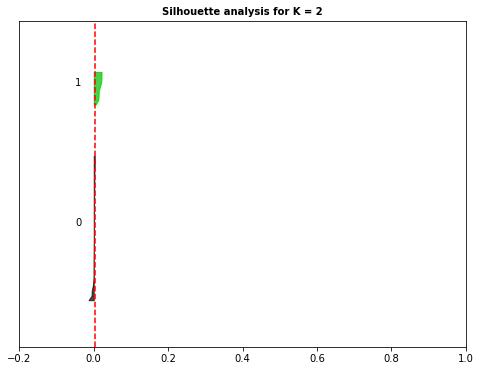

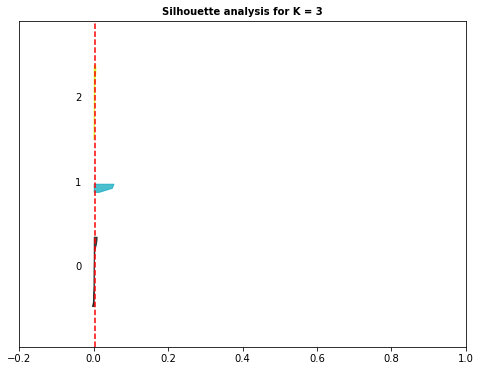

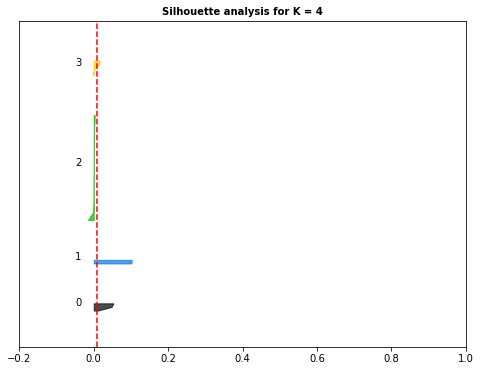

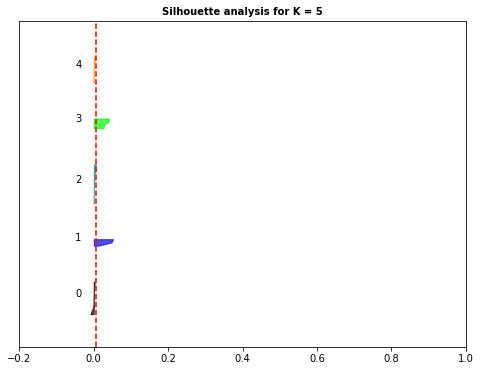

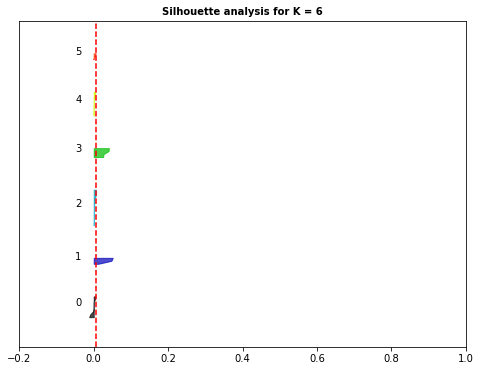

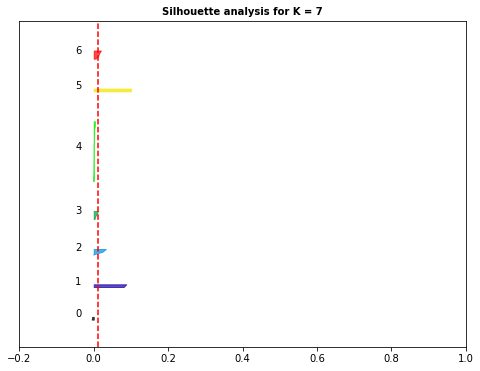

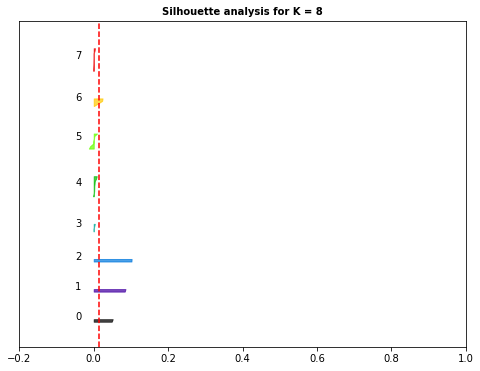

In [27]:
silhouette(kmeans_results, final_df, plot=True)

In [28]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

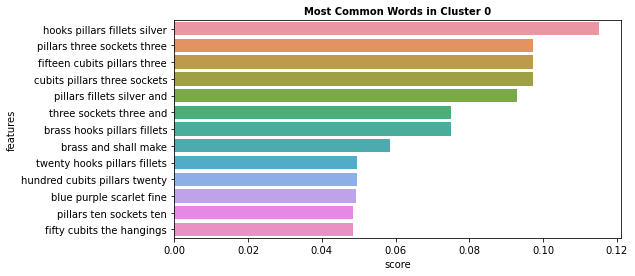

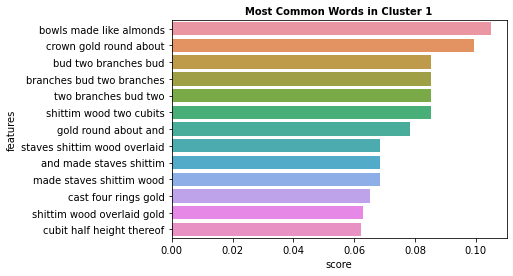

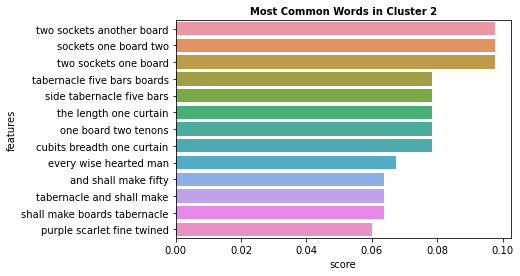

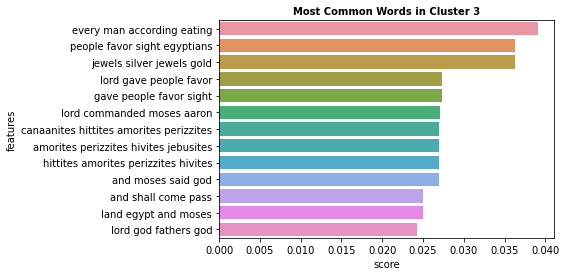

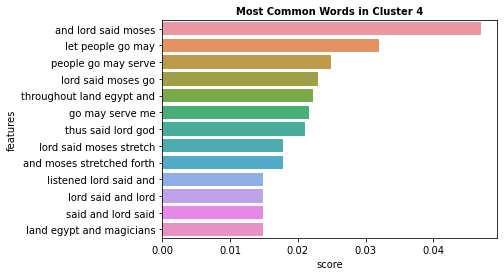

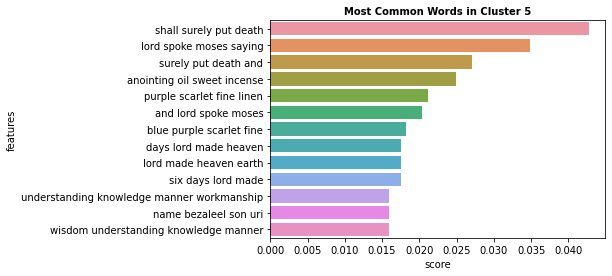

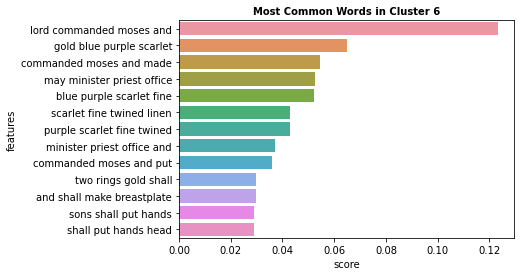

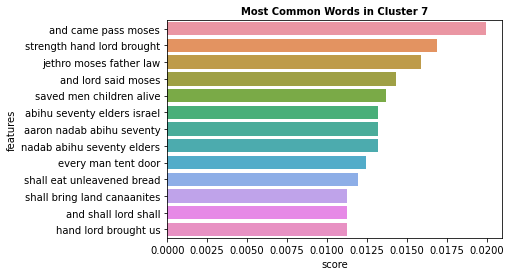

In [29]:
best_result = 8
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [30]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

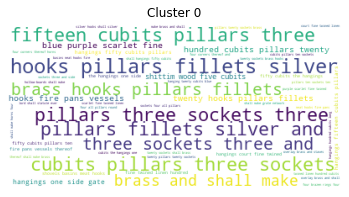

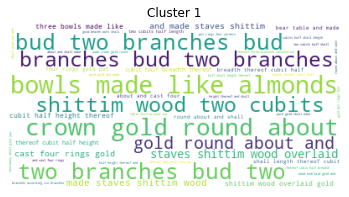

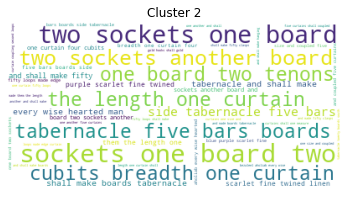

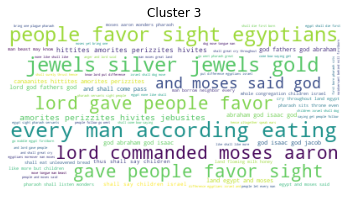

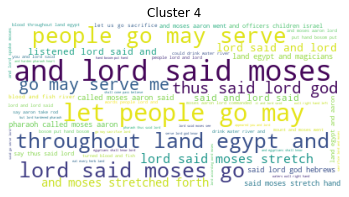

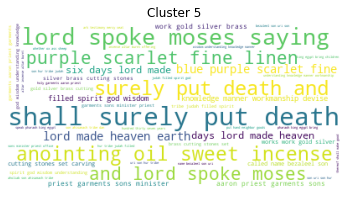

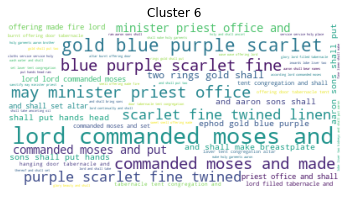

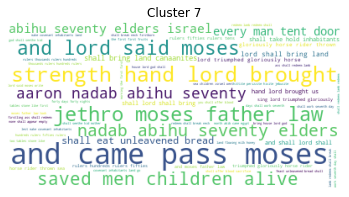

In [31]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [32]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Exodo_1,"'names', 'children', 'israel', ',', 'came', 'e...",7
101,Exodo_2,"'went', 'man', 'house', 'levi', ',', 'took', '...",7
102,Exodo_3,"'moses', 'kept', 'flock', 'jethro', 'father', ...",3
103,Exodo_4,"'moses', 'answered', 'said', ',', ',', 'behold...",4
104,Exodo_5,"'afterward', 'moses', 'aaron', 'went', ',', 't...",4


In [33]:
print(df)

        Autor                                              Livro  label
100   Exodo_1  'names', 'children', 'israel', ',', 'came', 'e...      7
101   Exodo_2  'went', 'man', 'house', 'levi', ',', 'took', '...      7
102   Exodo_3  'moses', 'kept', 'flock', 'jethro', 'father', ...      3
103   Exodo_4  'moses', 'answered', 'said', ',', ',', 'behold...      4
104   Exodo_5  'afterward', 'moses', 'aaron', 'went', ',', 't...      4
105   Exodo_6  'lord', 'said', 'moses', ',', 'shall', 'see', ...      5
106   Exodo_7  'lord', 'said', 'moses', ',', 'see', ',', 'mad...      4
107   Exodo_8  'lord', 'spoke', 'moses', ',', 'go', 'pharaoh'...      4
108   Exodo_9  'lord', 'said', 'moses', ',', 'go', 'pharaoh',...      4
109  Exodo_10  'lord', 'said', 'moses', ',', 'go', 'pharaoh',...      4
110  Exodo_11  'lord', 'said', 'moses', ',', 'yet', 'bring', ...      3
111  Exodo_12  'lord', 'spoke', 'moses', 'aaron', 'land', 'eg...      3
112  Exodo_13  'lord', 'spoke', 'moses', ',', 'saying', ',', ...

# Análise dos resultados


Classe 0 agrupa os capitulos que tratam de Deus dá poder a Moisés e a consumação das pragas no Egito, Deus entregando a lei e a rebeldia do povo. 

Classe 1 agrupa os capitulos que tratam dos sacerdotes e o tabernaculo.

Classe 2 agrupa os capitulos que tratam do altar do holocausto. 

Classe 3 agrupa os capitulos que tratam o cantico de vitoria de Moisés e os utensilos do templo e a entrega dos 10 mandamentos.

Classe 4 agrupa os capitulos que tratam do chamado de Moisés da consagração dos primogenitos e celebração da pascoa e a nova tabua dos 10 mandamentos. 

Classe 5 agrupa os capitulos que tratam da cortina e dos construtores do tarbernaculo.

Classe 6 agrupa os capitulos que tratam da oferta feita para o templo e a construção dos utensilos do mesmo. 

Classe 7 agrupa os capitulos que tratam das leis do homicidios, dos servos e das propriedades.

Classe 0 (Exôdo 4, 5, 7, 8, 9, 10, 11, 14, 17, 19, 24, 32, 33)

Classe 1 (Exôdo 28, 35, 39, 40)

Classe 2 (Exôdo 27, 38) 

Classe 3 (Exôdo 15, 20, 29, 30, 31)

Classe 4 (Exôdo 1, 2, 3, 6, 12, 13, 16, 18, 23, 34)

Classe 5 (Exôdo 26, 36)

Classe 6 (Exôdo 25, 37)

Classe 7 (Exôdo 21, 22) 

Agrupamento feito com 8 grupos e trigrams. 

########################################################################################################################

Classe 0 agrupa os capitulos que tratam do altar do holocausto.

Classe 1 agrupa os capitulos que tratam das ofertas feitas para o templo como a construção dos utensilos do mesmo.

Classe 2 agrupa os capitulos que tratam das cortinas do tabernaculo e as cobertas do mesmo.

Classe 3 agrupa os capitulos que tratam da morte dos primogenitos a pascoa e o envio do maná. 

Classe 4 agrupa os capitulos que tratam Deus dá poder a Moisés e consuma as pragas, Deus fala com Moisés e o bezerro de ouro.

Classe 5 agrupa os capitulos que tratam da resistencia do povo para aceitar Moisés e a entrega da Lei e os utensilos do templo e a questão do sábado

Classe 6 agrupa os capitulos que tratam os sacerdotes e a consagração do tabernaculo. 

Classe 7 agrupa os capitulos que tratam o nascimento de Moises e os descendentes de Israel sendo perseguidos, Deus não iria mais com o povo e as novas tabuas dos mandamentos. 

Classe 0 (Exôdo 27, 38)

Classe 1 (Exôdo 25, 37)

Classe 2 (Exôdo 26, 36)

Classe 3 (Exôdo 3, 11, 12, 16)

Classe 4 (Exôdo 4, 5, 7, 8, 9, 10, 14, 19, 32)

Classe 5 (Exôdo 6, 20, 30, 31, 35)

Classe 6 (Exôdo 28, 29, 39, 40) 

Classe 7 (Exôdo 1, 2, 13, 15, 17, 18, 23, 24, 33, 34)

Agrupamento feito com 8 grupos e quadrigrams